In [1]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [2]:
# https://github.com/JustGlowing/minisom

In [3]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# https://tslearn.readthedocs.io/en/stable/index.html

In [5]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Native libraries
import os
import math

# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler


# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import matplotlib.ticker as ticker
from datetime import timedelta


import seaborn as sns
sns.set_style("darkgrid")

In [7]:
noise_test = pd.read_csv('1_cleaned_data.csv')

In [8]:
# There are a series of complaints not belonging to Westminster
# Select only the records in Westminster and in the sub group of 'Noise Complaint'
lsoanot = ['Brent 032E', 'Brent 034B', 'Camden 017C', 'Camden 017D',
       'Camden 018D', 'Camden 020A', 'Camden 020B', 'Camden 020D',
       'Camden 026A', 'Camden 026B', 'Camden 026D', 'Camden 028A',
       'Camden 028B', 'Camden 028C', 'Camden 028D',
       'Hammersmith and Fulham 020E', 'Hammersmith and Fulham 024A',
       'Kensington and Chelsea 001A', 'Kensington and Chelsea 001C',
       'Kensington and Chelsea 001E', 'Kensington and Chelsea 004A',
       'Kensington and Chelsea 004B', 'Kensington and Chelsea 004D',
       'Kensington and Chelsea 006D', 'Kensington and Chelsea 006E',
       'Kensington and Chelsea 010E', 'Kensington and Chelsea 012A',
       'Kensington and Chelsea 012B', 'Kensington and Chelsea 012C',
       'Kensington and Chelsea 012E', 'Kensington and Chelsea 018C',
       'Kensington and Chelsea 018D', 'Southwark 024A']

noise_test= noise_test.loc[(noise_test.Service_Request_Group_Type == 'Noise Complaint')&(noise_test.LSOA_2011_Name  != '0')& (~noise_test.LSOA_2011_Name.isin(lsoanot) )]
noise_test


Noise_Complaint_Index  Time Received_Date Financial_Year  \
0                       NC1     0      4/1/2018        2018/19   
1                       NC2     0      4/1/2018        2018/19   
2                       NC3     0      4/1/2018        2018/19   
3                       NC4     0      4/1/2018        2018/19   
4                       NC5     2      4/1/2018        2018/19   
...                     ...   ...           ...            ...   
90793               NC90794    22     5/24/2022        2022/23   
90794               NC90795    23     5/24/2022        2022/23   
90795               NC90796    23     5/24/2022        2022/23   
90796               NC90797    23     5/24/2022        2022/23   
90797               NC90798    23     5/24/2022        2022/23   

          Service_Request Service_Request_Group_Type  \
0      Burglar/fire alarm            Noise Complaint   
1       Residential noise            Noise Complaint   
2       Residential noise            Noise Complaint   
3       Residential noise            Noise Complaint   
4       Residential noise            Noise Complaint   
...                   ...                        ...   
90793   Residential noise            Noise Complaint   
90794   Residential noise            Noise Complaint   
90795   Residential noise            Noise Complaint   
90796   Residential noise            Noise Complaint   
90797   Residential noise            Noise Complaint   

      Service_Request_Group_Sub_Type   Service_Request_1 Address_Key_  \
0                     Property Alarm  Burglar/fire alarm          AD1   
1               Residential Premises   Residential noise          AD2   
2               Residential Premises   Residential noise          AD3   
3               Residential Premises   Residential noise          AD4   
4               Residential Premises   Residential noise          AD5   
...                              ...                 ...          ...   
90793           Residential Premises   Residential noise      AD27872   
90794           Residential Premises   Residential noise      AD27873   
90795           Residential Premises   Residential noise       AD6625   
90796           Residential Premises   Residential noise      AD26114   
90797           Residential Premises   Residential noise      AD14038   

      Type_of_Address  ... Month Weekday Season             Hour_Min Hour  \
0             ADDRESS  ...     4       6      2  1900-01-01 00:11:00    0   
1             ADDRESS  ...     4       6      2  1900-01-01 00:37:00    0   
2             ADDRESS  ...     4       6      2  1900-01-01 00:38:00    0   
3             ADDRESS  ...     4       6      2  1900-01-01 00:46:00    0   
4             ADDRESS  ...     4       6      2  1900-01-01 02:27:00    0   
...               ...  ...   ...     ...    ...                  ...  ...   
90793         ADDRESS  ...     5       1      2  1900-01-01 22:59:00    0   
90794         ADDRESS  ...     5       1      2  1900-01-01 23:11:00    0   
90795         ADDRESS  ...     5       1      2  1900-01-01 23:15:00    0   
90796         ADDRESS  ...     5       1      2  1900-01-01 23:24:00    0   
90797         ADDRESS  ...     5       1      2  1900-01-01 23:46:00    0   

       days Mins_oneday  Days_oneyear            date_time Hours_oneweek  
0         0          11            90  2018-04-01 00:11:00     -1.000000  
1         0          37            90  2018-04-01 00:37:00     -1.000000  
2         0          38            90  2018-04-01 00:38:00     -1.000000  
3         0          46            90  2018-04-01 00:46:00     -1.000000  
4         0         147            90  2018-04-01 02:27:00     -1.000000  
...     ...         ...           ...                  ...           ...  
90793  1514        1379           143  2022-05-24 22:59:00     46.983333  
90794  1514        1391           143  2022-05-24 23:11:00     47.183333  
90795  1514        1395           143  2022-05-24 23:15:00     

In [9]:
noise_test = noise_test.loc[0:88298]
noise_test

Noise_Complaint_Index  Time Received_Date Financial_Year  \
0                       NC1     0      4/1/2018        2018/19   
1                       NC2     0      4/1/2018        2018/19   
2                       NC3     0      4/1/2018        2018/19   
3                       NC4     0      4/1/2018        2018/19   
4                       NC5     2      4/1/2018        2018/19   
...                     ...   ...           ...            ...   
88294               NC88295    18     3/31/2022        2021/22   
88295               NC88296    21     3/31/2022        2021/22   
88296               NC88297    21     3/31/2022        2021/22   
88297               NC88298    22     3/31/2022        2021/22   
88298               NC88299    22     3/31/2022        2021/22   

                      Service_Request Service_Request_Group_Type  \
0                  Burglar/fire alarm            Noise Complaint   
1                   Residential noise            Noise Complaint   
2                   Residential noise            Noise Complaint   
3                   Residential noise            Noise Complaint   
4                   Residential noise            Noise Complaint   
...                               ...                        ...   
88294             Noise in the street            Noise Complaint   
88295             Noise in the street            Noise Complaint   
88296               Residential noise            Noise Complaint   
88297  Noise from commercial premises            Noise Complaint   
88298             Noise in the street            Noise Complaint   

      Service_Request_Group_Sub_Type               Service_Request_1  \
0                     Property Alarm              Burglar/fire alarm   
1               Residential Premises               Residential noise   
2               Residential Premises               Residential noise   
3               Residential Premises               Residential noise   
4               Residential Premises               Residential noise   
...                              ...                             ...   
88294                         Street             Noise in the street   
88295                         Street             Noise in the street   
88296           Residential Premises               Residential noise   
88297            Commercial Premises  Noise from commercial premises   
88298                         Street             Noise in the street   

      Address_Key_ Type_of_Address  ... Month Weekday Season  \
0              AD1         ADDRESS  ...     4       6      2   
1              AD2         ADDRESS  ...     4       6      2   
2              AD3         ADDRESS  ...     4       6      2   
3              AD4         ADDRESS  ...     4       6      2   
4              AD5         ADDRESS  ...     4       6      2   
...            ...             ...  ...   ...     ...    ...   
88294       AD6203         ADDRESS  ...     3       3      2   
88295       AD6203         ADDRESS  ...     3       3      2   
88296      AD21714         ADDRESS  ...     3       3      2   
88297      AD27094         ADDRESS  ...     3       3      2   
88298      AD15649         ADDRESS  ...     3       3      2   

                  Hour_Min Hour  days Mins_oneday  Days_oneyear  \
0      1900-01-01 00:11:00    0     0          11            90   
1      1900-01-01 00:37:00    0     0          37            90   
2      1900-01-01 00:38:00    0     0          38            90   
3      1900-01-01 00:46:00    0     0          46            90   
4      1900-01-01 02:27:00    0     0         147            90   
...                    ...  ...   ...         ...           ...   
88294  1900-01-01 18:56:00    0  1460        1136            89   
88295  1900-01-01 21:04:00    0  1460        1264            89   
88296  1900-01-01 21:15:00    0  1460        1275            89   
88297  1900-01-01 22:03:00    0  1460        1323            89   
88298  1900-01-01 22:57:0

#### All Complaint Count Summary_By Different Time Windows

In [10]:
# Summarize by date
noise_test_summary_date = noise_test.groupby('Date').count()[['Noise_Complaint_Index']].reset_index()
noise_test_summary_date

Date  Noise_Complaint_Index
0     2018-04-01                     32
1     2018-04-02                     33
2     2018-04-03                     28
3     2018-04-04                     40
4     2018-04-05                     38
...          ...                    ...
1456  2022-03-27                     49
1457  2022-03-28                     25
1458  2022-03-29                     38
1459  2022-03-30                     39
1460  2022-03-31                     22

[1461 rows x 2 columns]

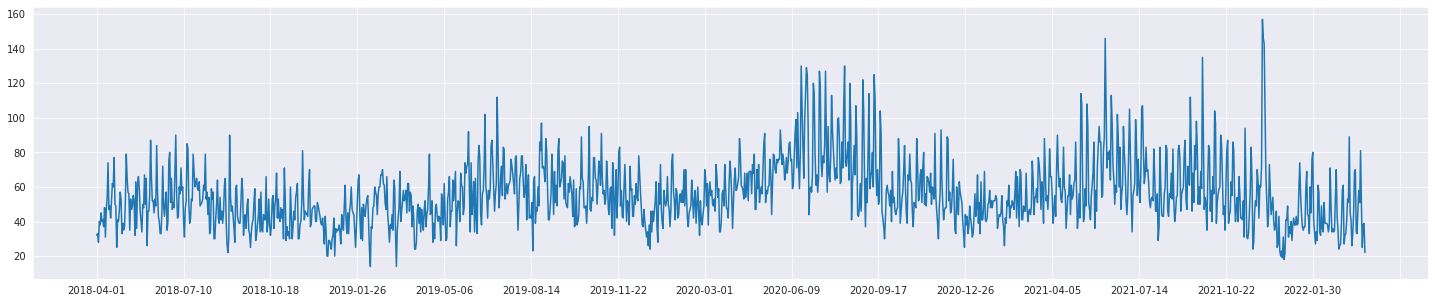

In [11]:
fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(noise_test_summary_date.Date, noise_test_summary_date.Noise_Complaint_Index);
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

In [12]:
noise_test_summary_date = noise_test_summary_date.set_index('Date') 

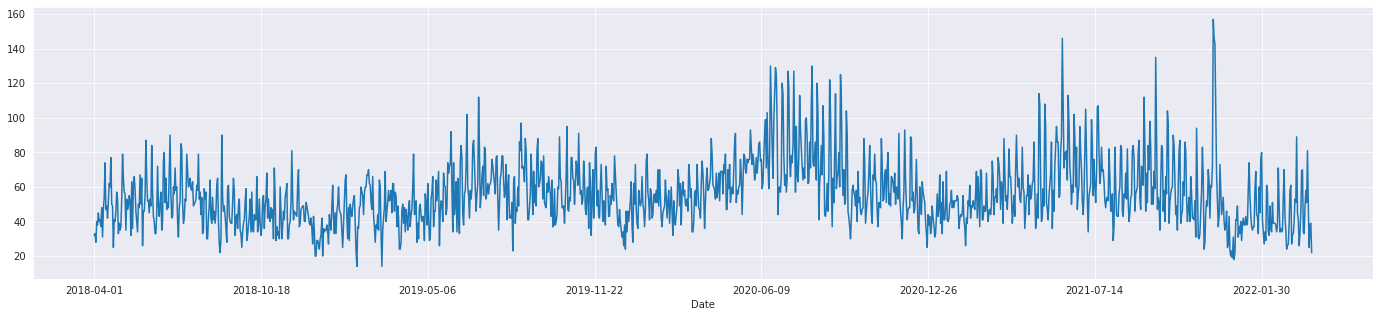

In [13]:
noise_test.groupby(['Date']).count()['Noise_Complaint_Index'].plot(figsize=(24,5), kind='line');

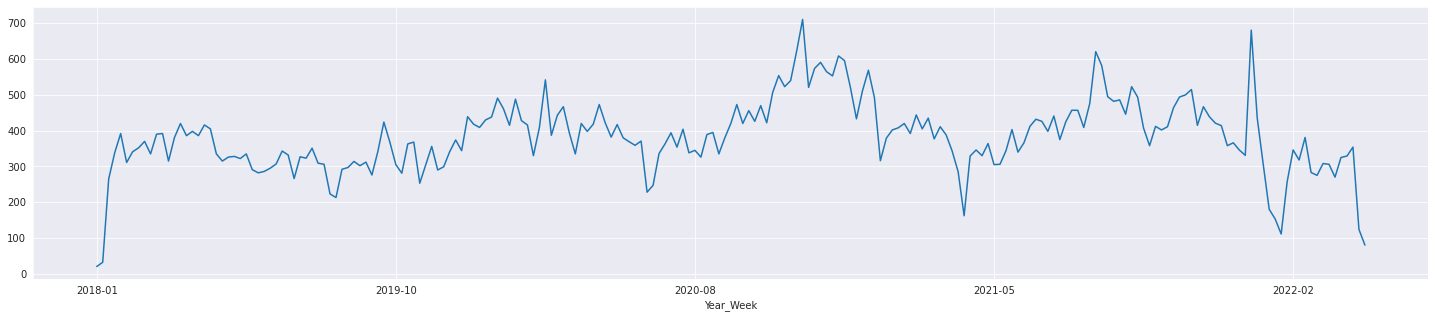

In [14]:
noise_test.groupby(['Year_Week']).count()['Noise_Complaint_Index'].plot(figsize=(25,5), kind='line');

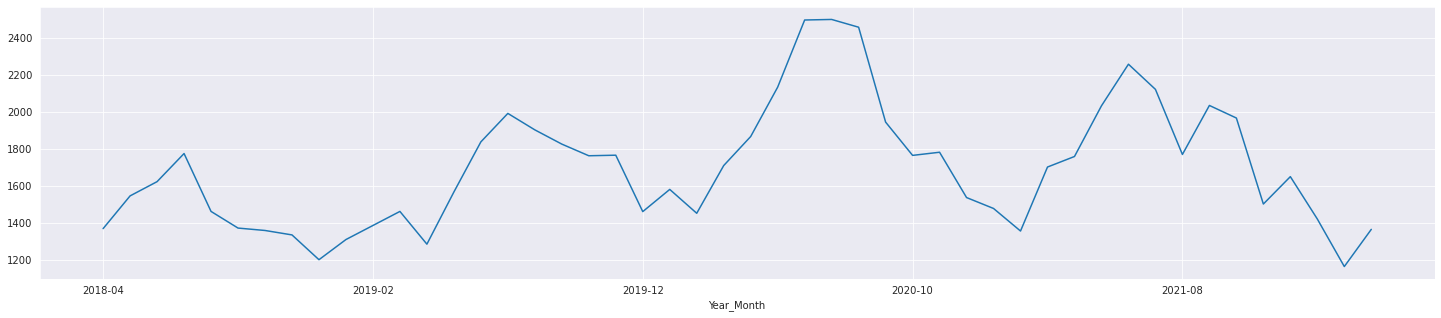

In [15]:
## Year-Month
# noise_test.groupby(['Year_Month']).count()['Noise_Complaint_Index'].plot(figsize=(12,6), kind='line');
## Year-Month
noise_test.groupby(['Year_Month']).count()['Noise_Complaint_Index'].plot(figsize=(25,5), kind='line');

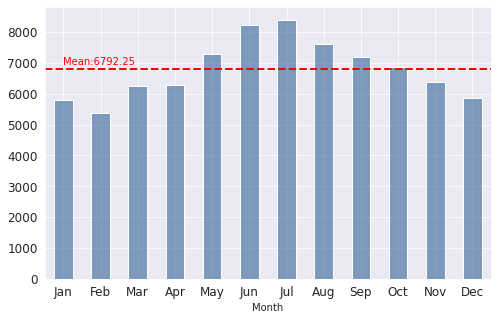

In [37]:
graph = noise_test.groupby(['Month']).count()['Noise_Complaint_Index'].plot(figsize=(8,5), kind='bar',color=(0.2, 0.4, 0.6, 0.6));
plt.xticks(size =12,rotation=0, ha='center')
plt.yticks(size =12,rotation=0, ha='right')
mean_value = np.mean(noise_test.groupby(['Month']).count()['Noise_Complaint_Index'])
label = "{:.2f}".format(mean_value)

plt.annotate('Mean:'+ str(label), # this is the text
                 (1.5, mean_value), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 color = 'r',
                 ha='center') # horizontal alignment can be left, right or center   
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Jan','Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],)
graph.axhline(mean_value,color='r', ls="--", lw=2,)

In [38]:
np.mean(noise_test.groupby(['Month']).count()['Noise_Complaint_Index'])

6792.25

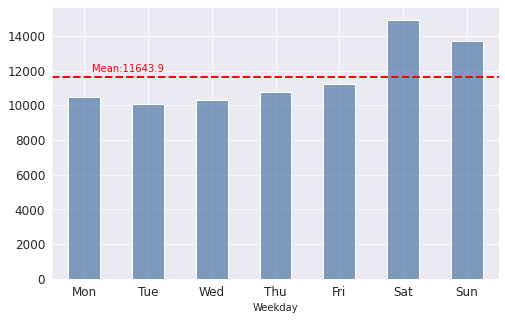

In [39]:
graph = noise_test.groupby(['Weekday']).count()['Noise_Complaint_Index'].plot(figsize=(8,5), kind='bar',color=(0.2, 0.4, 0.6, 0.6));
plt.xticks(size =12,rotation=0, ha='center')
plt.yticks(size =12,rotation=0, ha='right')
mean_value = np.mean(noise_test.groupby(['Weekday']).count()['Noise_Complaint_Index'])
label = "{:.1f}".format(mean_value)

plt.annotate('Mean:'+ str(label), # this is the text
                 (1, mean_value), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 color = 'r',
                 ha='center') # horizontal alignment can be left, right or center   

plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue', 'Wed', 'Thu','Fri','Sat','Sun'],)

graph.axhline(mean_value,color='r', ls="--", lw=2,)

NameError: name 'summary_type_mins' is not defined

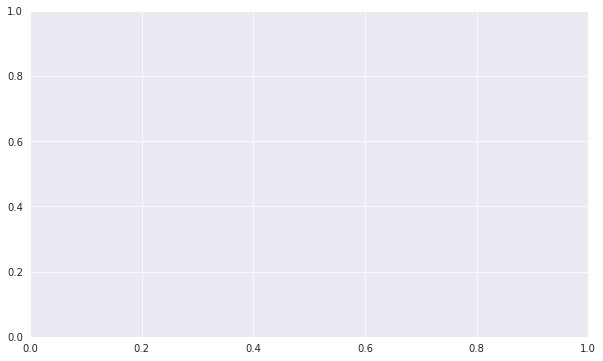

In [40]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
f, axs = plt.subplots(1, figsize=(10, 6))
axs = sns.scatterplot(data=summary_type_mins , x="Mins_oneday", y="Service_Request_Group_Sub_Type", size="count", color = 'tab:blue',alpha=0.02, sizes=(20, 4000), legend = False)
plt.legend(handles = [Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='tab:blue', markersize=15, alpha = 0.5)],labels=["Noise Complaint"], loc = 2, bbox_to_anchor = (0.75,0.9))

plt.xticks([0, 120, 240,360,480,600,720,840,960,1080,1200,1320,1440], ['0','2', '4', '6','8','10','12','14','16', '18','20','22','24'],)
plt.yticks(rotation = 60)
# show the graph
plt.show()


In [ ]:
np.mean(noise_test.groupby(['Weekday']).count()['Noise_Complaint_Index'])

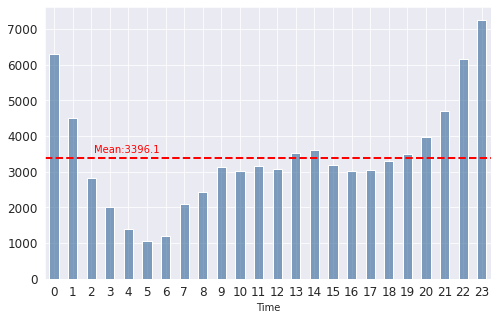

In [41]:
graph = noise_test.groupby(['Time']).count()['Noise_Complaint_Index'].plot(figsize=(8,5), kind='bar',color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(size =12,rotation=0, ha='center')
plt.yticks(size =12,rotation=0, ha='right')

mean_value = np.mean(noise_test.groupby(['Time']).count()['Noise_Complaint_Index'])
label = "{:.1f}".format(mean_value)
plt.annotate('Mean:'+ str(label), # this is the text
                 (5, mean_value), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
             color = 'r',
                 ha='center') # horizontal alignment can be left, right or center   

graph.axhline(mean_value,color='r', ls="--", lw=2,)

In [42]:
np.mean(noise_test.groupby(['Time']).count()['Noise_Complaint_Index'])

3396.125

#### Checking the Stationarity of a time series(date) : Augmented Dicky-Fuller Test

It is a type of test called a unit root test. It tries to determine how strongly a time series is defined by a trend using a auto-regressive model and optimizes an information criterion across multiple different lag values.

Null Hypothesis (H0): is that the time series can be represented by a unit root (i.e. it is not stationary)


Alternate Hypotheis (H1): is that the time series does not have a unit root (i.e. it is stationary). Null Hypothesis is rejected.


The results are interpreted using the p-value. A p-value below a threshold (here 0.05) means we reject the H0 and a p-value above it means we accept the H0.


For this study, the p-value obtained is 0.003204, less than the significance level (say 0.05).  Thereby, inferring that the series is stationary.

https://www.kaggle.com/code/ashmib/time-series-forecast-australian-beer-production

In [43]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(30).std()
    fig, ax = plt.subplots(figsize=(24, 10))
    
    #Plot rolling statistics:
    orig = ax.plot(timeseries,label='Original', )
    mean = ax.plot(rolmean, color='red', label='Rolling Mean')
    std = ax.plot(rolstd, color='black', label = 'Rolling Std')
    ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

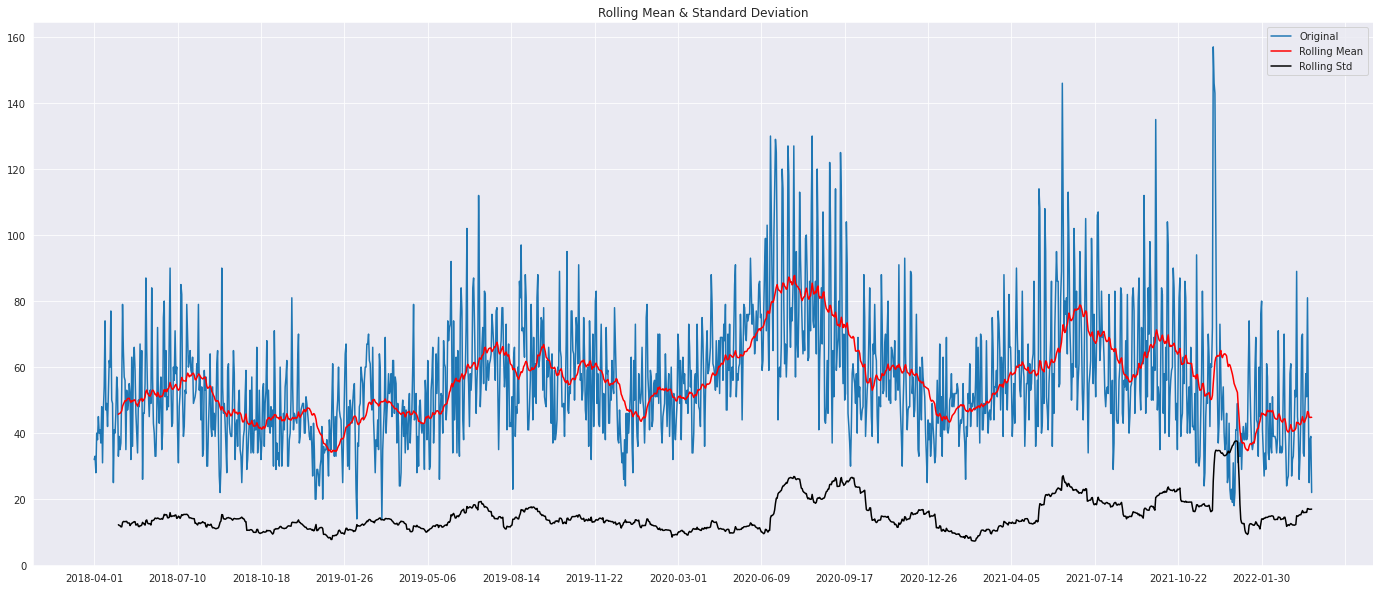

Results of Dickey-Fuller Test:
Test Statistic                   -3.368024
p-value                           0.012098
#Lags Used                       24.000000
Number of Observations Used    1436.000000
Critical Value (1%)              -3.434912
Critical Value (5%)              -2.863555
Critical Value (10%)             -2.567843
dtype: float64


In [44]:
test_stationarity(noise_test_summary_date)

In [45]:
# Summarize by date and request type
noise_test_true_summary_date_service_type = noise_test.groupby(['Date','Service_Request']).count()[['Noise_Complaint_Index']].reset_index()
noise_test_true_summary_date_service_type  = noise_test_true_summary_date_service_type.set_index(noise_test_true_summary_date_service_type['Date'])
noise_test_true_summary_date_service_type

Date                 Service_Request  Noise_Complaint_Index
Date                                                                         
2018-04-01  2018-04-01                   Building site                      4
2018-04-01  2018-04-01              Burglar/fire alarm                      3
2018-04-01  2018-04-01                Busker complaint                      3
2018-04-01  2018-04-01  Noise from commercial premises                      2
2018-04-01  2018-04-01               Residential noise                     20
...                ...                             ...                    ...
2022-03-31  2022-03-31                   Building site                      1
2022-03-31  2022-03-31                   Grit and dust                      1
2022-03-31  2022-03-31  Noise from commercial premises                      5
2022-03-31  2022-03-31             Noise in the street                      5
2022-03-31  2022-03-31               Residential noise                      9

[9863 rows x 3 columns]

In [46]:
# Summarize by request type
noise_test_true_summary_service_type = noise_test.groupby(['Service_Request']).count()[['Noise_Complaint_Index']].reset_index()
noise_test_true_summary_service_type

Service_Request  Noise_Complaint_Index
0               Artificial light pollution                    151
1   Basement construction - noise and dust                    700
2                            Building site                   6325
3                       Burglar/fire alarm                   3876
4                         Busker complaint                   5086
5                                Car alarm                    725
6                          Email complaint                     53
7                            Grit and dust                    260
8        Helicopter and aircraft movements                     16
9           Noise from commercial premises                  11621
10                     Noise in the street                  11197
11                       Residential noise                  40670
12                            Street works                    720
13              Underground (tube/station)                    107

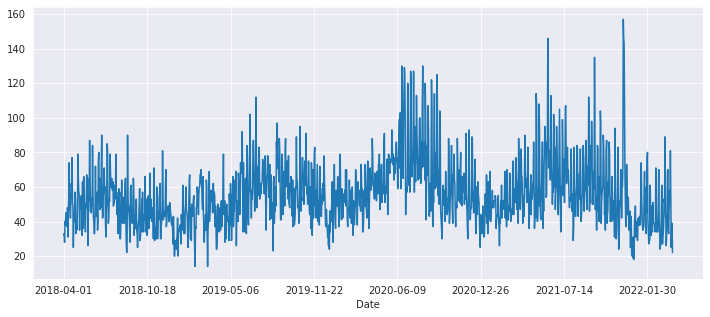

In [47]:
noise_test.groupby(['Date']).count()['Noise_Complaint_Index'].plot(figsize=(12,5), kind='line');

In [48]:
service_series = []
service_type_name = noise_test_true_summary_date_service_type.Service_Request.unique()
for i in service_type_name:
    df = noise_test.loc[noise_test.Service_Request == i]
    service_series.append(df)

In [49]:
service_type_name

array(['Building site', 'Burglar/fire alarm', 'Busker complaint',
       'Noise from commercial premises', 'Residential noise', 'Car alarm',
       'Noise in the street', 'Street works',
       'Basement construction - noise and dust',
       'Artificial light pollution', 'Email complaint', 'Grit and dust',
       'Helicopter and aircraft movements', 'Underground (tube/station)'],
      dtype=object)

In [50]:
#service_type_name = ['Residential noise','Noise from commercial premises',]

In [51]:
print(len(service_series))

14


In [52]:
noise_test.groupby(['Year_Week']).count()

Noise_Complaint_Index  Time  Received_Date  Financial_Year  \
Year_Week                                                               
2018-01                       20    20             20              20   
2018-13                       32    32             32              32   
2018-14                      265   265            265             265   
2018-15                      338   338            338             338   
2018-16                      392   392            392             392   
...                          ...   ...            ...             ...   
2022-10                      325   325            325             325   
2022-11                      329   329            329             329   
2022-12                      354   354            354             354   
2022-13                      124   124            124             124   
2022-52                       80    80             80              80   

           Service_Request  Service_Request_Group_Type  \
Year_Week                                                
2018-01                 20                          20   
2018-13                 32                          32   
2018-14                265                         265   
2018-15                338                         338   
2018-16                392                         392   
...                    ...                         ...   
2022-10                325                         325   
2022-11                329                         329   
2022-12                354                         354   
2022-13                124                         124   
2022-52                 80                          80   

           Service_Request_Group_Sub_Type  Service_Request_1  Address_Key_  \
Year_Week                                                                    
2018-01                                20                 20            20   
2018-13                                32                 32            32   
2018-14                               265                265           265   
2018-15                               338                338           338   
2018-16                               392                392           392   
...                                   ...                ...           ...   
2022-10                               325                325           325   
2022-11                               329                329           329   
2022-12                               354                354           354   
2022-13                               124                124           124   
2022-52                                80                 80            80   

           Type_of_Address  ...  Month  Weekday  Season  Hour_Min  Hour  days  \
Year_Week                   ...                                                 
2018-01                 20  ...     20       20      20        20    20    20   
2018-13                 32  ...     32       32      32        32    32    32   
2018-14                265  ...    265      265     265       265   265   265   
2018-15                338  ...    338      338     338       338   338   338   
2018-16                392  ...    392      392     392       392   392   392   
...                    ...  ...    ...      ...     ...       ...   ...   ...   
2022-10                325  ...    325      325     325       325   325   325   
2022-11                329  ...    329      329     329       329   329   329   
2022-12                354  ...    354      354     354       354   354   354   
2022-13                124  ...    124      124     124       124   124   124   
2022-52                 80  ...     80       80      80        80    80    80   

           Mins_oneday  Days_oneyear  date_time  Hours_oneweek  
Year_Week                                                       
2018-01             20            20         20             20  
2018-13             32            32      

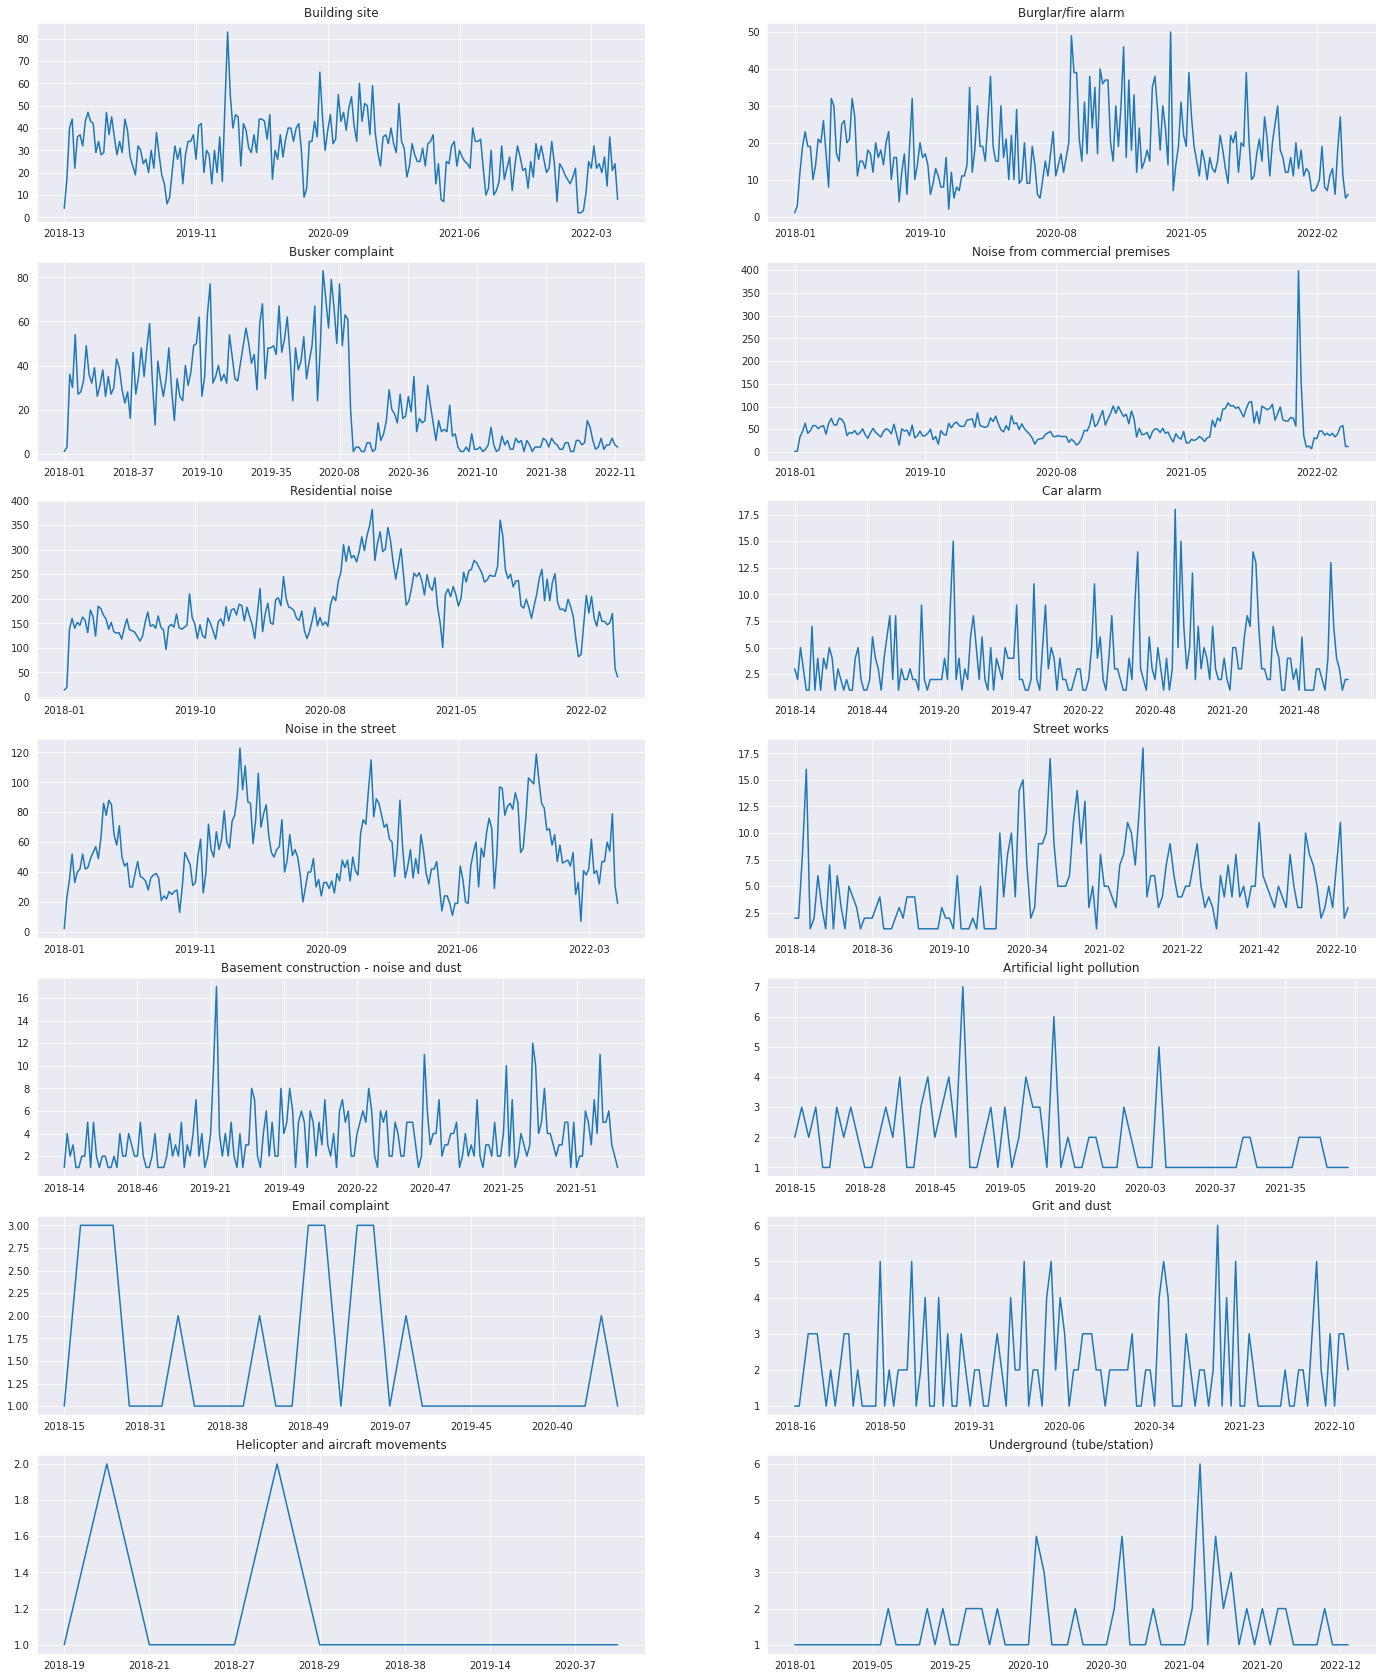

In [53]:
import datetime as dt
fig, axs = plt.subplots(7,2,figsize=(24,30))
#fig.suptitle('Series')
a = 0

for i in range(7):
    for j in range(2):
        if i*2+j+1>len(service_type_name): 
            # pass the others that we can't fill 
            # actually only 1 can't fill.. it is the last one 4*5+3+1 = 24 >23
            # 0+0+1 0+1+1 0+2+1 0+3+1
            continue
        #axs[i, j].set_xlim(['2018-01','2022-52'])
        #axs[i, j].plot(service_series[i*2+j].Date, service_series[i*2+j].Noise_Complaint_Index)
        #service_series[i*2+j]['Date'] = pd.to_datetime(service_series[i*2+j]['Date'], format = '%Y-%m-%d %H:%M')
        
        service_series[i*2+j].groupby(['Year_Week']).count()['Noise_Complaint_Index'].plot(ax = axs[i, j] ,lw = 1.5, kind='line',xlabel='');
        #fig.autofmt_xdate()
        
       # ax.set_xlim([pd.to_datetime('2018-04-01',format = '%Y-%m-%d'),pd.to_datetime('2022-05-24',format = '%Y-%m-%d' )]),
        axs[i, j].set_title(service_type_name[i*2+j])
       
plt.show()

In [54]:
# Summarize by date and request type
noise_test_true_summary_date_service_type = noise_test.groupby(['Date','Service_Request_Group_Sub_Type']).count()[['Noise_Complaint_Index']].reset_index()
noise_test_true_summary_date_service_type  = noise_test_true_summary_date_service_type.set_index(noise_test_true_summary_date_service_type['Date'])
noise_test_true_summary_date_service_type

Date Service_Request_Group_Sub_Type  Noise_Complaint_Index
Date                                                                        
2018-04-01  2018-04-01                  Building Site                      4
2018-04-01  2018-04-01            Commercial Premises                      2
2018-04-01  2018-04-01                 Property Alarm                      3
2018-04-01  2018-04-01           Residential Premises                     20
2018-04-01  2018-04-01                         Street                      3
...                ...                            ...                    ...
2022-03-31  2022-03-31                  Building Site                      2
2022-03-31  2022-03-31            Commercial Premises                      5
2022-03-31  2022-03-31      Non Noise Complaint (45m)                      1
2022-03-31  2022-03-31           Residential Premises                      9
2022-03-31  2022-03-31                         Street                      5

[7164 rows x 3 columns]

In [55]:
# Summarize by request type
noise_test_true_summary_service_type = noise_test.groupby(['Service_Request_Group_Sub_Type']).count()[['Noise_Complaint_Index']].reset_index()
noise_test_true_summary_service_type

Service_Request_Group_Sub_Type  Noise_Complaint_Index
0                  Building Site                   7392
1            Commercial Premises                  11621
2           Email Complaint (1d)                     53
3      Non Noise Complaint (45m)                    167
4                 Property Alarm                   3876
5           Residential Premises                  40670
6                         Street                  17728

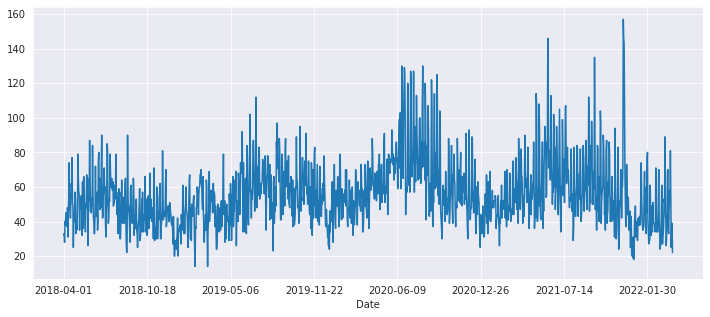

In [56]:
noise_test.groupby(['Date']).count()['Noise_Complaint_Index'].plot(figsize=(12,5), kind='line');

In [57]:
service_type_name = ['Residential Premises','Street','Commercial Premises','Building Site', 'Property Alarm',
        'Non Noise Complaint (45m)']

In [58]:
service_series = []
#service_type_name = noise_test_true_summary_date_service_type.Service_Request_Group_Sub_Type.unique()
for i in service_type_name:
    df = noise_test.loc[noise_test.Service_Request_Group_Sub_Type == i]
    service_series.append(df)

In [59]:
service_type_name

['Residential Premises',
 'Street',
 'Commercial Premises',
 'Building Site',
 'Property Alarm',
 'Non Noise Complaint (45m)']

In [60]:
print(len(service_series))

6


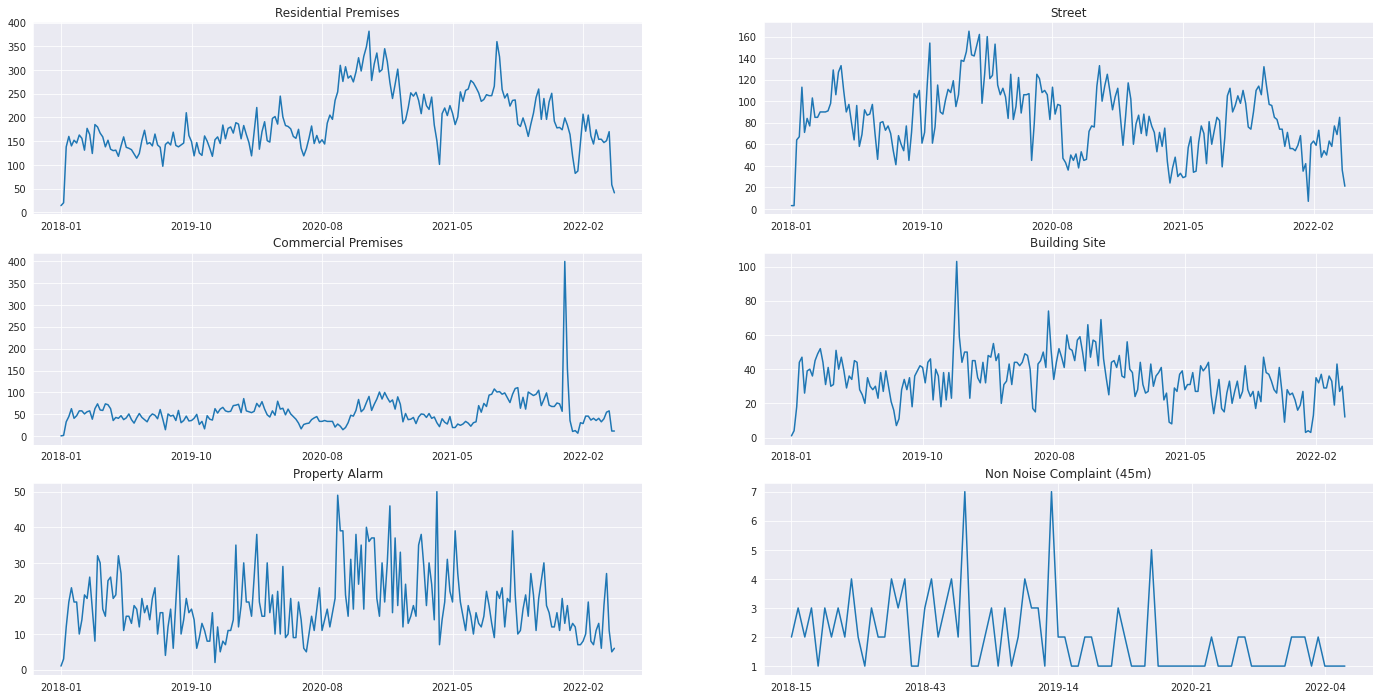

In [61]:
import datetime as dt
fig, axs = plt.subplots(3,2,figsize=(24,12))
#fig.suptitle('Series')
a = 0

for i in range(3):
    for j in range(2):
        if i*2+j+1>len(service_type_name): 
            # pass the others that we can't fill 
            # actually only 1 can't fill.. it is the last one 4*5+3+1 = 24 >23
            # 0+0+1 0+1+1 0+2+1 0+3+1
            continue
        #axs[i, j].set_xlim(['2018-01','2022-52'])
        #axs[i, j].plot(service_series[i*2+j].Date, service_series[i*2+j].Noise_Complaint_Index)
        #service_series[i*2+j]['Date'] = pd.to_datetime(service_series[i*2+j]['Date'], format = '%Y-%m-%d %H:%M')
        
        service_series[i*2+j].groupby(['Year_Week']).count()['Noise_Complaint_Index'].plot(ax = axs[i, j] ,lw = 1.5, kind='line',xlabel='');
        #fig.autofmt_xdate()
        
       # ax.set_xlim([pd.to_datetime('2018-04-01',format = '%Y-%m-%d'),pd.to_datetime('2022-05-24',format = '%Y-%m-%d' )]),
        axs[i, j].set_title(service_type_name[i*2+j])
       
plt.show()

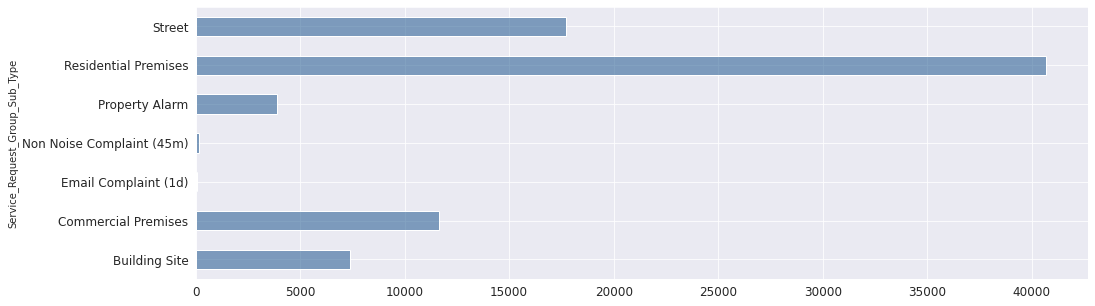

In [62]:
graph = noise_test.groupby(['Service_Request_Group_Sub_Type']).count()['Noise_Complaint_Index'].plot(figsize=(16,5), kind='barh',color=(0.2, 0.4, 0.6, 0.6))



plt.xticks(size =12,rotation=0, ha='center')
plt.yticks(size =12,rotation=0, ha='right')

mean_value = 3489.2
label = "{:.1f}".format(mean_value)
plt.annotate('Mean:'+ str(label), # this is the text
                 (5, mean_value), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,5), # distance from text to points (x,y)
                 color = 'r',
                 ha='center') # horizontal alignment can be left, right or center   

graph.axhline(mean_value,color='r', ls="--", lw=2,)

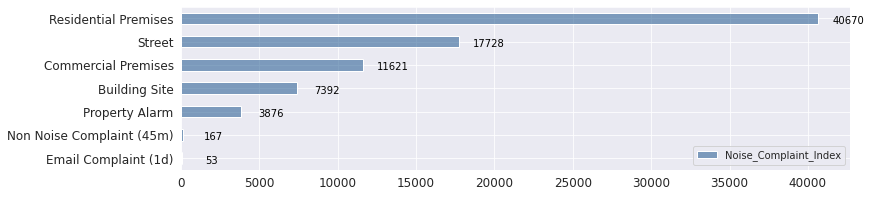

In [63]:
df = noise_test.groupby(['Service_Request_Group_Sub_Type']).count()[['Noise_Complaint_Index']]
ordered_df = df.sort_values(by='Noise_Complaint_Index').reset_index()

graph = ordered_df.plot(figsize=(12,3), kind='barh',color=(0.2, 0.4, 0.6, 0.6))


ordered_df = df.sort_values(by='Noise_Complaint_Index').reset_index()
my_range=range(0,len(df.index))
plt.yticks(my_range, ordered_df['Service_Request_Group_Sub_Type'])
plt.xticks(size =12,rotation=0, ha='center')
plt.yticks(size =12,rotation=0, ha='right')

mean_value = 3489.2


for i in range(len(ordered_df['Noise_Complaint_Index'])):
    #label = "{:.0f}".format(i)
    plt.annotate(str(ordered_df['Noise_Complaint_Index'][i]), # this is the text
                 (ordered_df['Noise_Complaint_Index'][i],my_range[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center   

graph.axhline(mean_value,color='r', ls="--", lw=2,)
plt.legend(loc ='lower right')

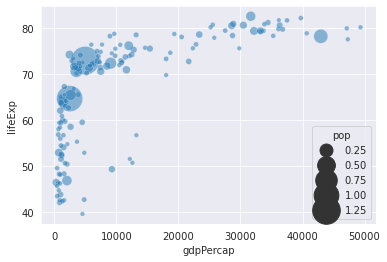

In [64]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
from gapminder import gapminder # import data set 

# data 
data = gapminder.loc[gapminder.year == 2007]
 
# use the scatterplot function
sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", alpha=0.5, sizes=(20, 800))

# show the graph
plt.show()

In [65]:
summary_type_mins = noise_test.groupby(['Mins_oneday','Service_Request_Group_Sub_Type']).count()[['Noise_Complaint_Index']]
summary_type_mins = summary_type_mins.rename(columns = {'Noise_Complaint_Index':'count'}).reset_index()
summary_type_mins = summary_type_mins.loc[~ summary_type_mins.Service_Request_Group_Sub_Type.isin(['Non Noise Complaint (45m)','Email Complaint (1d)'])]

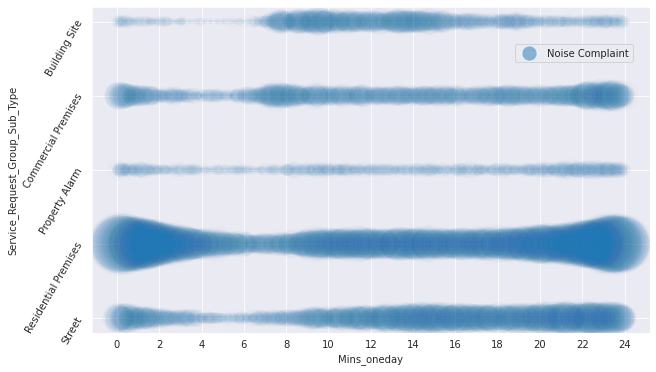

In [66]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
f, axs = plt.subplots(1, figsize=(10, 6))
axs = sns.scatterplot(data=summary_type_mins , x="Mins_oneday", y="Service_Request_Group_Sub_Type", size="count", color = 'tab:blue',alpha=0.02, sizes=(20, 4000), legend = False)
plt.legend(handles = [Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='tab:blue', markersize=15, alpha = 0.5)],labels=["Noise Complaint"], loc = 2, bbox_to_anchor = (0.75,0.9))

plt.xticks([0, 120, 240,360,480,600,720,840,960,1080,1200,1320,1440], ['0','2', '4', '6','8','10','12','14','16', '18','20','22','24'],)
plt.yticks(rotation = 60)
# show the graph
plt.show()


In [67]:
summary_type_week = noise_test.groupby(['Hours_oneweek','Service_Request_Group_Sub_Type']).count()[['Noise_Complaint_Index']]
summary_type_week = summary_type_week .rename(columns = {'Noise_Complaint_Index':'count'}).reset_index()
summary_type_week = summary_type_week .loc[~ summary_type_week .Service_Request_Group_Sub_Type.isin(['Non Noise Complaint (45m)','Email Complaint (1d)'])]

In [68]:
summary_type_week

Hours_oneweek Service_Request_Group_Sub_Type  count
0          -1.000000                  Building Site     22
1          -1.000000            Commercial Premises     48
3          -1.000000                 Property Alarm     22
4          -1.000000           Residential Premises    267
5          -1.000000                         Street    110
...              ...                            ...    ...
30791     167.966667           Residential Premises      8
30792     167.983333                  Building Site      1
30793     167.983333            Commercial Premises      3
30794     167.983333           Residential Premises      2
30795     167.983333                         Street      2

[30577 rows x 3 columns]

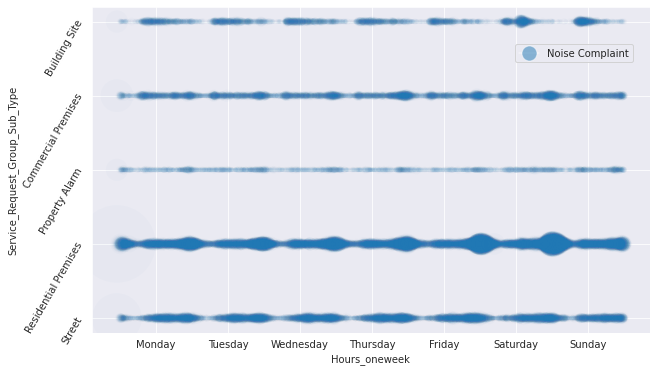

In [69]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
f, axs = plt.subplots(1, figsize=(10, 6))
axs = sns.scatterplot(data=summary_type_week , x="Hours_oneweek", y="Service_Request_Group_Sub_Type", size="count", color = 'tab:blue',alpha=0.02, sizes=(20, 6000), legend = False)
plt.legend(handles = [Line2D([0], [0], marker='o', color='w', label='Scatter',
                          markerfacecolor='tab:blue', markersize=15, alpha = 0.5)],labels=["Noise Complaint"], loc = 2, bbox_to_anchor = (0.75,0.9))

plt.xticks([12,36,60,84,108,132, 156], ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],)
#plt.xticks([0,24,48,72,96,120,144, 168], ['Monday(0 am)', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday','Monday'],)
plt.yticks(rotation = 60)
# show the graph
plt.show()


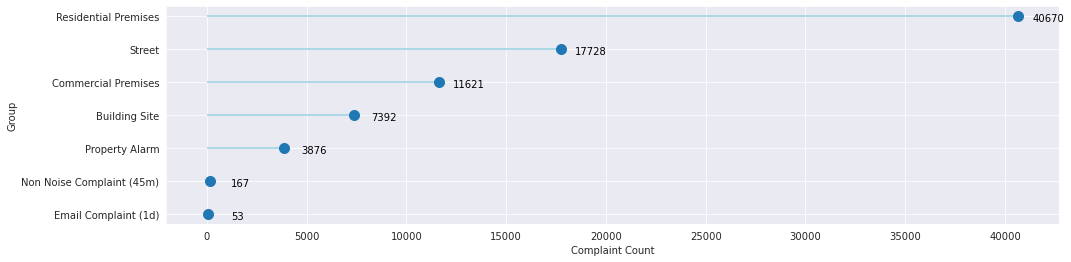

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
# Create a dataframe
figure(figsize=(16, 4)) 
df = noise_test.groupby(['Service_Request_Group_Sub_Type']).count()[['Noise_Complaint_Index']].reset_index()
 
# Reorder it based on the values
ordered_df = df.sort_values(by='Noise_Complaint_Index').reset_index()
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0,lw=2, xmax=ordered_df['Noise_Complaint_Index'], color='lightblue')
plt.plot(ordered_df['Noise_Complaint_Index'], my_range, "o",markersize=10 )

for i in range(len(ordered_df['Noise_Complaint_Index'])):
    #label = "{:.0f}".format(i)
    plt.annotate(str(ordered_df['Noise_Complaint_Index'][i]), # this is the text
                 (ordered_df['Noise_Complaint_Index'][i],my_range[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  

# Add titles and axis names
plt.yticks(my_range, ordered_df['Service_Request_Group_Sub_Type'])
#plt.title("Complaint Count", loc='left')
plt.xlabel('Complaint Count')
plt.ylabel('Group')

# Show the plot
plt.show()

In [71]:
ordered_df['Noise_Complaint_Index']

0       53
1      167
2     3876
3     7392
4    11621
5    17728
6    40670
Name: Noise_Complaint_Index, dtype: int64

In [72]:
noise_test.groupby(['Service_Request_Group_Sub_Type']).count()[['Noise_Complaint_Index']].reset_index()
 

Service_Request_Group_Sub_Type  Noise_Complaint_Index
0                  Building Site                   7392
1            Commercial Premises                  11621
2           Email Complaint (1d)                     53
3      Non Noise Complaint (45m)                    167
4                 Property Alarm                   3876
5           Residential Premises                  40670
6                         Street                  17728

In [73]:
noise_test.Service_Request_Group_Sub_Type.unique()

array(['Property Alarm', 'Residential Premises', 'Commercial Premises',
       'Building Site', 'Street', 'Non Noise Complaint (45m)',
       'Email Complaint (1d)'], dtype=object)

In [74]:
noise_test.columns

Index(['Noise_Complaint_Index', 'Time', 'Received_Date', 'Financial_Year',
       'Service_Request', 'Service_Request_Group_Type',
       'Service_Request_Group_Sub_Type', 'Service_Request_1', 'Address_Key_',
       'Type_of_Address', 'Output_Area_Code_(2011)', 'MSOA_2011_Code',
       'MSOA_2011_Name', 'LSOA_2011_Code', 'LSOA_2011_Name', 'Ward_Name',
       'Date', 'Days', 'Year_Month', 'Year_Week', 'Year', 'Month', 'Weekday',
       'Season', 'Hour_Min', 'Hour', 'days', 'Mins_oneday', 'Days_oneyear',
       'date_time', 'Hours_oneweek'],
      dtype='object')

In [75]:
noise_test.Service_Request.unique()

array(['Burglar/fire alarm', 'Residential noise',
       'Noise from commercial premises', 'Building site',
       'Busker complaint', 'Car alarm', 'Noise in the street',
       'Street works', 'Basement construction - noise and dust',
       'Artificial light pollution', 'Email complaint', 'Grit and dust',
       'Helicopter and aircraft movements', 'Underground (tube/station)'],
      dtype=object)

# Spatial Distribtuion of Complaints

In [76]:
# Native libraries
import os
import math
import warnings

# Essential Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from tqdm.autonotebook import tqdm
import contextily as cx
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

SEED=23


/tmp/ipykernel_70/437059154.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [77]:
# Summarize the complaints with lsoa, only 161 records, meaning that one lsoa has no records.

noise_test_true_summary_lsoa = noise_test.groupby(['LSOA_2011_Name']).count()[['Noise_Complaint_Index']].reset_index()
noise_test_true_summary_lsoa

LSOA_2011_Name  Noise_Complaint_Index
0    Westminster 001A                    427
1    Westminster 001B                    169
2    Westminster 001C                    533
3    Westminster 001D                    250
4    Westminster 002A                    316
..                ...                    ...
123  Westminster 024B                    564
124  Westminster 024C                    146
125  Westminster 024D                    201
126  Westminster 024E                     56
127  Westminster 024F                    373

[128 rows x 2 columns]

In [78]:
# join the dataframe with map

In [79]:
lsoa_gdf = gpd.read_file("data_within_Westminster/westminster_lsoa_boundary.shp", driver = 'shp')
#lsoa_gdf = gpd.read_file("data_within_Westminster/LSOA_2011_London_gen_MHW.gpkg", driver = 'gpkg')

noise_test_true_summary_lsoa_gdf = lsoa_gdf.merge(noise_test_true_summary_lsoa, left_on = 'LSOA11NM', right_on = 'LSOA_2011_Name' )

In [80]:
pip install matplotlib-scalebar

Note: you may need to restart the kernel to use updated packages.


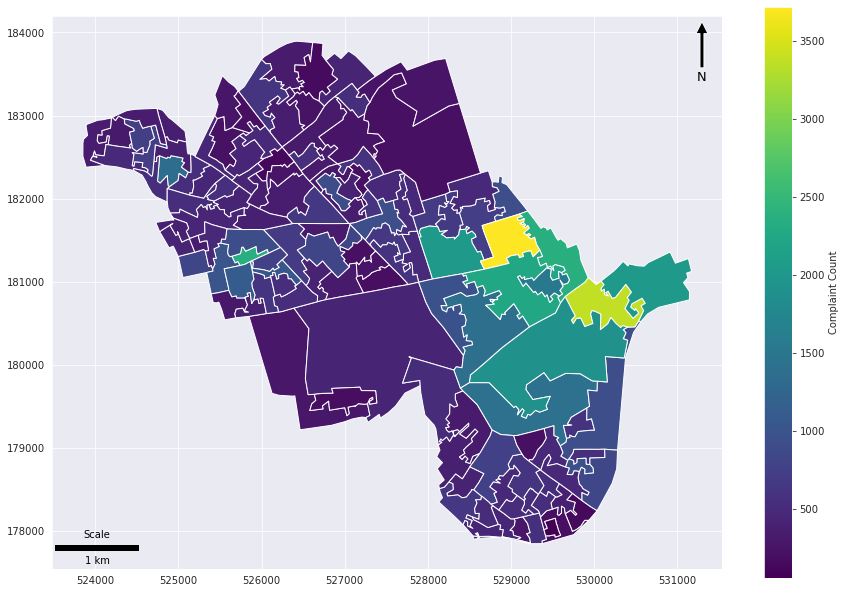

In [81]:
# Plot the count of complaints for each lsoa
# It is found that most areas has a record count at 500 level
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

fig, ax = plt.subplots(1, 1,figsize=(15,15))

im = noise_test_true_summary_lsoa_gdf.plot(column='Noise_Complaint_Index', ax=ax, cmap = 'viridis', legend=True,legend_kwds={'label': "Complaint Count",'shrink':0.7,
                        'orientation': "vertical"});
x, y, arrow_length = 0.97, 0.99, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=4, headwidth=12),
            ha='center', va='center', fontsize=13,color='black',
            xycoords=ax.transAxes)

#scalebar = ScaleBar(1) # 1 pixel = 1 meter

scale = ScaleBar(
    dx=1, label='Scale',  location=('lower left'),
    color='black', box_color='none',
    box_alpha=0.8  # Slightly transparent box
)

ax.add_artist(scale)


# Plot Repeat Complaint

In [82]:
noise_test.head()

Noise_Complaint_Index  Time Received_Date Financial_Year  \
0                   NC1     0      4/1/2018        2018/19   
1                   NC2     0      4/1/2018        2018/19   
2                   NC3     0      4/1/2018        2018/19   
3                   NC4     0      4/1/2018        2018/19   
4                   NC5     2      4/1/2018        2018/19   

      Service_Request Service_Request_Group_Type  \
0  Burglar/fire alarm            Noise Complaint   
1   Residential noise            Noise Complaint   
2   Residential noise            Noise Complaint   
3   Residential noise            Noise Complaint   
4   Residential noise            Noise Complaint   

  Service_Request_Group_Sub_Type   Service_Request_1 Address_Key_  \
0                 Property Alarm  Burglar/fire alarm          AD1   
1           Residential Premises   Residential noise          AD2   
2           Residential Premises   Residential noise          AD3   
3           Residential Premises   Residential noise          AD4   
4           Residential Premises   Residential noise          AD5   

  Type_of_Address  ... Month Weekday Season             Hour_Min Hour days  \
0         ADDRESS  ...     4       6      2  1900-01-01 00:11:00    0    0   
1         ADDRESS  ...     4       6      2  1900-01-01 00:37:00    0    0   
2         ADDRESS  ...     4       6      2  1900-01-01 00:38:00    0    0   
3         ADDRESS  ...     4       6      2  1900-01-01 00:46:00    0    0   
4         ADDRESS  ...     4       6      2  1900-01-01 02:27:00    0    0   

  Mins_oneday  Days_oneyear            date_time Hours_oneweek  
0          11            90  2018-04-01 00:11:00          -1.0  
1          37            90  2018-04-01 00:37:00          -1.0  
2          38            90  2018-04-01 00:38:00          -1.0  
3          46            90  2018-04-01 00:46:00          -1.0  
4         147            90  2018-04-01 02:27:00          -1.0  

[5 rows x 31 columns]

In [83]:
repeat_address = noise_test.groupby(['Address_Key_']).count()[['Noise_Complaint_Index']].reset_index().rename(columns={'Noise_Complaint_Index':'Repeat_Count'})
repeat_address

Address_Key_  Repeat_Count
0              AD1             2
1             AD10             5
2            AD100            25
3           AD1000             1
4          AD10000             2
...            ...           ...
25699       AD9995             1
25700       AD9996             2
25701       AD9997             2
25702       AD9998             1
25703       AD9999             3

[25704 rows x 2 columns]

In [84]:
repeat_address

Address_Key_  Repeat_Count
0              AD1             2
1             AD10             5
2            AD100            25
3           AD1000             1
4          AD10000             2
...            ...           ...
25699       AD9995             1
25700       AD9996             2
25701       AD9997             2
25702       AD9998             1
25703       AD9999             3

[25704 rows x 2 columns]

In [85]:
noise_test_repeat = noise_test.merge(repeat_address, on = 'Address_Key_')
# here we have

In [86]:
# 每个区域的具有重复投诉的地址数量
all_repeat_address = noise_test_repeat.loc[noise_test_repeat.Repeat_Count>1].drop_duplicates(subset = 'Address_Key_').groupby(['LSOA_2011_Code']).count()[['Noise_Complaint_Index']].reset_index().rename(columns={'Noise_Complaint_Index':'Repeat_address_lsoa'})
all_repeat_address

LSOA_2011_Code  Repeat_address_lsoa
0        E01004646                   46
1        E01004647                   58
2        E01004648                   80
3        E01004649                   30
4        E01004650                   48
..             ...                  ...
123      E01033604                   59
124      E01033605                   66
125      E01033606                   51
126      E01033607                   60
127      E01033608                   48

[128 rows x 2 columns]

In [87]:
# 每个区域的地址总数
all_address = noise_test_repeat.drop_duplicates(subset = 'Address_Key_').groupby(['LSOA_2011_Code']).count()[['Noise_Complaint_Index']].reset_index().rename(columns={'Noise_Complaint_Index':'All_address_lsoa'})
all_address 

LSOA_2011_Code  All_address_lsoa
0        E01004646               122
1        E01004647               146
2        E01004648               207
3        E01004649                84
4        E01004650               147
..             ...               ...
123      E01033604               141
124      E01033605               149
125      E01033606               157
126      E01033607               148
127      E01033608               128

[128 rows x 2 columns]

In [88]:
# 每个区域的具有重复投诉的地址上投诉的总量
all_repeat_address_complaints = noise_test_repeat.loc[noise_test_repeat.Repeat_Count>1].drop_duplicates(subset = 'Address_Key_').groupby(['LSOA_2011_Code']).sum().reset_index()[['LSOA_2011_Code','Repeat_Count']].rename(columns={'Repeat_Count':'Repeat_complaint_lsoa'})
all_repeat_address_complaints

LSOA_2011_Code  Repeat_complaint_lsoa
0        E01004646                    240
1        E01004647                    339
2        E01004648                    497
3        E01004649                    115
4        E01004650                    239
..             ...                    ...
123      E01033604                    260
124      E01033605                    803
125      E01033606                    228
126      E01033607                    373
127      E01033608                    347

[128 rows x 2 columns]

In [89]:
# 每个区域的具有重复投诉的地址上投诉的总量
all_address_complaints =  noise_test_repeat.drop_duplicates(subset = 'Address_Key_').groupby(['LSOA_2011_Code']).sum().reset_index()[['LSOA_2011_Code','Repeat_Count']].rename(columns={'Repeat_Count':'All_complaint_lsoa'})
all_address_complaints 

LSOA_2011_Code  All_complaint_lsoa
0        E01004646                 316
1        E01004647                 427
2        E01004648                 624
3        E01004649                 169
4        E01004650                 338
..             ...                 ...
123      E01033604                 342
124      E01033605                 886
125      E01033606                 334
126      E01033607                 461
127      E01033608                 427

[128 rows x 2 columns]

In [90]:
repeat_collection = all_repeat_address.merge(all_address ).merge(all_repeat_address_complaints ).merge(all_address_complaints )
repeat_collection

LSOA_2011_Code  Repeat_address_lsoa  All_address_lsoa  \
0        E01004646                   46               122   
1        E01004647                   58               146   
2        E01004648                   80               207   
3        E01004649                   30                84   
4        E01004650                   48               147   
..             ...                  ...               ...   
123      E01033604                   59               141   
124      E01033605                   66               149   
125      E01033606                   51               157   
126      E01033607                   60               148   
127      E01033608                   48               128   

     Repeat_complaint_lsoa  All_complaint_lsoa  
0                      240                 316  
1                      339                 427  
2                      497                 624  
3                      115                 169  
4                      239                 338  
..                     ...                 ...  
123                    260                 342  
124                    803                 886  
125                    228                 334  
126                    373                 461  
127                    347                 427  

[128 rows x 5 columns]

In [91]:
repeat_collection['Repeat_Address_Percent'] = repeat_collection['Repeat_address_lsoa'] /repeat_collection['All_address_lsoa']
repeat_collection['Repeat_complaint_Percent'] = repeat_collection['Repeat_complaint_lsoa'] /repeat_collection['All_complaint_lsoa']

In [92]:
lsoa_gdf = gpd.read_file("data_within_Westminster/westminster_lsoa_boundary.shp", driver = 'shp')
#lsoa_gdf = gpd.read_file("data_within_Westminster/LSOA_2011_London_gen_MHW.gpkg", driver = 'gpkg')

repeat_collection_lsoa_gdf = lsoa_gdf.merge(repeat_collection, left_on = 'LSOA11CD', right_on = 'LSOA_2011_Code' )

In [93]:
noise_test

Noise_Complaint_Index  Time Received_Date Financial_Year  \
0                       NC1     0      4/1/2018        2018/19   
1                       NC2     0      4/1/2018        2018/19   
2                       NC3     0      4/1/2018        2018/19   
3                       NC4     0      4/1/2018        2018/19   
4                       NC5     2      4/1/2018        2018/19   
...                     ...   ...           ...            ...   
88294               NC88295    18     3/31/2022        2021/22   
88295               NC88296    21     3/31/2022        2021/22   
88296               NC88297    21     3/31/2022        2021/22   
88297               NC88298    22     3/31/2022        2021/22   
88298               NC88299    22     3/31/2022        2021/22   

                      Service_Request Service_Request_Group_Type  \
0                  Burglar/fire alarm            Noise Complaint   
1                   Residential noise            Noise Complaint   
2                   Residential noise            Noise Complaint   
3                   Residential noise            Noise Complaint   
4                   Residential noise            Noise Complaint   
...                               ...                        ...   
88294             Noise in the street            Noise Complaint   
88295             Noise in the street            Noise Complaint   
88296               Residential noise            Noise Complaint   
88297  Noise from commercial premises            Noise Complaint   
88298             Noise in the street            Noise Complaint   

      Service_Request_Group_Sub_Type               Service_Request_1  \
0                     Property Alarm              Burglar/fire alarm   
1               Residential Premises               Residential noise   
2               Residential Premises               Residential noise   
3               Residential Premises               Residential noise   
4               Residential Premises               Residential noise   
...                              ...                             ...   
88294                         Street             Noise in the street   
88295                         Street             Noise in the street   
88296           Residential Premises               Residential noise   
88297            Commercial Premises  Noise from commercial premises   
88298                         Street             Noise in the street   

      Address_Key_ Type_of_Address  ... Month Weekday Season  \
0              AD1         ADDRESS  ...     4       6      2   
1              AD2         ADDRESS  ...     4       6      2   
2              AD3         ADDRESS  ...     4       6      2   
3              AD4         ADDRESS  ...     4       6      2   
4              AD5         ADDRESS  ...     4       6      2   
...            ...             ...  ...   ...     ...    ...   
88294       AD6203         ADDRESS  ...     3       3      2   
88295       AD6203         ADDRESS  ...     3       3      2   
88296      AD21714         ADDRESS  ...     3       3      2   
88297      AD27094         ADDRESS  ...     3       3      2   
88298      AD15649         ADDRESS  ...     3       3      2   

                  Hour_Min Hour  days Mins_oneday  Days_oneyear  \
0      1900-01-01 00:11:00    0     0          11            90   
1      1900-01-01 00:37:00    0     0          37            90   
2      1900-01-01 00:38:00    0     0          38            90   
3      1900-01-01 00:46:00    0     0          46            90   
4      1900-01-01 02:27:00    0     0         147            90   
...                    ...  ...   ...         ...           ...   
88294  1900-01-01 18:56:00    0  1460        1136            89   
88295  1900-01-01 21:04:00    0  1460        1264            89   
88296  1900-01-01 21:15:00    0  1460        1275            89   
88297  1900-01-01 22:03:00    0  1460        1323            89   
88298  1900-01-01 22:57:0

In [94]:
repeat_collection.Repeat_complaint_lsoa.sum()

66610

In [95]:
repeat_collection_lsoa_gdf.sort_values(by ="Repeat_Address_Percent")

LSOA11CD          LSOA11NM   MSOA11CD         MSOA11NM    LAD11CD  \
86   E01004739  Westminster 024E  E02000983  Westminster 024  E09000033   
49   E01004701  Westminster 007A  E02000966  Westminster 007  E09000033   
85   E01004738  Westminster 024D  E02000983  Westminster 024  E09000033   
125  E01033606  Westminster 014F  E02000973  Westminster 014  E09000033   
15   E01004662  Westminster 012D  E02000971  Westminster 012  E09000033   
..         ...               ...        ...              ...        ...   
105  E01004760  Westminster 014E  E02000973  Westminster 014  E09000033   
66   E01004719  Westminster 004B  E02000963  Westminster 004  E09000033   
90   E01004743  Westminster 021B  E02000980  Westminster 021  E09000033   
84   E01004737  Westminster 024C  E02000983  Westminster 024  E09000033   
21   E01004669  Westminster 024B  E02000983  Westminster 024  E09000033   

         LAD11NM    RGN11CD RGN11NM  USUALRES  HHOLDRES  ...  HHOLDS  \
86   Westminster  E12000007  London      1348      1348  ...     950   
49   Westminster  E12000007  London      1618      1618  ...     843   
85   Westminster  E12000007  London      1351      1306  ...     722   
125  Westminster  E12000007  London      1068      1064  ...     614   
15   Westminster  E12000007  London      1876      1876  ...    1040   
..           ...        ...     ...       ...       ...  ...     ...   
105  Westminster  E12000007  London      1630      1630  ...     771   
66   Westminster  E12000007  London      1909      1896  ...     786   
90   Westminster  E12000007  London      1396      1396  ...     713   
84   Westminster  E12000007  London      1301      1301  ...     683   
21   Westminster  E12000007  London      1683      1683  ...     758   

     AVHHOLDSZ                                           geometry  \
86         1.4  POLYGON ((529572.987 178005.279, 529597.000 17...   
49         1.9  POLYGON ((526247.313 182620.859, 526331.391 18...   
85         1.8  POLYGON ((529651.871 178210.694, 529728.662 17...   
125        1.7  POLYGON ((525237.341 181558.428, 525257.777 18...   
15         1.8  POLYGON ((527689.553 182011.873, 527709.198 18...   
..         ...                                                ...   
105        2.1  POLYGON ((524899.780 181676.249, 524968.613 18...   
66         2.4  POLYGON ((524348.178 182959.486, 524355.000 18...   
90         2.0  POLYGON ((530125.935 178985.975, 530129.953 17...   
84         1.9  POLYGON ((530035.882 178246.996, 529934.836 17...   
21         2.2  MULTIPOLYGON (((528860.877 177929.015, 528619....   

     LSOA_2011_Code Repeat_address_lsoa All_address_lsoa  \
86        E01004739                   9               39   
49        E01004701                  21               83   
85        E01004738                  32              101   
125       E01033606                  51              157   
15        E01004662                  65              200   
..              ...                 ...              ...   
105       E01004760                  84              160   
66        E01004719                  56              106   
90        E01004743                  77              144   
84        E01004737                  28               50   
21        E01004669                  88              152   

     Repeat_complaint_lsoa  All_complaint_lsoa  Repeat_Address_Percent  \
86                      26                  56                0.230769   
49                      70                 132                0.253012   
85                     132                 201                0.316832   
125                    228                 334                0.324841   
15                     382                 517                0.325000   
..                     ...                 ...                     ...   
105                    350                 426                0.525000   
66                     254                 304                0.528302   
90                     5

In [96]:
import numpy as np
a = repeat_collection_lsoa_gdf["Repeat_Address_Percent"]
p25 = np.quantile(a, 0.05) # return 50th percentile, e.g median.
p5 = np.quantile(a, 0.5) # return 50th percentile, e.g median.
p75 = np.quantile(a, 0.95) # return 50th percentile, e.g median.
print (p25,p5,p75)


0.3280899683817189 0.4163339856490541 0.5103019903912148


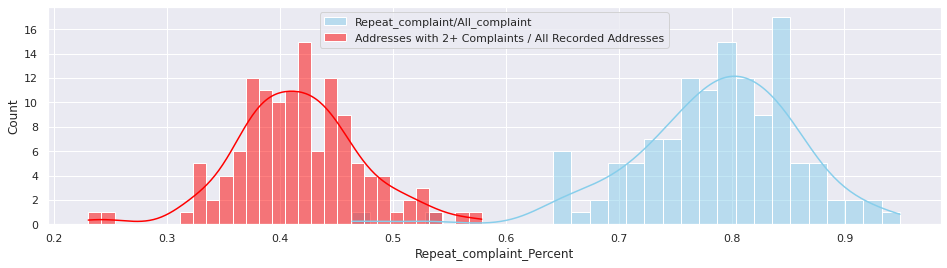

In [97]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
figure(figsize=(16, 4)) 
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = repeat_collection_lsoa_gdf
sns.histplot(data=df, x="Repeat_complaint_Percent", color="skyblue", label="Repeat_complaint/All_complaint", kde=True, bins = 30)
sns.histplot(data=df, x="Repeat_Address_Percent", color="red", label="Addresses with 2+ Complaints / All Recorded Addresses", kde=True,bins = 30)


plt.legend() 
plt.show()

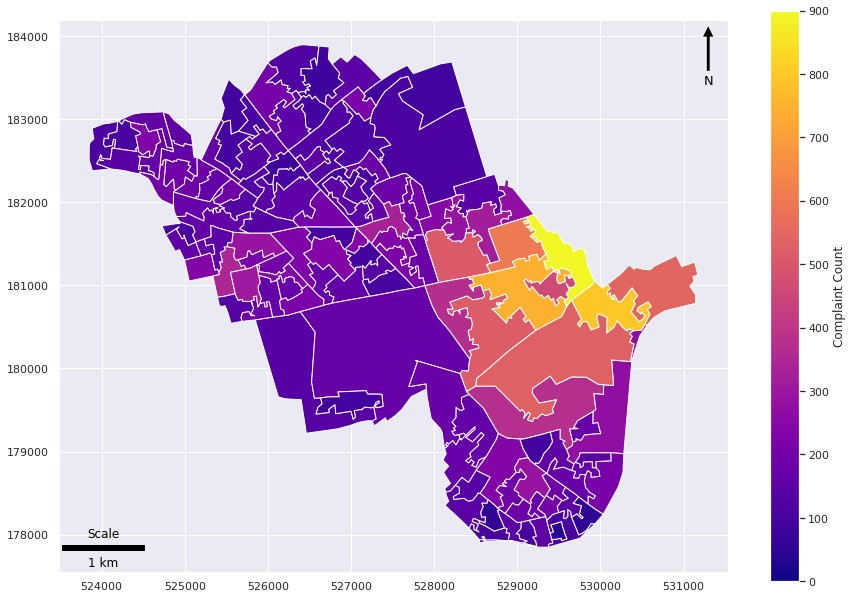

In [98]:
# Plot the count of complaints for each lsoa
# It is found that most areas has a record count at 500 level
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(15,15))

im = repeat_collection_lsoa_gdf.plot(column='All_address_lsoa', ax=ax, cmap = 'plasma', vmin = 0,vmax = 900,legend=True,legend_kwds={'label': "Complaint Count",'shrink':0.7,
                        'orientation': "vertical"});
x, y, arrow_length = 0.97, 0.99, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=4, headwidth=12),
            ha='center', va='center', fontsize=13,color='black',
            xycoords=ax.transAxes)

#scalebar = ScaleBar(1) # 1 pixel = 1 meter

scale = ScaleBar(
    dx=1, label='Scale',  location=('lower left'),
    color='black', box_color='none',
    box_alpha=0.8  # Slightly transparent box
)
ax.add_artist(scale)

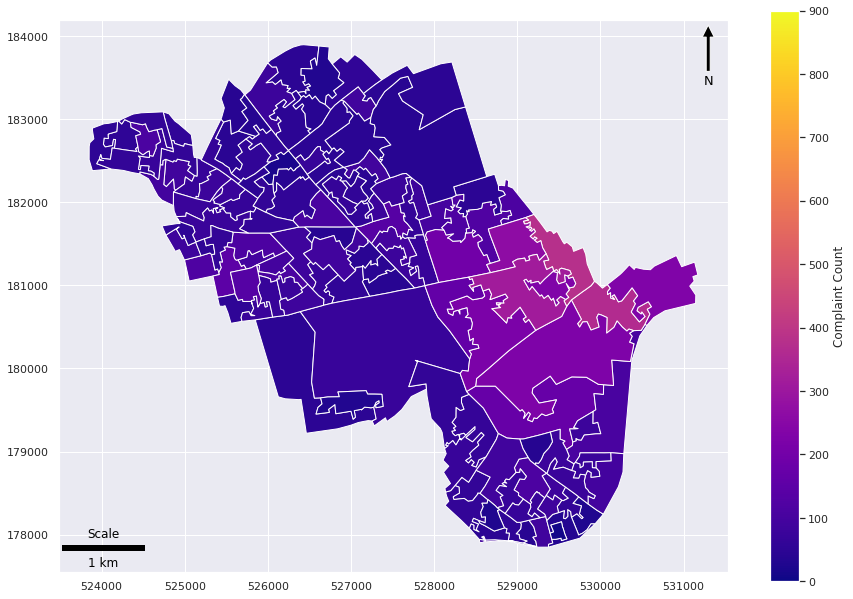

In [99]:
# Plot the count of complaints for each lsoa
# It is found that most areas has a record count at 500 level
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(15,15))

im = repeat_collection_lsoa_gdf.plot(column='Repeat_address_lsoa', ax=ax, cmap = 'plasma', vmin = 0,vmax = 900,legend=True,legend_kwds={'label': "Complaint Count",'shrink':0.7,
                        'orientation': "vertical"});
x, y, arrow_length = 0.97, 0.99, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=4, headwidth=12),
            ha='center', va='center', fontsize=13,color='black',
            xycoords=ax.transAxes)

#scalebar = ScaleBar(1) # 1 pixel = 1 meter

scale = ScaleBar(
    dx=1, label='Scale',  location=('lower left'),
    color='black', box_color='none',
    box_alpha=0.8  # Slightly transparent box
)
ax.add_artist(scale)

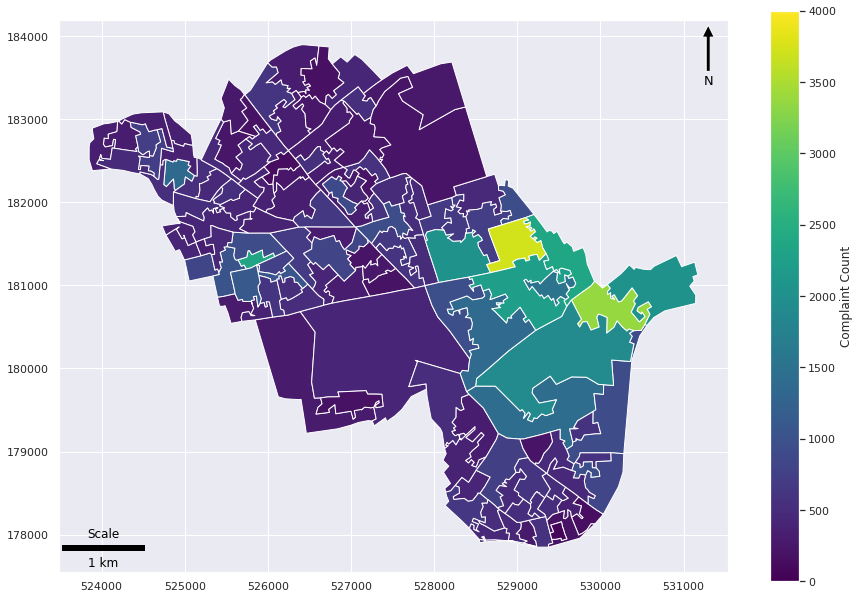

In [100]:
# Plot the count of complaints for each lsoa
# It is found that most areas has a record count at 500 level
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(15,15))

im = repeat_collection_lsoa_gdf.plot(column='All_complaint_lsoa', ax=ax, cmap = 'viridis',  vmin = 0,vmax = 4000,legend=True,legend_kwds={'label': "Complaint Count",'shrink':0.7,
                        'orientation': "vertical"});
x, y, arrow_length = 0.97, 0.99, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=4, headwidth=12),
            ha='center', va='center', fontsize=13,color='black',
            xycoords=ax.transAxes)

#scalebar = ScaleBar(1) # 1 pixel = 1 meter

scale = ScaleBar(
    dx=1, label='Scale',  location=('lower left'),
    color='black', box_color='none',
    box_alpha=0.8  # Slightly transparent box
)
ax.add_artist(scale)

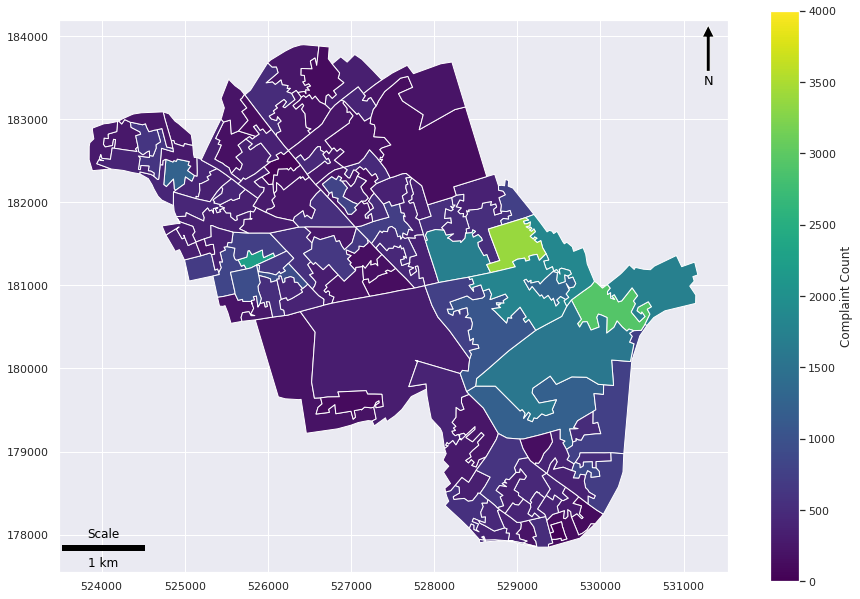

In [101]:
# Plot the count of complaints for each lsoa
# It is found that most areas has a record count at 500 level
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(15,15))

im = repeat_collection_lsoa_gdf.plot(column='Repeat_complaint_lsoa', ax=ax, cmap = 'viridis', vmin = 0,vmax = 4000,legend=True,legend_kwds={'label': "Complaint Count",'shrink':0.7,
                        'orientation': "vertical"});
x, y, arrow_length = 0.97, 0.99, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=4, headwidth=12),
            ha='center', va='center', fontsize=13,color='black',
            xycoords=ax.transAxes)

#scalebar = ScaleBar(1) # 1 pixel = 1 meter

scale = ScaleBar(
    dx=1, label='Scale',  location=('lower left'),
    color='black', box_color='none',
    box_alpha=0.8  # Slightly transparent box
)
ax.add_artist(scale)

In [102]:
s_2 = pd.read_csv('3_future_count_complete.csv')
s_2

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  index Noise_Complaint_Index  \
0               0             0               0      0                   NC1   
1               1         10418           10418  11375               NC11376   
2               2            66              66     68                  NC69   
3               3            84              84     90                  NC91   
4               4           198             198    213                 NC214   
...           ...           ...             ...    ...                   ...   
83736       83736         68145           68145  73797               NC73798   
83737       83737         68504           68504  74179               NC74180   
83738       83738         68792           68792  74486               NC74487   
83739       83739         74441           74441  80518               NC80519   
83740       83740         79214           79214  85726               NC85727   

       Time Received_Date Financial_Year      Service_Request  \
0         0      4/1/2018        2018/19   Burglar/fire alarm   
1        15    10/29/2018        2018/19   Burglar/fire alarm   
2         6      4/3/2018        2018/19   Burglar/fire alarm   
3        20      4/3/2018        2018/19     Busker complaint   
4        20      4/6/2018        2018/19     Busker complaint   
...     ...           ...            ...                  ...   
83736     1     7/24/2021        2021/22    Residential noise   
83737    13     7/30/2021        2021/22  Noise in the street   
83738     9      8/4/2021        2021/22        Building site   
83739    20     11/1/2021        2021/22    Residential noise   
83740    23      2/6/2022        2021/22    Residential noise   

      Service_Request_Group_Type  ... is_high_weekday is_high_month  \
0                Noise Complaint  ...               1             0   
1                Noise Complaint  ...               0             0   
2                Noise Complaint  ...               0             0   
3                Noise Complaint  ...               0             0   
4                Noise Complaint  ...               0             0   
...                          ...  ...             ...           ...   
83736            Noise Complaint  ...               1             1   
83737            Noise Complaint  ...               0             1   
83738            Noise Complaint  ...               0             1   
83739            Noise Complaint  ...               0             0   
83740            Noise Complaint  ...               1             0   

      is_lock_down Building Site Commercial Premises Email Complaint (1d)  \
0                0             0                   0                    0   
1                0             0                   0                    0   
2                0             0                   0                    0   
3                0             0                   0                    0   
4                0             0                   0                    0   
...            ...           ...                 ...                  ...   
83736            1             0                   0                    0   
83737            1             0                   0                    0   
83738            0             1                   0                    0   
83739            0             0                   0                    0   
83740            0             0                   0                    0   

      Non Noise Complaint (45m) Property Alarm Residential Premises Street  
0                             0              1                    0      0  
1                             0              1                    0      0  
2                             0              1                    0      0  
3                             0              0                    0      1  
4                             0              0                    0      1  
...                      

In [103]:
s_2 = pd.read_csv('3_future_count_complete.csv')
cluster_label = pd.read_csv('4_time_series_clusters_label.csv')
#time_feature_label = pd.read_csv('4_time_weekday_month_clustering.csv')
time_feature_cluster = pd.read_csv('4_time_feature_clustering.csv')
time_high_frequency = pd.read_csv('4_time_highfrequency.csv')
time_feature_cluster_NOT_DUMMY = pd.read_csv('4_time_feature_NOT_DUMMY.csv')

s_2 = s_2.merge(cluster_label, right_on = 'LSOA',left_on = 'LSOA_2011_Name')
#s_2 = s_2.merge(time_feature_label[['KMeans']], left_index = True, right_index = True)
s_2 = s_2.merge(time_high_frequency , left_index = True, right_index = True)
s_2 = s_2.merge(time_feature_cluster_NOT_DUMMY , left_index = True, right_index = True)
s_2 = s_2.drop(columns = ['Unnamed: 0_y'])

In [104]:
s_2 .columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'index',
       'Noise_Complaint_Index', 'Time', 'Received_Date', 'Financial_Year',
       'Service_Request', 'Service_Request_Group_Type',
       'Service_Request_Group_Sub_Type', 'Service_Request_1', 'Address_Key_',
       'Type_of_Address', 'Output_Area_Code_(2011)', 'MSOA_2011_Code',
       'MSOA_2011_Name', 'LSOA_2011_Code', 'LSOA_2011_Name', 'Ward_Name',
       'Date', 'Days', 'Year_Month', 'Year_Week', 'Year', 'Month', 'Weekday',
       'Season', 'days', 'is_repeat_2days', 'is_repeat_7days',
       'is_repeat_30days', '2days_count', '7days_count', '30days_count',
       'bef_todays_count', 'bef_yesterday_count', 'bef_2_7days_count',
       'bef_7_30days_count', 'bef_30_365days_count', 'bef_365_begindays_count',
       'is_repeat_2_7days', 'is_repeat_7_30days', 'top5_lsoa_count',
       'LSOA_Count', 'top5_address_count', 'Adress_Count', 'LSOA11CD',
       'cluster0', 'cluster1', 'cluster2', 'is_high_hour', 'is_high_weekday

In [105]:
s_2 = s_2.sort_values(by ='index').set_index('index').loc[0:88298]
s_2


Unnamed: 0_x  Unnamed: 0.1  Unnamed: 0.1.1 Noise_Complaint_Index  Time  \
index                                                                          
0                0             0               0                   NC1     0   
1             1975             1               1                   NC2     0   
2             2818             2               2                   NC3     0   
3             3479             3               3                   NC4     0   
4             4006             4               4                   NC5     2   
...            ...           ...             ...                   ...   ...   
88294         9252         81502           81502               NC88295    18   
88295         9253         81503           81503               NC88296    21   
88296        82443         81504           81504               NC88297    21   
88297         1936         81505           81505               NC88298    22   
88298        14209         81506           81506               NC88299    22   

      Received_Date Financial_Year                 Service_Request  \
index                                                                
0          4/1/2018        2018/19              Burglar/fire alarm   
1          4/1/2018        2018/19               Residential noise   
2          4/1/2018        2018/19               Residential noise   
3          4/1/2018        2018/19               Residential noise   
4          4/1/2018        2018/19               Residential noise   
...             ...            ...                             ...   
88294     3/31/2022        2021/22             Noise in the street   
88295     3/31/2022        2021/22             Noise in the street   
88296     3/31/2022        2021/22               Residential noise   
88297     3/31/2022        2021/22  Noise from commercial premises   
88298     3/31/2022        2021/22             Noise in the street   

      Service_Request_Group_Type Service_Request_Group_Sub_Type  ...  \
index                                                            ...   
0                Noise Complaint                 Property Alarm  ...   
1                Noise Complaint           Residential Premises  ...   
2                Noise Complaint           Residential Premises  ...   
3                Noise Complaint           Residential Premises  ...   
4                Noise Complaint           Residential Premises  ...   
...                          ...                            ...  ...   
88294            Noise Complaint                         Street  ...   
88295            Noise Complaint                         Street  ...   
88296            Noise Complaint           Residential Premises  ...   
88297            Noise Complaint            Commercial Premises  ...   
88298            Noise Complaint                         Street  ...   

      weekday_cl_3              LSOA Unnamed: 0_x within_high_hours  \
index                                                                 
0                0  Westminster 018C            0                 0   
1                1  Westminster 021C         2070                 0   
2                0  Westminster 023C         2978                 0   
3                0  Westminster 016C         3685                 1   
4                0  Westminster 013F         4283                 0   
...            ...               ...          ...               ...   
88294            1  Westminster 011B        10103                 0   
88295            1  Westminster 011B        10104                 0   
88296            0  Westminster 014F        89348                 1   
88297            0  Westminster 018C         2031                 1   
88298            1  Westminster 013B        15566                 0   

      within_high_weekdays within_high_months Days_oneyear_label  \
index                                                              
0                        0                  1            

In [106]:
s_2.loc[s_2.bef_todays_count >1]

Unnamed: 0_x  Unnamed: 0.1  Unnamed: 0.1.1 Noise_Complaint_Index  Time  \
index                                                                          
138          45032           128             128                 NC139    23   
167          17102           155             155                 NC168    17   
181          31278           166             166                 NC182    23   
479          71183           444             444                 NC480    19   
569          70287           531             531                 NC570     8   
...            ...           ...             ...                   ...   ...   
87918        60601         81168           81168               NC87919     9   
87923        53481         81172           81172               NC87924    10   
87944        65094         81188           81188               NC87945    18   
88113        69489         81345           81345               NC88114     2   
88221        14208         81442           81442               NC88222    22   

      Received_Date Financial_Year      Service_Request  \
index                                                     
138        4/4/2018        2018/19    Residential noise   
167        4/5/2018        2018/19     Busker complaint   
181        4/5/2018        2018/19    Residential noise   
479       4/12/2018        2018/19  Noise in the street   
569       4/14/2018        2018/19  Noise in the street   
...             ...            ...                  ...   
87918     3/24/2022        2021/22    Residential noise   
87923     3/24/2022        2021/22    Residential noise   
87944     3/24/2022        2021/22    Residential noise   
88113     3/27/2022        2021/22    Residential noise   
88221     3/29/2022        2021/22  Noise in the street   

      Service_Request_Group_Type Service_Request_Group_Sub_Type  ...  \
index                                                            ...   
138              Noise Complaint           Residential Premises  ...   
167              Noise Complaint                         Street  ...   
181              Noise Complaint           Residential Premises  ...   
479              Noise Complaint                         Street  ...   
569              Noise Complaint                         Street  ...   
...                          ...                            ...  ...   
87918            Noise Complaint           Residential Premises  ...   
87923            Noise Complaint           Residential Premises  ...   
87944            Noise Complaint           Residential Premises  ...   
88113            Noise Complaint           Residential Premises  ...   
88221            Noise Complaint                         Street  ...   

      weekday_cl_3              LSOA Unnamed: 0_x within_high_hours  \
index                                                                 
138              1  Westminster 024B        49140                 0   
167              0  Westminster 013D        18862                 1   
181              0  Westminster 013A        34497                 0   
479              0  Westminster 002D        77030                 1   
569              1  Westminster 008C        76073                 1   
...            ...               ...          ...               ...   
87918            0  Westminster 021B        65700                 1   
87923            1  Westminster 017E        58125                 0   
87944            0  Westminster 009I        70545                 1   
88113            1  Westminster 019D        75224                 0   
88221            1  Westminster 013B        15565                 0   

      within_high_weekdays within_high_months Days_oneyear_label  \
index                                                              
138                      0                  1                  7   
167                      1                  0                  2   
181                      0                  0                 12

In [107]:
s_2.loc[s_2.bef_2_7days_count >1]

Unnamed: 0_x  Unnamed: 0.1  Unnamed: 0.1.1 Noise_Complaint_Index  Time  \
index                                                                          
215          16376           200             200                 NC216    20   
217          17103           202             202                 NC218    21   
221          16377           206             206                 NC222    21   
294          20749           276             276                 NC295     8   
310          50514           291             291                 NC311    18   
...            ...           ...             ...                   ...   ...   
88265        39362         81480           81480               NC88266    21   
88274        65928         81487           81487               NC88275     2   
88294         9252         81502           81502               NC88295    18   
88295         9253         81503           81503               NC88296    21   
88298        14209         81506           81506               NC88299    22   

      Received_Date Financial_Year                 Service_Request  \
index                                                                
215        4/6/2018        2018/19               Residential noise   
217        4/6/2018        2018/19                Busker complaint   
221        4/6/2018        2018/19               Residential noise   
294        4/8/2018        2018/19  Noise from commercial premises   
310        4/8/2018        2018/19               Residential noise   
...             ...            ...                             ...   
88265     3/30/2022        2021/22               Residential noise   
88274     3/31/2022        2021/22               Residential noise   
88294     3/31/2022        2021/22             Noise in the street   
88295     3/31/2022        2021/22             Noise in the street   
88298     3/31/2022        2021/22             Noise in the street   

      Service_Request_Group_Type Service_Request_Group_Sub_Type  ...  \
index                                                            ...   
215              Noise Complaint           Residential Premises  ...   
217              Noise Complaint                         Street  ...   
221              Noise Complaint           Residential Premises  ...   
294              Noise Complaint            Commercial Premises  ...   
310              Noise Complaint           Residential Premises  ...   
...                          ...                            ...  ...   
88265            Noise Complaint           Residential Premises  ...   
88274            Noise Complaint           Residential Premises  ...   
88294            Noise Complaint                         Street  ...   
88295            Noise Complaint                         Street  ...   
88298            Noise Complaint                         Street  ...   

      weekday_cl_3              LSOA Unnamed: 0_x within_high_hours  \
index                                                                 
215              0  Westminster 013D        18055                 0   
217              0  Westminster 013D        18863                 1   
221              0  Westminster 013D        18056                 0   
294              1  Westminster 018A        22925                 1   
310              1  Westminster 021A        54936                 0   
...            ...               ...          ...               ...   
88265            0  Westminster 004D        43161                 1   
88274            0  Westminster 010G        71424                 0   
88294            1  Westminster 011B        10103                 0   
88295            1  Westminster 011B        10104                 0   
88298            1  Westminster 013B        15566                 0   

      within_high_weekdays within_high_months Days_oneyear_label  \
index                                                              
215                      1                  0            

In [108]:
s_2.loc[s_2.bef_7_30days_count >1]

Unnamed: 0_x  Unnamed: 0.1  Unnamed: 0.1.1 Noise_Complaint_Index  Time  \
index                                                                          
411          14888           382             382                 NC412     0   
434          14889           403             403                 NC435    19   
482          16378           447             447                 NC483    20   
483          28472           448             448                 NC484    20   
526          20617           489             489                 NC527    17   
...            ...           ...             ...                   ...   ...   
88276        33966         81489           81489               NC88277     4   
88294         9252         81502           81502               NC88295    18   
88295         9253         81503           81503               NC88296    21   
88297         1936         81505           81505               NC88298    22   
88298        14209         81506           81506               NC88299    22   

      Received_Date Financial_Year                 Service_Request  \
index                                                                
411       4/11/2018        2018/19               Residential noise   
434       4/11/2018        2018/19               Residential noise   
482       4/12/2018        2018/19               Residential noise   
483       4/12/2018        2018/19               Residential noise   
526       4/13/2018        2018/19                Busker complaint   
...             ...            ...                             ...   
88276     3/31/2022        2021/22  Noise from commercial premises   
88294     3/31/2022        2021/22             Noise in the street   
88295     3/31/2022        2021/22             Noise in the street   
88297     3/31/2022        2021/22  Noise from commercial premises   
88298     3/31/2022        2021/22             Noise in the street   

      Service_Request_Group_Type Service_Request_Group_Sub_Type  ...  \
index                                                            ...   
411              Noise Complaint           Residential Premises  ...   
434              Noise Complaint           Residential Premises  ...   
482              Noise Complaint           Residential Premises  ...   
483              Noise Complaint           Residential Premises  ...   
526              Noise Complaint                         Street  ...   
...                          ...                            ...  ...   
88276            Noise Complaint            Commercial Premises  ...   
88294            Noise Complaint                         Street  ...   
88295            Noise Complaint                         Street  ...   
88297            Noise Complaint            Commercial Premises  ...   
88298            Noise Complaint                         Street  ...   

      weekday_cl_3              LSOA Unnamed: 0_x within_high_hours  \
index                                                                 
411              1  Westminster 010F        16403                 0   
434              1  Westminster 010F        16404                 0   
482              0  Westminster 013D        18057                 0   
483              1  Westminster 014A        31408                 0   
526              1  Westminster 018A        22774                 1   
...            ...               ...          ...               ...   
88276            0  Westminster 007G        37385                 1   
88294            1  Westminster 011B        10103                 0   
88295            1  Westminster 011B        10104                 0   
88297            0  Westminster 018C         2031                 1   
88298            1  Westminster 013B        15566                 0   

      within_high_weekdays within_high_months Days_oneyear_label  \
index                                                              
411                      0                  0            

In [109]:
s_2.loc[s_2.bef_30_365days_count >1]

Unnamed: 0_x  Unnamed: 0.1  Unnamed: 0.1.1 Noise_Complaint_Index  Time  \
index                                                                          
1671         17126          1585            1585                NC1672    16   
1678         16388          1592            1592                NC1679    17   
1683         16389          1597            1597                NC1684    19   
1692         16390          1606            1606                NC1693    21   
1735         17127          1649            1649                NC1736    13   
...            ...           ...             ...                   ...   ...   
88278        75903         81491           81491               NC88279     7   
88290        70098         81500           81500               NC88291    15   
88294         9252         81502           81502               NC88295    18   
88295         9253         81503           81503               NC88296    21   
88298        14209         81506           81506               NC88299    22   

      Received_Date Financial_Year      Service_Request  \
index                                                     
1671       5/5/2018        2018/19     Busker complaint   
1678       5/5/2018        2018/19    Residential noise   
1683       5/5/2018        2018/19    Residential noise   
1692       5/5/2018        2018/19    Residential noise   
1735       5/6/2018        2018/19     Busker complaint   
...             ...            ...                  ...   
88278     3/31/2022        2021/22    Residential noise   
88290     3/31/2022        2021/22    Residential noise   
88294     3/31/2022        2021/22  Noise in the street   
88295     3/31/2022        2021/22  Noise in the street   
88298     3/31/2022        2021/22  Noise in the street   

      Service_Request_Group_Type Service_Request_Group_Sub_Type  ...  \
index                                                            ...   
1671             Noise Complaint                         Street  ...   
1678             Noise Complaint           Residential Premises  ...   
1683             Noise Complaint           Residential Premises  ...   
1692             Noise Complaint           Residential Premises  ...   
1735             Noise Complaint                         Street  ...   
...                          ...                            ...  ...   
88278            Noise Complaint           Residential Premises  ...   
88290            Noise Complaint           Residential Premises  ...   
88294            Noise Complaint                         Street  ...   
88295            Noise Complaint                         Street  ...   
88298            Noise Complaint                         Street  ...   

      weekday_cl_3              LSOA Unnamed: 0_x within_high_hours  \
index                                                                 
1671             0  Westminster 013D        18888                 0   
1678             0  Westminster 013D        18067                 0   
1683             0  Westminster 013D        18068                 0   
1692             0  Westminster 013D        18069                 0   
1735             0  Westminster 013D        18889                 0   
...            ...               ...          ...               ...   
88278            0  Westminster 023F        82106                 0   
88290            0  Westminster 006A        75877                 0   
88294            1  Westminster 011B        10103                 0   
88295            1  Westminster 011B        10104                 0   
88298            1  Westminster 013B        15566                 0   

      within_high_weekdays within_high_months Days_oneyear_label  \
index                                                              
1671                     1                  0                  2   
1678                     1                  0                  2   
1683                     1                  0                  2

Text(0, 0.5, 'Group')

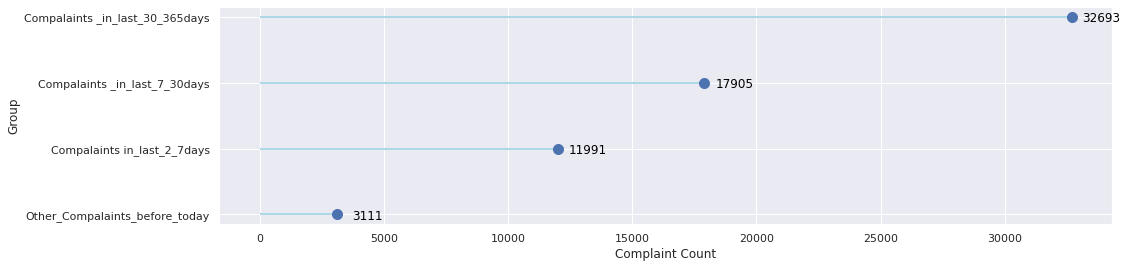

In [110]:

# import pandas as pd
import pandas as pd
figure(figsize=(16, 4)) 
# list of strings
lst = ['Other_Compalaints_before_today','Compalaints in_last_2_7days','Compalaints _in_last_7_30days','Compalaints _in_last_30_365days']
  
# list of int
lst2 = [3111,11991,17905,32693]
  
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['Repeat_Time_Scale', 'Count']).set_index('Repeat_Time_Scale')
df

#graph = df['Count'].plot(figsize=(16,5), kind='barh',color=(0.2, 0.4, 0.6, 0.6))

my_range=range(0,len(df.index))

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0,lw=2, xmax=df['Count'], color='lightblue')
plt.plot(df['Count'], my_range, "o",markersize=10 )



lst3 = [0,1,2,3]

df_1 = df.copy().reset_index()
df_1['Type'] =df_1['Repeat_Time_Scale']
df_1 = df_1.set_index('Repeat_Time_Scale')

for i in range(len(df_1['Count'])):
    #label = "{:.0f}".format(i)
    plt.annotate(str(df_1['Count'][i]), # this is the text
                 (df_1['Count'][i],lst3[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(30,-5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  

# Add titles and axis names
plt.yticks(my_range, df_1['Type'])
#plt.title("Complaint Count", loc='left')
plt.xlabel('Complaint Count')
plt.ylabel('Group')

In [111]:
df

Count
Repeat_Time_Scale                     
Other_Compalaints_before_today    3111
Compalaints in_last_2_7days      11991
Compalaints _in_last_7_30days    17905
Compalaints _in_last_30_365days  32693

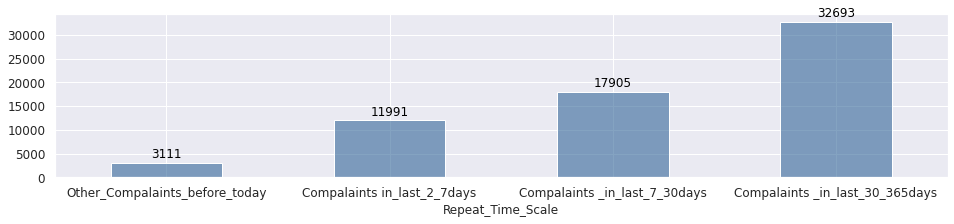

In [112]:
graph = df['Count'].plot(figsize=(16,3), kind='bar',color=(0.2, 0.4, 0.6, 0.6))



plt.xticks(size =12,rotation=0, ha='center')
plt.yticks(size =12,rotation=0, ha='right')

df_1 = df.copy().reset_index()
df_1['Type'] =df_1['Repeat_Time_Scale']
df_1 = df_1.set_index('Repeat_Time_Scale')

for i in range(len(df_1['Count'])):
    #label = "{:.0f}".format(i)
    plt.annotate(str(df_1['Count'][i]), # this is the text
                 (lst3[i],df_1['Count'][i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 color = 'black',
                 ha='center') # horizontal alignment can be left, right or center  

#graph.axhline(mean_value,color='r', ls="--", lw=2,)

In [113]:
Complaints_today_bef_lsoa = s_2.loc[s_2.bef_todays_count >1].groupby(['LSOA_2011_Code']).count()[['Noise_Complaint_Index']].reset_index().rename(columns={'Noise_Complaint_Index':'Complaints_today_bef_lsoa'})
Complaints_today_bef_lsoa 

LSOA_2011_Code  Complaints_today_bef_lsoa
0        E01004646                          2
1        E01004647                          9
2        E01004648                         32
3        E01004649                          1
4        E01004650                          8
..             ...                        ...
120      E01033604                          7
121      E01033605                        117
122      E01033606                          2
123      E01033607                         13
124      E01033608                          8

[125 rows x 2 columns]

In [114]:
# 每个区域的地址总数
Complaints_2_7days_bef_lsoa = s_2.loc[s_2.bef_2_7days_count >1].groupby(['LSOA_2011_Code']).count()[['Noise_Complaint_Index']].reset_index().rename(columns={'Noise_Complaint_Index':'Complaints_2_7days_bef_lsoa'})
Complaints_2_7days_bef_lsoa

LSOA_2011_Code  Complaints_2_7days_bef_lsoa
0        E01004646                           15
1        E01004647                           20
2        E01004648                          124
3        E01004649                           12
4        E01004650                           16
..             ...                          ...
123      E01033604                           25
124      E01033605                          420
125      E01033606                            8
126      E01033607                           35
127      E01033608                           30

[128 rows x 2 columns]

In [115]:
Complaints_7_30days_bef_lsoa = s_2.loc[s_2.bef_7_30days_count >1].groupby(['LSOA_2011_Code']).count()[['Noise_Complaint_Index']].reset_index().rename(columns={'Noise_Complaint_Index':'Complaints_7_30days_bef_lsoa'})
Complaints_7_30days_bef_lsoa

LSOA_2011_Code  Complaints_7_30days_bef_lsoa
0        E01004646                            37
1        E01004647                            42
2        E01004648                           163
3        E01004649                            15
4        E01004650                            24
..             ...                           ...
122      E01033604                            32
123      E01033605                           472
124      E01033606                            30
125      E01033607                            77
126      E01033608                            86

[127 rows x 2 columns]

In [116]:
Complaints_30_365days_bef_lsoa = s_2.loc[s_2.bef_30_365days_count >1].groupby(['LSOA_2011_Code']).count()[['Noise_Complaint_Index']].reset_index().rename(columns={'Noise_Complaint_Index':'Complaints_30_365days_bef_lsoa'})
Complaints_30_365days_bef_lsoa

LSOA_2011_Code  Complaints_30_365days_bef_lsoa
0        E01004646                              94
1        E01004647                             140
2        E01004648                             272
3        E01004649                              20
4        E01004650                              80
..             ...                             ...
123      E01033604                              76
124      E01033605                             565
125      E01033606                              97
126      E01033607                             185
127      E01033608                             185

[128 rows x 2 columns]

In [117]:
bef_complaint_collection = Complaints_today_bef_lsoa.merge(Complaints_2_7days_bef_lsoa ).merge(Complaints_7_30days_bef_lsoa ).merge(Complaints_30_365days_bef_lsoa).merge(Complaints_30_365days_bef_lsoa ).merge(repeat_collection)
bef_complaint_collection['before_today_percent'] = bef_complaint_collection['Complaints_today_bef_lsoa']/bef_complaint_collection['All_complaint_lsoa']
bef_complaint_collection['before_2_7days_percent'] = bef_complaint_collection['Complaints_2_7days_bef_lsoa']/bef_complaint_collection['All_complaint_lsoa']
bef_complaint_collection['before_7_30days_percent'] = bef_complaint_collection['Complaints_7_30days_bef_lsoa']/bef_complaint_collection['All_complaint_lsoa']
bef_complaint_collection['before_30_365days_percent'] = bef_complaint_collection['Complaints_30_365days_bef_lsoa']/bef_complaint_collection['All_complaint_lsoa']


bef_complaint_collection_lsoa_gdf = lsoa_gdf.merge(bef_complaint_collection, left_on = 'LSOA11CD', right_on = 'LSOA_2011_Code' )
bef_complaint_collection_lsoa_gdf

LSOA11CD          LSOA11NM   MSOA11CD         MSOA11NM    LAD11CD  \
0    E01004646  Westminster 002A  E02000961  Westminster 002  E09000033   
1    E01004647  Westminster 001A  E02000960  Westminster 001  E09000033   
2    E01004648  Westminster 002B  E02000961  Westminster 002  E09000033   
3    E01004649  Westminster 001B  E02000960  Westminster 001  E09000033   
4    E01004650  Westminster 002C  E02000961  Westminster 002  E09000033   
..         ...               ...        ...              ...        ...   
120  E01033604  Westminster 009J  E02000968  Westminster 009  E09000033   
121  E01033605  Westminster 009K  E02000968  Westminster 009  E09000033   
122  E01033606  Westminster 014F  E02000973  Westminster 014  E09000033   
123  E01033607  Westminster 014G  E02000973  Westminster 014  E09000033   
124  E01033608  Westminster 007G  E02000966  Westminster 007  E09000033   

         LAD11NM    RGN11CD RGN11NM  USUALRES  HHOLDRES  ...  \
0    Westminster  E12000007  London      1653      1653  ...   
1    Westminster  E12000007  London      1480      1480  ...   
2    Westminster  E12000007  London      2398      2398  ...   
3    Westminster  E12000007  London      1708      1593  ...   
4    Westminster  E12000007  London      1996      1992  ...   
..           ...        ...     ...       ...       ...  ...   
120  Westminster  E12000007  London      1236      1236  ...   
121  Westminster  E12000007  London      2046      2004  ...   
122  Westminster  E12000007  London      1068      1064  ...   
123  Westminster  E12000007  London      1199      1193  ...   
124  Westminster  E12000007  London      1416      1369  ...   

     Repeat_address_lsoa  All_address_lsoa  Repeat_complaint_lsoa  \
0                     46               122                    240   
1                     58               146                    339   
2                     80               207                    497   
3                     30                84                    115   
4                     48               147                    239   
..                   ...               ...                    ...   
120                   59               141                    260   
121                   66               149                    803   
122                   51               157                    228   
123                   60               148                    373   
124                   48               128                    347   

     All_complaint_lsoa Repeat_Address_Percent Repeat_complaint_Percent  \
0                   316               0.377049                 0.759494   
1                   427               0.397260                 0.793911   
2                   624               0.386473                 0.796474   
3                   169               0.357143                 0.680473   
4                   338               0.326531                 0.707101   
..                  ...                    ...                      ...   
120                 342               0.418440                 0.760234   
121                 886               0.442953                 0.906321   
122                 334               0.324841                 0.682635   
123                 461               0.405405                 0.809111   
124                 427               0.375000                 0.812646   

     before_today_percent  before_2_7days_percent  before_7_30days_percent  \
0                0.006329                0.047468                 0.117089   
1                0.021077                0.046838                 0.098361   
2                0.051282                0.198718                 0.261218   
3                0.005917                0.071006                 0.088757   
4                0.023669                0.047337                 0.071006   
..                    ...                     ...                      ...   
120              0.020468                0.073099           

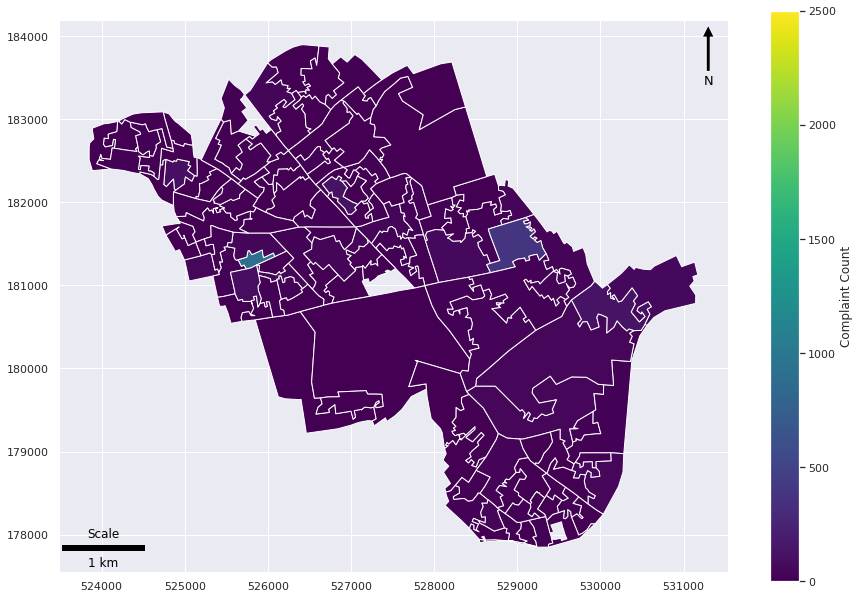

In [118]:
# Plot the count of complaints for each lsoa
# It is found that most areas has a record count at 500 level
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(15,15))

im = bef_complaint_collection_lsoa_gdf.plot(column='Complaints_today_bef_lsoa', ax=ax,  vmin = 0,vmax = 2500,cmap = 'viridis',legend=True,legend_kwds={'label': "Complaint Count",'shrink':0.7,
                        'orientation': "vertical"});
x, y, arrow_length = 0.97, 0.99, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=4, headwidth=12),
            ha='center', va='center', fontsize=13,color='black',
            xycoords=ax.transAxes)

#scalebar = ScaleBar(1) # 1 pixel = 1 meter

scale = ScaleBar(
    dx=1, label='Scale',  location=('lower left'),
    color='black', box_color='none',
    box_alpha=0.8  # Slightly transparent box
)
ax.add_artist(scale)

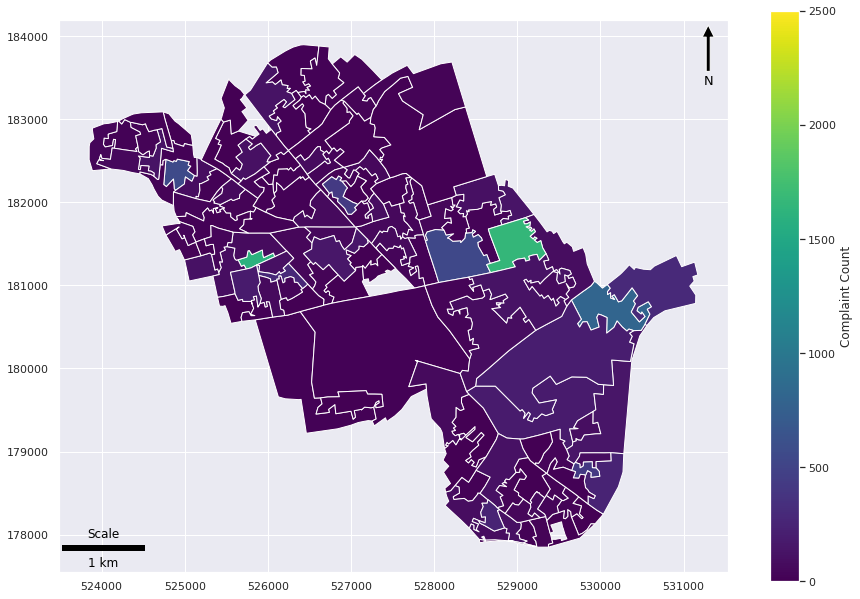

In [119]:
# Plot the count of complaints for each lsoa
# It is found that most areas has a record count at 500 level
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(15,15))

im = bef_complaint_collection_lsoa_gdf.plot(column='Complaints_2_7days_bef_lsoa', ax=ax,  vmin = 0,vmax = 2500,cmap = 'viridis',legend=True,legend_kwds={'label': "Complaint Count",'shrink':0.7,
                        'orientation': "vertical"});
x, y, arrow_length = 0.97, 0.99, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=4, headwidth=12),
            ha='center', va='center', fontsize=13,color='black',
            xycoords=ax.transAxes)

#scalebar = ScaleBar(1) # 1 pixel = 1 meter

scale = ScaleBar(
    dx=1, label='Scale',  location=('lower left'),
    color='black', box_color='none',
    box_alpha=0.8  # Slightly transparent box
)
ax.add_artist(scale)

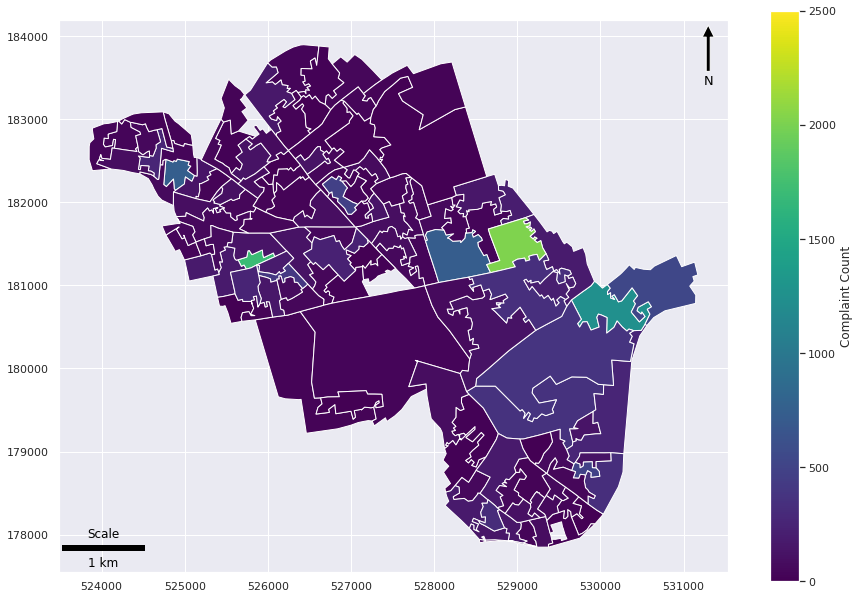

In [120]:
# Plot the count of complaints for each lsoa
# It is found that most areas has a record count at 500 level
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(15,15))

im = bef_complaint_collection_lsoa_gdf.plot(column='Complaints_7_30days_bef_lsoa', ax=ax, vmin = 0,vmax = 2500,cmap = 'viridis',legend=True,legend_kwds={'label': "Complaint Count",'shrink':0.7,
                        'orientation': "vertical"});
x, y, arrow_length = 0.97, 0.99, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=4, headwidth=12),
            ha='center', va='center', fontsize=13,color='black',
            xycoords=ax.transAxes)

#scalebar = ScaleBar(1) # 1 pixel = 1 meter

scale = ScaleBar(
    dx=1, label='Scale',  location=('lower left'),
    color='black', box_color='none',
    box_alpha=0.8  # Slightly transparent box
)
ax.add_artist(scale)

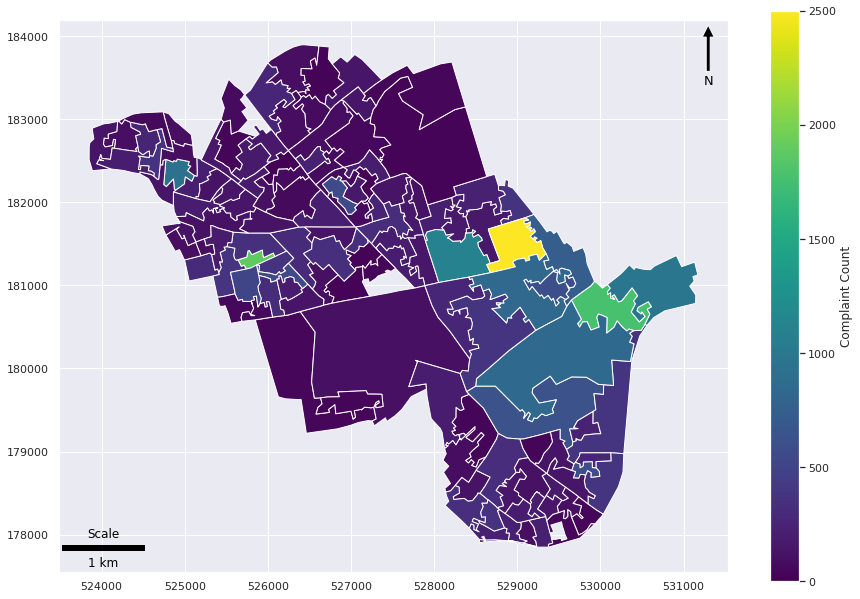

In [121]:
# Plot the count of complaints for each lsoa
# It is found that most areas has a record count at 500 level
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(15,15))

im = bef_complaint_collection_lsoa_gdf.plot(column='Complaints_30_365days_bef_lsoa', ax=ax, vmin = 0,vmax = 2500, cmap = 'viridis',legend=True,legend_kwds={'label': "Complaint Count",'shrink':0.7,
                        'orientation': "vertical"});
x, y, arrow_length = 0.97, 0.99, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=4, headwidth=12),
            ha='center', va='center', fontsize=13,color='black',
            xycoords=ax.transAxes)

#scalebar = ScaleBar(1) # 1 pixel = 1 meter

scale = ScaleBar(
    dx=1, label='Scale',  location=('lower left'),
    color='black', box_color='none',
    box_alpha=0.8  # Slightly transparent box
)
ax.add_artist(scale)

In [122]:
s_2.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Noise_Complaint_Index', 'Time', 'Received_Date', 'Financial_Year',
       'Service_Request', 'Service_Request_Group_Type',
       'Service_Request_Group_Sub_Type', 'Service_Request_1', 'Address_Key_',
       'Type_of_Address', 'Output_Area_Code_(2011)', 'MSOA_2011_Code',
       'MSOA_2011_Name', 'LSOA_2011_Code', 'LSOA_2011_Name', 'Ward_Name',
       'Date', 'Days', 'Year_Month', 'Year_Week', 'Year', 'Month', 'Weekday',
       'Season', 'days', 'is_repeat_2days', 'is_repeat_7days',
       'is_repeat_30days', '2days_count', '7days_count', '30days_count',
       'bef_todays_count', 'bef_yesterday_count', 'bef_2_7days_count',
       'bef_7_30days_count', 'bef_30_365days_count', 'bef_365_begindays_count',
       'is_repeat_2_7days', 'is_repeat_7_30days', 'top5_lsoa_count',
       'LSOA_Count', 'top5_address_count', 'Adress_Count', 'LSOA11CD',
       'cluster0', 'cluster1', 'cluster2', 'is_high_hour', 'is_high_weekday',
      

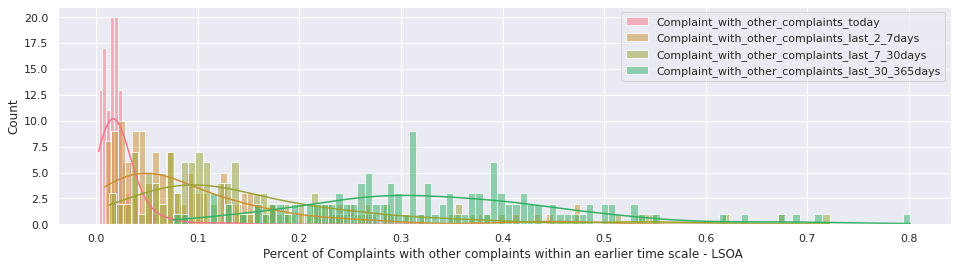

In [123]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
figure(figsize=(16, 4)) 
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 

color = sns.color_palette("husl", 8)
sns.set(style="darkgrid")
df = bef_complaint_collection_lsoa_gdf

sns.histplot(data=df , x="before_today_percent", color=color[0], label="Complaint_with_other_complaints_today", kde=True, bins = 100)
sns.histplot(data=df , x="before_2_7days_percent", color=color[1], label="Complaint_with_other_complaints_last_2_7days", kde=True,bins = 100)

sns.histplot(data=df , x="before_7_30days_percent", color=color[2], label="Complaint_with_other_complaints_last_7_30days", kde=True, bins = 100)
sns.histplot(data=df , x="before_30_365days_percent", color=color[3], label="Complaint_with_other_complaints_last_30_365days", kde=True,bins = 100)
plt.xlabel('Percent of Complaints with other complaints within an earlier time scale - LSOA ')

plt.legend() 
plt.show()

In [124]:
noise_test_true = noise_test.copy()

In [164]:
# 接着要进一步除去 seasonality, 只聚类时间

In [165]:
noise_test_true['Category_by'] = noise_test_true['Year_Month'] 
#noise_test_true['Category_by'] = noise_test_true['Year_Week'] 


In [166]:
# 以24小时和lsoa进行分类汇总

# Summarize the complaints with lsoa, only 161 records, meaning that one lsoa has no records.

noise_test_true_summary_lsoa_time = noise_test_true.groupby(['LSOA_2011_Name','Category_by']).count()[['Noise_Complaint_Index']].reset_index()
noise_test_true_summary_lsoa_time  = noise_test_true_summary_lsoa_time.set_index(noise_test_true_summary_lsoa_time['Category_by'])


In [167]:
series = []
LSOA_name = noise_test_true_summary_lsoa_time.LSOA_2011_Name.unique()
for i in LSOA_name:
    df = noise_test_true_summary_lsoa_time.loc[noise_test_true_summary_lsoa_time.LSOA_2011_Name == i]

    series.append(df)

In [168]:
series_lengths = {len(serie) for serie in series}
print(series_lengths)


{40, 42, 43, 44, 45, 46, 47, 48, 29}


In [169]:
# Here find the longest series, the residential noise, with zero

max_len = max(series_lengths)
longest_series = None
for serie in series:
    if len(serie) == max_len:
        longest_serie = serie

In [170]:
problems_index = []

for i in range(len(series)):
    if len(series[i])!= max_len:
        problems_index.append(i)
        series[i] = series[i].reindex(longest_serie.index)

In [171]:
for i in range(len(series)):
    # Use interpolation to fill values between dates
    series[i]['Noise_Complaint_Index'].interpolate(method ='linear', limit_direction ='forward', inplace=True)
    # Some stores probably were closed on 01-01-YYYYY, fill it by the value on the next day
    series[i]['Noise_Complaint_Index'].fillna(method ='bfill', inplace=True)
    series[i]['smoth_6'] = series[i]['Noise_Complaint_Index'].rolling(6).mean()
    series[i]['LSOA_2011_Name'] = series[i]['LSOA_2011_Name'].fillna(LSOA_name[i])
    series[i] = series[i].drop(['Category_by'], axis = 1)
    series[i] = series[i].dropna()

In [172]:
series[1].head()

LSOA_2011_Name  Noise_Complaint_Index   smoth_6
Category_by                                                   
2018-09      Westminster 001B                    2.0  3.916667
2018-10      Westminster 001B                    2.0  4.083333
2018-11      Westminster 001B                    6.0  4.666667
2018-12      Westminster 001B                    1.0  4.166667
2019-01      Westminster 001B                   16.0  5.500000

In [173]:
series_test = series.copy()
for i in range(len(series_test)):
    series_test[i] = series_test[i].drop(['LSOA_2011_Name','Noise_Complaint_Index'], axis = 1)
    series_test[i]['smoth_6'] = series_test[i]['smoth_6']
series_test[1].head()

smoth_6
Category_by          
2018-09      3.916667
2018-10      4.083333
2018-11      4.666667
2018-12      4.166667
2019-01      5.500000

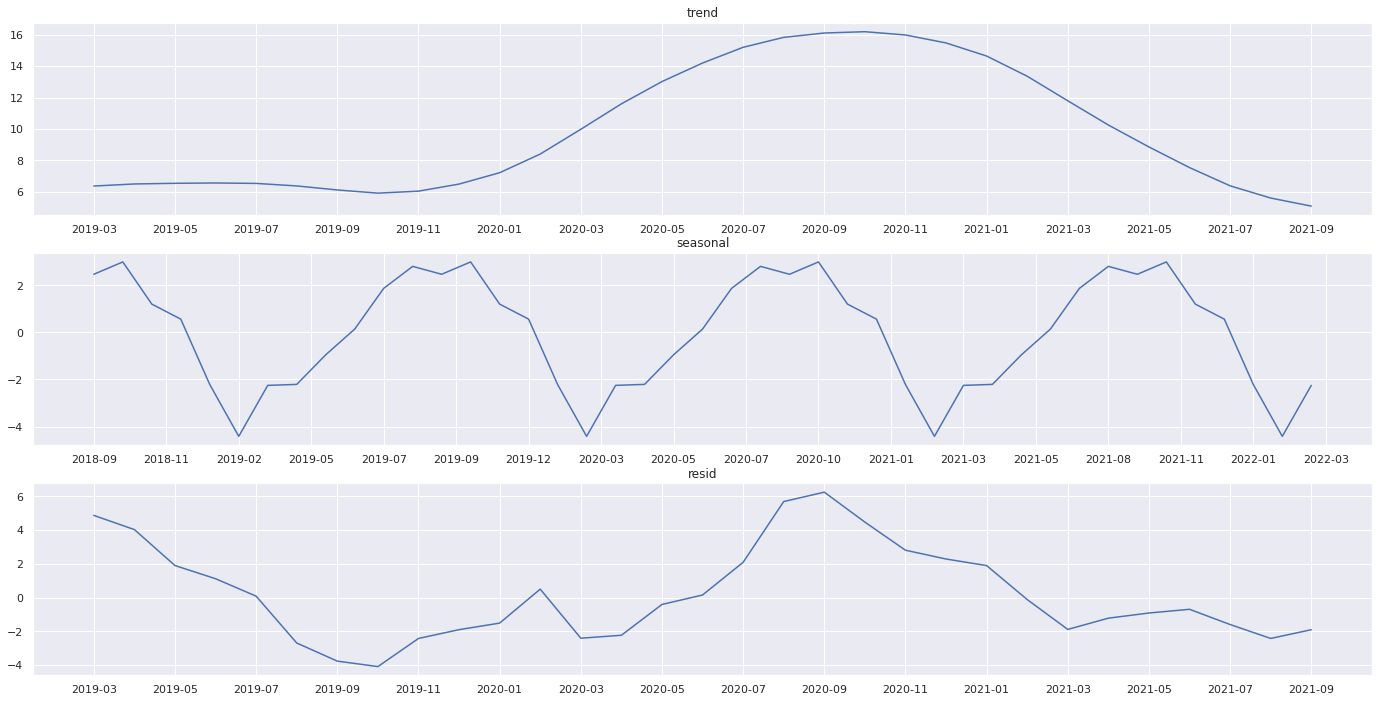

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose

#noise_test_summary_date.set_index('Date', inplace=True)

series_test_de = series_test.copy()

list_trend = []
list_seasonal = []
list_residual = []
smooth = series_test_de[-1]['smoth_6']
# Take seasons as freq,
#decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", freq=90)
for i in range(len(series_test_de)):
    decompose_result_mult = seasonal_decompose(series_test_de[i]['smoth_6'], model="additive", freq= 12)
    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    residual = decompose_result_mult.resid
    list_trend.append(trend)
    list_seasonal.append(seasonal)
    list_residual.append(residual)
    series_test_de[i]['smoth_6'] = series_test_de[i]['smoth_6'] - seasonal
    
    

decompose_df = series_test_de[i]['smoth_6'].to_frame()
decompose_df['origin'] = series[-1]['Noise_Complaint_Index'] 
decompose_df['smooth'] = smooth
decompose_df['trend'] =  decompose_result_mult.trend
decompose_df['seasonal'] =  decompose_result_mult.seasonal
decompose_df['resid'] =  decompose_result_mult.resid    
decompose_df = decompose_df.drop(columns = ['smoth_6']).reset_index()
decompose_df

date_series = ['trend','seasonal','resid']

import matplotlib.ticker as ticker
fig, axs = plt.subplots(3,figsize=(24,12))
#fig.suptitle('Series')

for i in range(len(date_series)):
        a = date_series[i]
        axs[i].plot(decompose_df.Category_by, decompose_df[a])
        axs[i].set_title(a)
        #plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=30)
        # plt.setp(axs[i, j].get_xaxis().get_major_ticks(), pad =5)
        #axs[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
        axs[i].xaxis.set_major_locator(ticker.MaxNLocator(20))
        #axs[i].set_ylim(0,40)
        
plt.show()

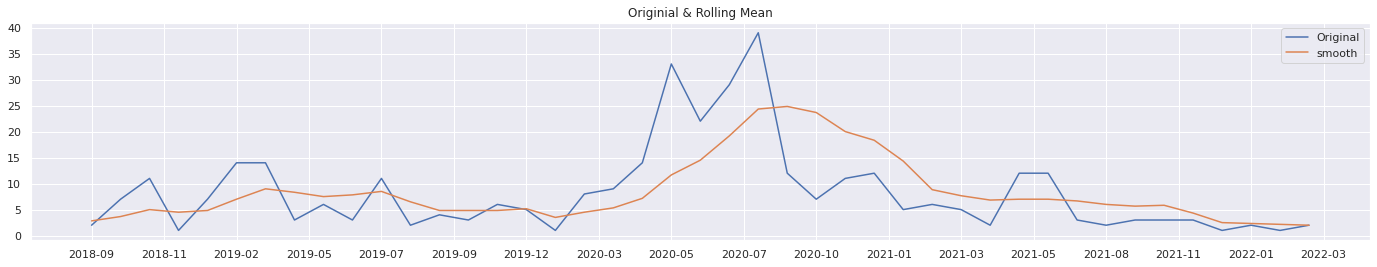

In [175]:
date_series = ['trend']

fig, axs = plt.subplots(1,figsize=(24,4))
origin = axs.plot(series[-1]['Noise_Complaint_Index'],label='Original')
smooth = axs.plot(series[-1]['smoth_6'],label='smooth')
axs.xaxis.set_major_locator(ticker.MaxNLocator(20))
plt.legend(loc='best')
plt.title('Originial & Rolling Mean')
plt.show(block=False)

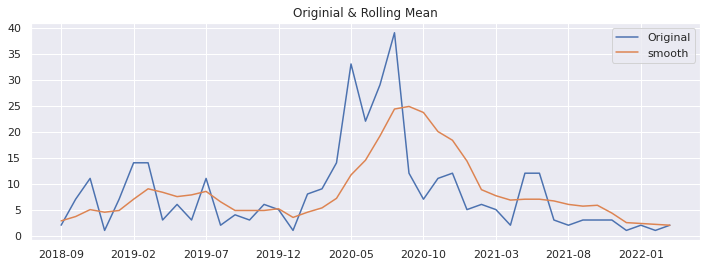

In [176]:
fig, axs = plt.subplots(1,figsize=(12,4))
origin = axs.plot(series[-1]['Noise_Complaint_Index'],label='Original')
smooth = axs.plot(series[-1]['smoth_6'],label='smooth')
axs.xaxis.set_major_locator(ticker.MaxNLocator(20))
plt.legend(loc='best')
plt.title('Originial & Rolling Mean')
axs.xaxis.set_major_locator(ticker.MaxNLocator(10))
plt.show(block=False)

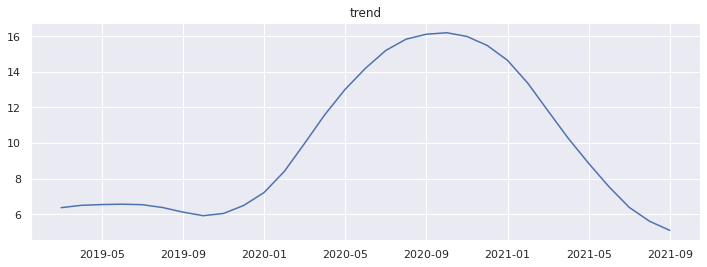

In [177]:
date_series = ['trend']

import matplotlib.ticker as ticker
fig, axs = plt.subplots(1,figsize=(12,4))
#fig.suptitle('Series')

for i in range(len(date_series)):
        a = date_series[i]
        axs.plot(decompose_df.Category_by, decompose_df[a])
        axs.set_title(a)
        #plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=30)
        # plt.setp(axs[i, j].get_xaxis().get_major_ticks(), pad =5)
        #axs[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
        axs.xaxis.set_major_locator(ticker.MaxNLocator(10))
        #axs[i].set_ylim(0,40)
        
plt.show()

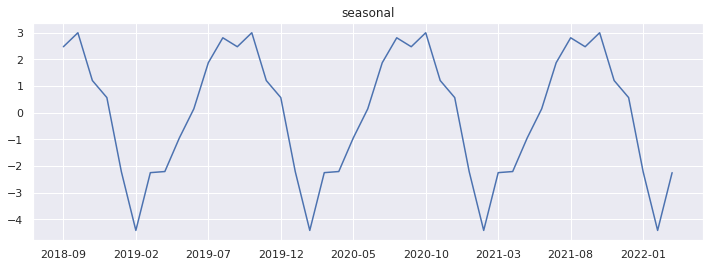

In [178]:
date_series = ['seasonal']

import matplotlib.ticker as ticker
fig, axs = plt.subplots(1,figsize=(12,4))
#fig.suptitle('Series')

for i in range(len(date_series)):
        a = date_series[i]
        axs.plot(decompose_df.Category_by, decompose_df[a])
        axs.set_title(a)
        #plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=30)
        # plt.setp(axs[i, j].get_xaxis().get_major_ticks(), pad =5)
        #axs[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
        axs.xaxis.set_major_locator(ticker.MaxNLocator(10))
        #axs[i].set_ylim(0,40)
        
plt.show()

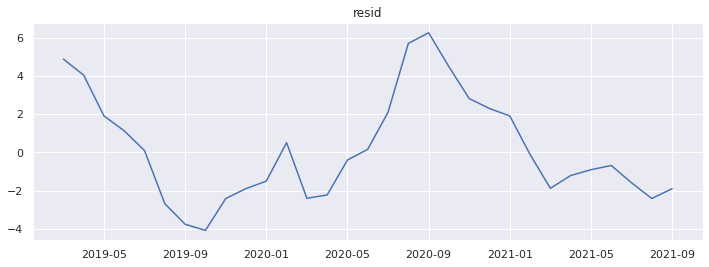

In [179]:
date_series = ['resid']

import matplotlib.ticker as ticker
fig, axs = plt.subplots(1,figsize=(12,4))
#fig.suptitle('Series')

for i in range(len(date_series)):
        a = date_series[i]
        axs.plot(decompose_df.Category_by, decompose_df[a])
        axs.set_title(a)
        #plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=30)
        # plt.setp(axs[i, j].get_xaxis().get_major_ticks(), pad =5)
        #axs[i].xaxis.set_major_locator(ticker.MultipleLocator(5))
        axs.xaxis.set_major_locator(ticker.MaxNLocator(10))
        #axs[i].set_ylim(0,40)
        
plt.show()

In [180]:
# min-max transform
for i in range(len(series_test_de)):
    #scaler = MinMaxScaler()
    #scaler = StandardScaler()
    series_test_de[i] = StandardScaler().fit_transform(series_test_de[i])
    series_test_de[i] = series_test_de[i].reshape(len(series_test_de[i]))


In [181]:
# Run KMeans and plot the results 
def get_kmeans_results(data, max_clusters=10, metric='euclidean', seed=23):
    """
    Runs KMeans n times (according to max_cluster range)

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    
    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=-1, max_iter=10, random_state=seed)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, kmeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

    fig,axs =  plt.subplots(1,figsize=(10,4))

    axs.plot(clusters_range[1:], silhouette, 'bx-')
    axs.axvline(3,color='r', ls="--", lw=1,) 
    
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');
    print(silhouette)

In [182]:
%%time

# Run the algorithm using DTW algorithm 
#get_kmeans_results(data=series_test_de, max_clusters=10, metric='dtw', seed=SEED)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 47.2 µs


In [183]:
# Visualization for obtained clusters   
def plot_clusters(data, cluster_model, dim_red_algo):
    """
    Plots clusters obtained by clustering model 

    data: pd.DataFrame or np.array
        Time Series Data
    cluster_model: Class
        Clustering algorithm 
    dim_red_algo: Class
        Dimensionality reduction algorithm (e.g. TSNE/PCA/MDS...) 
    Returns:
    -------
    None
    """
    cluster_labels = cluster_model.fit_predict(data)
    centroids = cluster_model.cluster_centers_
    u_labels = np.unique(cluster_labels)
    
    # Centroids Visualization
    plt.figure(figsize=(16, 5))
    plt.scatter(centroids[:, 0] , centroids[:, 1] , s=150, color='r', marker="x")
    
    # Downsize the data into 2D
    if data.shape[1] > 2:
        data_2d = dim_red_algo.fit_transform(data)
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label,cmap = plt.get_cmap('plasma', 3).colors)
    else:
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label,cmap = plt.get_cmap('plasma', 3).colors)

    plt.title('Clustered Data')
    plt.xlabel("Feature space for the 1st feature")
    plt.ylabel("Feature space for the 2nd feature")
    plt.grid(True)
    plt.legend(title='Cluster Labels');

CPU times: user 10.6 s, sys: 2.47 s, total: 13.1 s
Wall time: 4.95 s


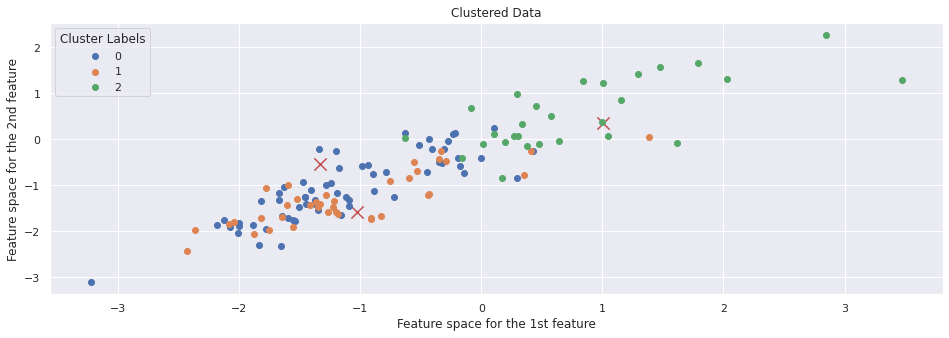

In [184]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=np.array(series_test_de),
              cluster_model=model,
              dim_red_algo=TSNE(n_components=3, init='pca', random_state=SEED))

  0%|          | 0/10 [00:00<?, ?it/s]

[0.39703794619302935, 0.3845105989031872, 0.3824810355145516, 0.3796993737230555, 0.35322181245913375, 0.34574785359658355, 0.34297242764947417, 0.3223103507675108, 0.32366945133847747]


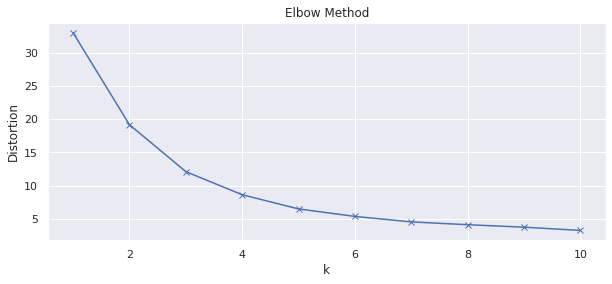

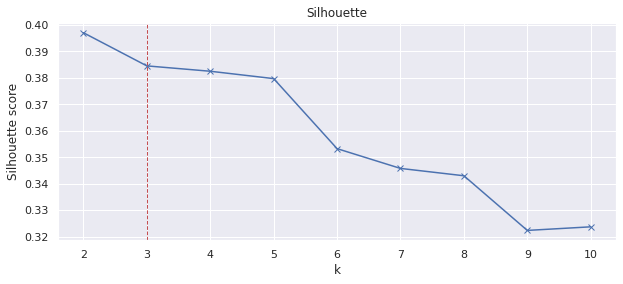

In [185]:
mds = MDS(n_components=2, n_init=4,max_iter=300, random_state=SEED)
data_mds = mds.fit_transform(series_test_de) 

get_kmeans_results(data=data_mds, max_clusters=10, metric='dtw', seed=SEED)

CPU times: user 975 ms, sys: 617 ms, total: 1.59 s
Wall time: 1.07 s


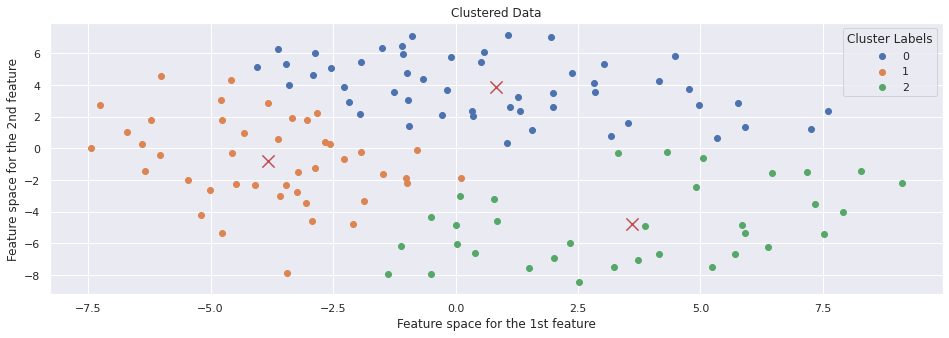

In [186]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=np.array(data_mds),
              cluster_model=model,
              dim_red_algo=TSNE(n_components=3, init='pca', random_state=SEED))

In [187]:
#cluster_count = math.ceil(math.sqrt(len(date_service_series))) 
cluster_count = 3
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw",random_state=SEED)

labels = km.fit_predict(data_mds)

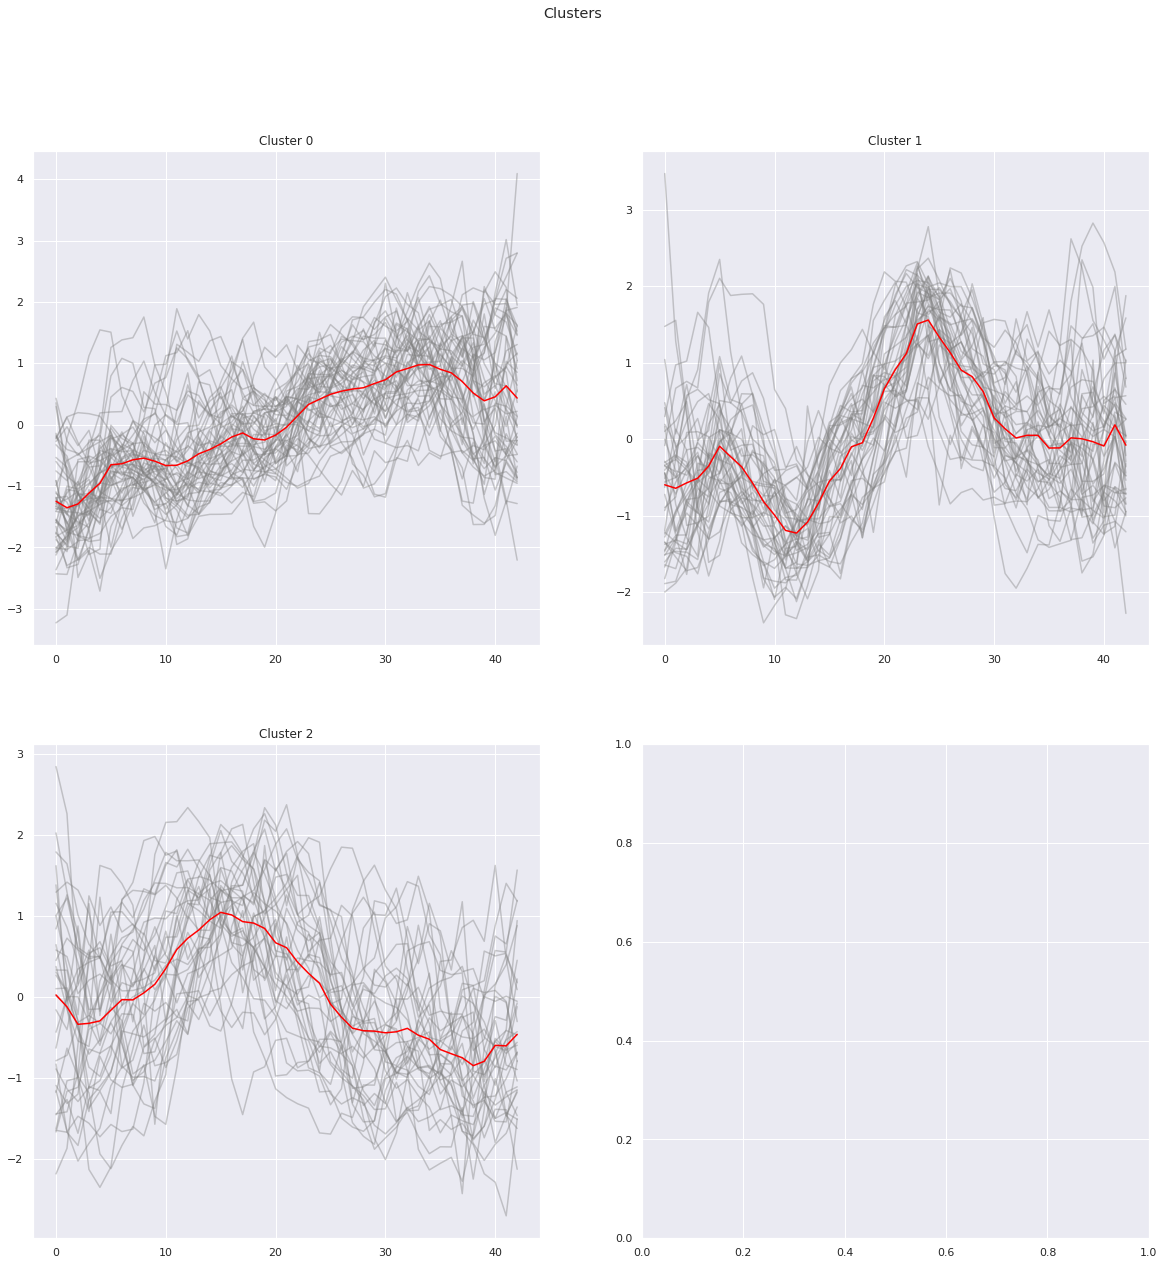

In [188]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(2,2,figsize=(20,20))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(series_test_de[i],c="gray",alpha=0.4)
                cluster.append(series_test_de[i])
                
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
        
    axs[row_i, column_j].set_title("Cluster " + str(row_i*2+column_j)) 
    column_j+=1
    if column_j%2 == 0:
        row_i+=1
        column_j=0
        
plt.show()

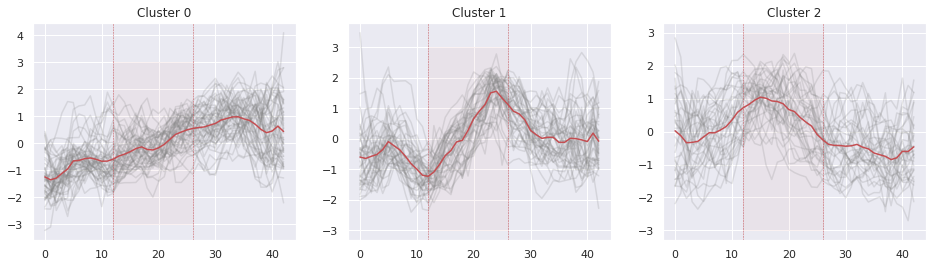

In [189]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(1,3,figsize=(16,4))
#fig.suptitle('Clusters')
row_i=0
column_j=0
start_week = 12
end_week = 26

y = range(-3,4)
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i].plot(series_test_de[i],c="gray",alpha=0.2)
                cluster.append(series_test_de[i])
                
    if len(cluster) > 0:
        axs[row_i].plot(np.average(np.vstack(cluster),axis=0),c="r",alpha = 1,lw =1.5)
    axs[row_i].axvline(start_week,color='r', ls="--", lw=0.5,) 
    axs[row_i].axvline(end_week,color='r', ls="--", lw=0.5,) 
    axs[row_i].fill_betweenx(y,start_week,end_week, alpha=0.05, color = 'r')
    axs[row_i].set_title("Cluster " + str(row_i)) 
    row_i+=1

#start_week = 12
#graph.axhline(start_week,color='r', ls="--", lw=2,)
    
plt.show()

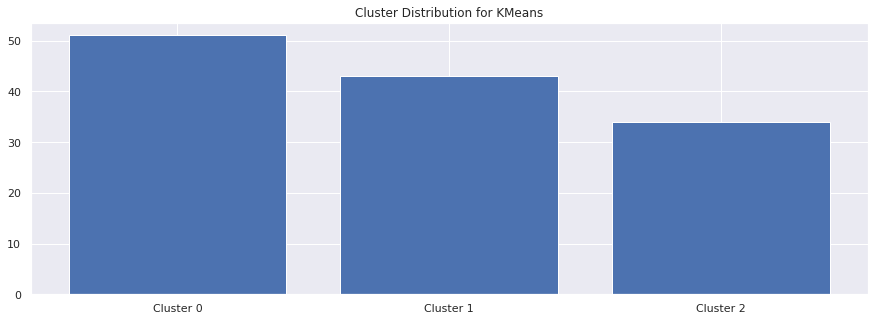

In [190]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [191]:
label_df = pd.DataFrame(data=labels).rename(columns={0: "cluster"})
label_df_year_month = label_df.copy()

In [192]:
lsoa_df = pd.DataFrame(data=noise_test_true_summary_lsoa_time.LSOA_2011_Name.unique()).rename(columns={0: "LSOA"}) 

In [193]:
label_df = label_df.merge(lsoa_df, left_index=True, right_index=True)

lsoa_daily_label_gdf = lsoa_gdf.merge(label_df, left_on = 'LSOA11NM', right_on = 'LSOA' )[['LSOA11CD','LSOA11NM','cluster','geometry']]

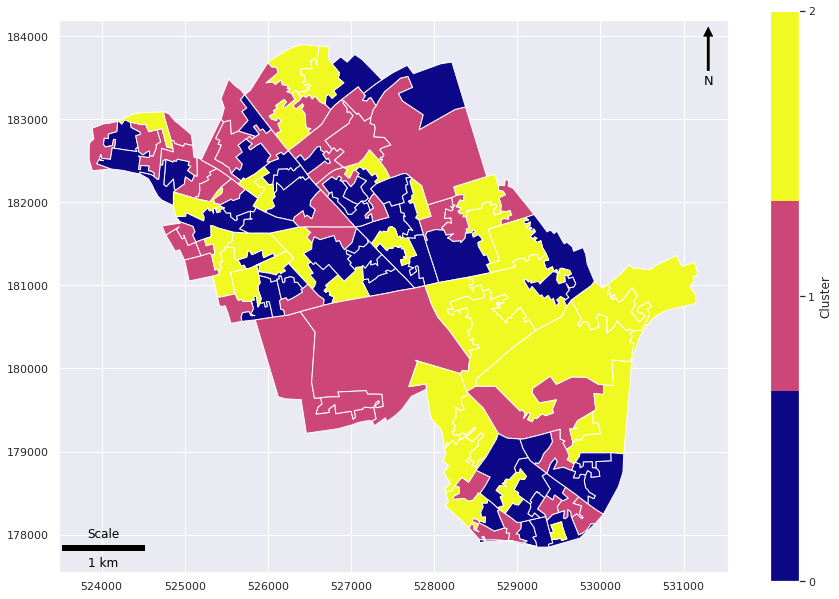

In [194]:
import matplotlib.pyplot as plt
import matplotlib as mpl


fig, ax = plt.subplots(1, 1,figsize=(15,15))

lsoa_daily_label_gdf.plot(column='cluster', ax=ax,  cmap = plt.get_cmap('plasma', 3), legend=True,legend_kwds={'label': "Cluster",'ticks': np.arange(0, 3),'shrink':0.7,'orientation': "vertical"});
x, y, arrow_length = 0.97, 0.99, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=4, headwidth=12),
            ha='center', va='center', fontsize=13,color='black',
            xycoords=ax.transAxes)

#scalebar = ScaleBar(1) # 1 pixel = 1 meter

scale = ScaleBar(
    dx=1, label='Scale',  location=('lower left'),
    color='black', box_color='none',
    box_alpha=0.8  # Slightly transparent box
)
ax.add_artist(scale)

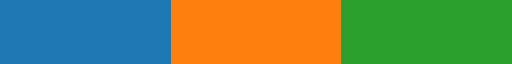

In [139]:
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['tab:blue','tab:orange','tab:green'])
cmap

In [335]:
cmap = plt.get_cmap('plasma', 3)
cmap.colors

array([[0.050383, 0.029803, 0.527975, 1.      ],
       [0.798216, 0.280197, 0.469538, 1.      ],
       [0.940015, 0.975158, 0.131326, 1.      ]])

In [336]:
lsoa_daily_label_gdf

LSOA11CD          LSOA11NM cluster  \
0    E01004646  Westminster 002A       2   
1    E01004647  Westminster 001A       0   
2    E01004648  Westminster 002B       1   
3    E01004649  Westminster 001B       2   
4    E01004650  Westminster 002C       2   
..         ...               ...     ...   
123  E01033604  Westminster 009J       0   
124  E01033605  Westminster 009K       0   
125  E01033606  Westminster 014F       1   
126  E01033607  Westminster 014G       2   
127  E01033608  Westminster 007G       2   

                                              geometry  
0    POLYGON ((526614.987 183877.891, 526587.256 18...  
1    POLYGON ((527129.958 183718.538, 527260.358 18...  
2    POLYGON ((525997.350 183674.612, 526051.000 18...  
3    POLYGON ((526773.508 183661.194, 526862.993 18...  
4    POLYGON ((526302.269 183161.213, 526338.035 18...  
..                                                 ...  
123  POLYGON ((526962.196 181855.934, 527006.358 18...  
124  POLYGON ((526888.382 182291.621, 526866.264 18...  
125  POLYGON ((525237.341 181558.428, 525257.777 18...  
126  POLYGON ((525582.183 181638.547, 525565.190 18...  
127  POLYGON ((525895.501 182285.312, 525835.265 18...  

[128 rows x 4 columns]

In [337]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


In [338]:
lsoa_daily_label_gdf.cluster = lsoa_daily_label_gdf.cluster.astype('string')
lsoa_daily_label_gdf.head()

lsoa_daily_label_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 128 entries, 0 to 127
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LSOA11CD  128 non-null    object  
 1   LSOA11NM  128 non-null    object  
 2   cluster   128 non-null    string  
 3   geometry  128 non-null    geometry
dtypes: geometry(1), object(2), string(1)
memory usage: 5.0+ KB


In [339]:
# adapted from this tutorial: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(df_cluster_centroid):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]

    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend(loc = 'upper left')
    plt.show()

In [340]:
s_2.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Noise_Complaint_Index', 'Time', 'Received_Date', 'Financial_Year',
       'Service_Request', 'Service_Request_Group_Type',
       'Service_Request_Group_Sub_Type', 'Service_Request_1', 'Address_Key_',
       'Type_of_Address', 'Output_Area_Code_(2011)', 'MSOA_2011_Code',
       'MSOA_2011_Name', 'LSOA_2011_Code', 'LSOA_2011_Name', 'Ward_Name',
       'Date', 'Days', 'Year_Month', 'Year_Week', 'Year', 'Month', 'Weekday',
       'Season', 'days', 'is_repeat_2days', 'is_repeat_7days',
       'is_repeat_30days', '2days_count', '7days_count', '30days_count',
       'bef_todays_count', 'bef_yesterday_count', 'bef_2_7days_count',
       'bef_7_30days_count', 'bef_30_365days_count', 'bef_365_begindays_count',
       'is_repeat_2_7days', 'is_repeat_7_30days', 'top5_lsoa_count',
       'LSOA_Count', 'top5_address_count', 'Adress_Count', 'LSOA11CD',
       'cluster0', 'cluster1', 'cluster2', 'is_high_hour', 'is_high_weekday',
      

In [341]:
'year_month_cl_0', 'year_month_cl_1', 'year_month_cl_2'

('year_month_cl_0', 'year_month_cl_1', 'year_month_cl_2')

In [342]:
explained_cluster = pd.read_csv('2_explained_cluster.csv').drop('cluster',axis = 1)
explained_cluster = explained_cluster.merge(lsoa_daily_label_gdf[['LSOA11CD','cluster']],on ='LSOA11CD')

In [343]:
rs = explained_cluster.copy()

In [344]:
explained_cluster

Unnamed: 0  Median Income  Deprivation_Income  Deprivation_employment  \
0             0          50018                   9                       9   
1             1          50120                   6                       5   
2             2          53035                   8                       8   
3             3          52621                   9                      10   
4             4          58536                  10                      10   
..          ...            ...                 ...                     ...   
123         123          34558                   2                       2   
124         124          30861                   1                       1   
125         125          51257                   8                       7   
126         126          53459                   6                       4   
127         127          54892                   7                       5   

     Deprivation_crime  Deprivation_barriers  Deprivation_LivingEnvironment  \
0                    3                    10                              1   
1                    6                    10                              2   
2                    7                     9                              5   
3                    9                     9                              6   
4                    9                    10                              4   
..                 ...                   ...                            ...   
123                  1                     7                              1   
124                  3                     8                              3   
125                  7                     8                              3   
126                  1                     8                              1   
127                  8                     8                              2   

     Deprivation_health  Deprivation_edu  Ethnic_uk_perc  ...  \
0                    10                4            46.8  ...   
1                    10                5            49.1  ...   
2                    10                7            47.3  ...   
3                    10                7            41.1  ...   
4                    10               10            42.0  ...   
..                  ...              ...             ...  ...   
123                   5                5            36.3  ...   
124                   2                3            46.0  ...   
125                   5                8            40.3  ...   
126                   6               10            56.3  ...   
127                   9                7            44.8  ...   

     POI_Transport_Sq_Km  Building Site  Commercial Premises  \
0                     14       0.180982             0.073620   
1                     15       0.089245             0.130435   
2                     18       0.097674             0.299225   
3                     36       0.102857             0.091429   
4                     11       0.133903             0.017094   
..                   ...            ...                  ...   
123                  109       0.051282             0.188034   
124                   40       0.017897             0.052573   
125                   73       0.053672             0.056497   
126                   11       0.113684             0.082105   
127                   18       0.066059             0.088838   

     Email Complaint (1d)  Non Noise Complaint (45m)  Property Alarm  \
0                0.000000                   0.003067        0.082822   
1                0.002288                   0.004577        0.045767   
2                0.000000                   0.001550        0.024806   
3                0.000000                   0.011429        0.062857   
4                0.000000                   0.005698        0.079772   
..                    ...                        ...             ...   
123              0.000000                   0.002849        0.125

In [345]:
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler

In [346]:
explained_cluster_mean = explained_cluster.groupby('cluster').mean()
explained_cluster_mean

Unnamed: 0  Median Income  Deprivation_Income  \
cluster                                                  
0         65.960784   44956.431373            5.235294   
1         63.093023   46010.813953            5.511628   
2         60.323529   50793.470588            7.058824   

         Deprivation_employment  Deprivation_crime  Deprivation_barriers  \
cluster                                                                    
0                      5.254902           5.647059              8.039216   
1                      5.441860           6.209302              8.348837   
2                      6.705882           6.647059              8.558824   

         Deprivation_LivingEnvironment  Deprivation_health  Deprivation_edu  \
cluster                                                                       
0                             2.333333            6.254902         6.745098   
1                             2.906977            6.395349         6.534884   
2                             2.176471            7.647059         7.705882   

         Ethnic_uk_perc  ...  POI_Retail_Sq_Km  \
cluster                  ...                     
0             46.409804  ...        193.098039   
1             47.369767  ...         93.186047   
2             46.276471  ...        185.852941   

         POI_Sport_and_Entertainment_Sq_Km  POI_Transport_Sq_Km  \
cluster                                                           
0                                33.568627            50.843137   
1                                18.976744            39.116279   
2                                39.647059            39.852941   

         Building Site  Commercial Premises  Email Complaint (1d)  \
cluster                                                             
0             0.080091             0.119647              0.000594   
1             0.090225             0.097555              0.000604   
2             0.111735             0.109939              0.000663   

         Non Noise Complaint (45m)  Property Alarm  Residential Premises  \
cluster                                                                    
0                         0.001849        0.041281              0.595522   
1                         0.002813        0.035295              0.648652   
2                         0.002488        0.062312              0.505583   

           Street  
cluster            
0        0.161016  
1        0.124855  
2        0.207281  

[3 rows x 36 columns]

In [347]:
explained_cluster_mean.columns

Index(['Unnamed: 0', 'Median Income', 'Deprivation_Income',
       'Deprivation_employment', 'Deprivation_crime', 'Deprivation_barriers',
       'Deprivation_LivingEnvironment', 'Deprivation_health',
       'Deprivation_edu', 'Ethnic_uk_perc', 'Ethnic_europe_perc',
       'Ethnic_rest_of_world_perc', 'Residential_mobility_1819_Mean',
       'housingprice_mean_18', 'Mid_2020_pop_per_Sq_KM',
       'Building_area_per_Sq_M', 'Building_volumne_per_Sq_M',
       'Road_length_per_Sq_KM', 'Airbnb_Sq_Km', 'POI_Sq_Km',
       'POI_Accommodation_Eating_and_Drinking_Sq_Km', 'POI_Attractions_Sq_Km',
       'POI_Commercial_Services_Sq_Km', 'POI_Education_and_Health_Sq_Km',
       'POI_Manufacturing_and_Production_Sq_Km',
       'POI_Public_Infrastructure_Sq_Km', 'POI_Retail_Sq_Km',
       'POI_Sport_and_Entertainment_Sq_Km', 'POI_Transport_Sq_Km',
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)',
       'Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises',
    

In [348]:
Complaint_type = ['Building Site', 'Commercial Premises', 'Email Complaint (1d)',
       'Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises',
       'Street']

In [349]:
# Rescale the columns using the MinMaxScaler set up in the Preamble

#for c in ["food_drink1","art_culture1","median_price","median_reviews_per_month","listing_density"]:
    #cldf[c] = pts.fit_transform(cldf[c].values.reshape(-1,1))
for c in Complaint_type:
    rs[c] = RobustScaler().fit_transform(rs[c].values.reshape(-1,1))
#for c in built_columns:
    #rs[c] = MinMaxScaler().fit_transform(rs[c].values.reshape(-1,1))

In [350]:
rs_mean = rs.groupby('cluster').mean()
rs_mean

Unnamed: 0  Median Income  Deprivation_Income  \
cluster                                                  
0         65.960784   44956.431373            5.235294   
1         63.093023   46010.813953            5.511628   
2         60.323529   50793.470588            7.058824   

         Deprivation_employment  Deprivation_crime  Deprivation_barriers  \
cluster                                                                    
0                      5.254902           5.647059              8.039216   
1                      5.441860           6.209302              8.348837   
2                      6.705882           6.647059              8.558824   

         Deprivation_LivingEnvironment  Deprivation_health  Deprivation_edu  \
cluster                                                                       
0                             2.333333            6.254902         6.745098   
1                             2.906977            6.395349         6.534884   
2                             2.176471            7.647059         7.705882   

         Ethnic_uk_perc  ...  POI_Retail_Sq_Km  \
cluster                  ...                     
0             46.409804  ...        193.098039   
1             47.369767  ...         93.186047   
2             46.276471  ...        185.852941   

         POI_Sport_and_Entertainment_Sq_Km  POI_Transport_Sq_Km  \
cluster                                                           
0                                33.568627            50.843137   
1                                18.976744            39.116279   
2                                39.647059            39.852941   

         Building Site  Commercial Premises  Email Complaint (1d)  \
cluster                                                             
0             0.019839             0.210692              0.599974   
1             0.158893             0.033321              0.609868   
2             0.454063             0.132747              0.668984   

         Non Noise Complaint (45m)  Property Alarm  Residential Premises  \
cluster                                                                    
0                         0.137215        0.041542             -0.060613   
1                         0.401126       -0.102774              0.137127   
2                         0.312215        0.548585             -0.395343   

           Street  
cluster            
0        0.218565  
1       -0.146613  
2        0.685779  

[3 rows x 36 columns]

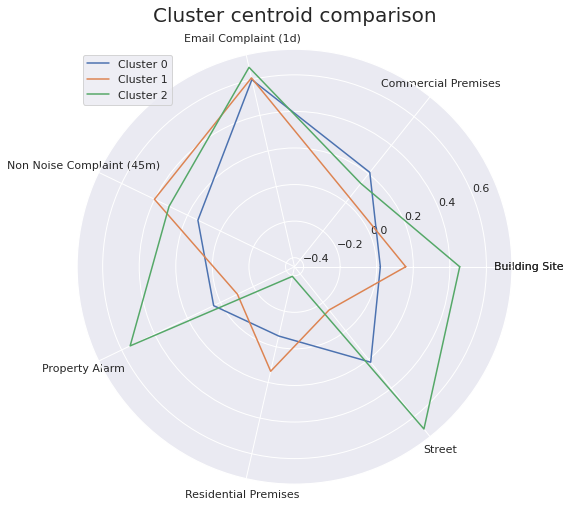

In [351]:
radar_plot_cluster_centroids(rs_mean[Complaint_type])

In [352]:

POI_type = ['POI_Accommodation_Eating_and_Drinking_Sq_Km', 'POI_Attractions_Sq_Km',
       'POI_Commercial_Services_Sq_Km', 'POI_Education_and_Health_Sq_Km',
       'POI_Manufacturing_and_Production_Sq_Km',
       'POI_Public_Infrastructure_Sq_Km', 'POI_Retail_Sq_Km',
       'POI_Sport_and_Entertainment_Sq_Km', 'POI_Transport_Sq_Km',]

In [353]:
# Rescale the columns using the MinMaxScaler set up in the Preamble

#for c in ["food_drink1","art_culture1","median_price","median_reviews_per_month","listing_density"]:
    #cldf[c] = pts.fit_transform(cldf[c].values.reshape(-1,1))
for c in POI_type:
    rs[c] = RobustScaler().fit_transform(rs[c].values.reshape(-1,1))
#for c in built_columns:
    #rs[c] = MinMaxScaler().fit_transform(rs[c].values.reshape(-1,1))

In [354]:
rs_mean = rs.groupby('cluster').mean()
rs_mean

Unnamed: 0  Median Income  Deprivation_Income  \
cluster                                                  
0         65.960784   44956.431373            5.235294   
1         63.093023   46010.813953            5.511628   
2         60.323529   50793.470588            7.058824   

         Deprivation_employment  Deprivation_crime  Deprivation_barriers  \
cluster                                                                    
0                      5.254902           5.647059              8.039216   
1                      5.441860           6.209302              8.348837   
2                      6.705882           6.647059              8.558824   

         Deprivation_LivingEnvironment  Deprivation_health  Deprivation_edu  \
cluster                                                                       
0                             2.333333            6.254902         6.745098   
1                             2.906977            6.395349         6.534884   
2                             2.176471            7.647059         7.705882   

         Ethnic_uk_perc  ...  POI_Retail_Sq_Km  \
cluster                  ...                     
0             46.409804  ...          0.731088   
1             47.369767  ...          0.093691   
2             46.276471  ...          0.684867   

         POI_Sport_and_Entertainment_Sq_Km  POI_Transport_Sq_Km  \
cluster                                                           
0                                 0.513756             0.374985   
1                                 0.061294             0.097427   
2                                 0.702234             0.114863   

         Building Site  Commercial Premises  Email Complaint (1d)  \
cluster                                                             
0             0.019839             0.210692              0.599974   
1             0.158893             0.033321              0.609868   
2             0.454063             0.132747              0.668984   

         Non Noise Complaint (45m)  Property Alarm  Residential Premises  \
cluster                                                                    
0                         0.137215        0.041542             -0.060613   
1                         0.401126       -0.102774              0.137127   
2                         0.312215        0.548585             -0.395343   

           Street  
cluster            
0        0.218565  
1       -0.146613  
2        0.685779  

[3 rows x 36 columns]

In [355]:
# adapted from this tutorial: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(df_cluster_centroid):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]

    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend(loc = 'upper right')
    plt.show()

In [356]:
rs_mean_small = rs_mean[POI_type]

rs_mean_small.columns = ['POI_Eating & Drinking', 'POI_Attractions',
       'POI_Commercial_Services', 'POI_Education & Health',
       'POI_Manufacturing',
       'POI_Public_Infrastructure', 'POI_Retail',
       'POI_Sport & Entertainment', 'POI_Transport',]

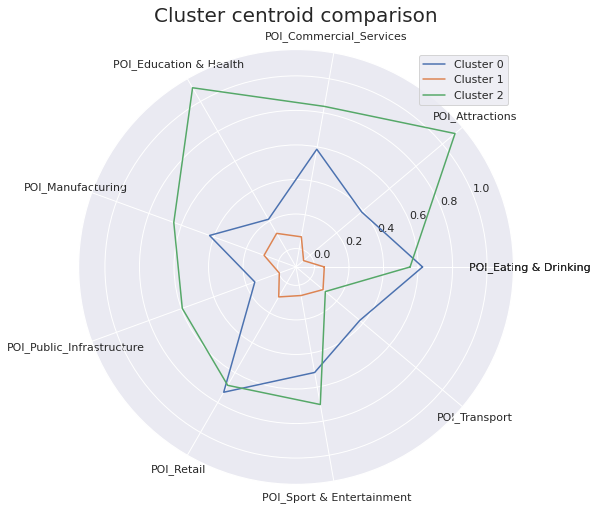

In [357]:
radar_plot_cluster_centroids(rs_mean_small)

In [358]:
rs = explained_cluster.copy().drop(['Unnamed: 0','LSOA11CD'],axis =1)

In [359]:
rs.columns

Index(['Median Income', 'Deprivation_Income', 'Deprivation_employment',
       'Deprivation_crime', 'Deprivation_barriers',
       'Deprivation_LivingEnvironment', 'Deprivation_health',
       'Deprivation_edu', 'Ethnic_uk_perc', 'Ethnic_europe_perc',
       'Ethnic_rest_of_world_perc', 'Residential_mobility_1819_Mean',
       'housingprice_mean_18', 'Mid_2020_pop_per_Sq_KM',
       'Building_area_per_Sq_M', 'Building_volumne_per_Sq_M',
       'Road_length_per_Sq_KM', 'Airbnb_Sq_Km', 'POI_Sq_Km',
       'POI_Accommodation_Eating_and_Drinking_Sq_Km', 'POI_Attractions_Sq_Km',
       'POI_Commercial_Services_Sq_Km', 'POI_Education_and_Health_Sq_Km',
       'POI_Manufacturing_and_Production_Sq_Km',
       'POI_Public_Infrastructure_Sq_Km', 'POI_Retail_Sq_Km',
       'POI_Sport_and_Entertainment_Sq_Km', 'POI_Transport_Sq_Km',
       'Building Site', 'Commercial Premises', 'Email Complaint (1d)',
       'Non Noise Complaint (45m)', 'Property Alarm', 'Residential Premises',
       'Street', '

In [360]:
social_columns =['Median Income','Residential_mobility_1819_Mean','housingprice_mean_18','Mid_2020_pop_per_Sq_KM',]
#social_columns =['Mid_2020_pop_per_Sq_KM','Airbnb_Sq_Km', 'POI_Sq_Km']

In [361]:
# Rescale the columns using the MinMaxScaler set up in the Preamble

#for c in ["food_drink1","art_culture1","median_price","median_reviews_per_month","listing_density"]:
    #cldf[c] = pts.fit_transform(cldf[c].values.reshape(-1,1))
for c in social_columns:
    rs[c] = RobustScaler().fit_transform(rs[c].values.reshape(-1,1))
#for c in social_columns:
    #rs[c] = MinMaxScaler().fit_transform(rs[c].values.reshape(-1,1))

In [362]:
rs_mean = rs.groupby('cluster').mean()
rs_mean

Median Income  Deprivation_Income  Deprivation_employment  \
cluster                                                              
0            -0.267486            5.235294                5.254902   
1            -0.200504            5.511628                5.441860   
2             0.103325            7.058824                6.705882   

         Deprivation_crime  Deprivation_barriers  \
cluster                                            
0                 5.647059              8.039216   
1                 6.209302              8.348837   
2                 6.647059              8.558824   

         Deprivation_LivingEnvironment  Deprivation_health  Deprivation_edu  \
cluster                                                                       
0                             2.333333            6.254902         6.745098   
1                             2.906977            6.395349         6.534884   
2                             2.176471            7.647059         7.705882   

         Ethnic_uk_perc  Ethnic_europe_perc  ...  POI_Retail_Sq_Km  \
cluster                                      ...                     
0             46.409804           23.411765  ...        193.098039   
1             47.369767           22.534884  ...         93.186047   
2             46.276471           24.173529  ...        185.852941   

         POI_Sport_and_Entertainment_Sq_Km  POI_Transport_Sq_Km  \
cluster                                                           
0                                33.568627            50.843137   
1                                18.976744            39.116279   
2                                39.647059            39.852941   

         Building Site  Commercial Premises  Email Complaint (1d)  \
cluster                                                             
0             0.080091             0.119647              0.000594   
1             0.090225             0.097555              0.000604   
2             0.111735             0.109939              0.000663   

         Non Noise Complaint (45m)  Property Alarm  Residential Premises  \
cluster                                                                    
0                         0.001849        0.041281              0.595522   
1                         0.002813        0.035295              0.648652   
2                         0.002488        0.062312              0.505583   

           Street  
cluster            
0        0.161016  
1        0.124855  
2        0.207281  

[3 rows x 35 columns]

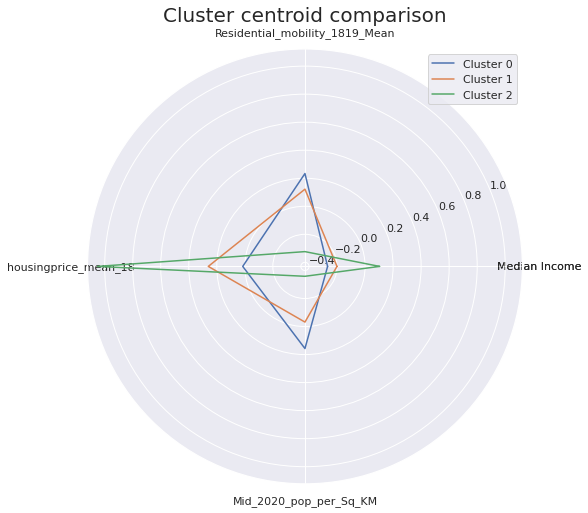

In [363]:

radar_plot_cluster_centroids(rs_mean[social_columns])

In [364]:
built_columns =['Building_area_per_Sq_M', 'Building_volumne_per_Sq_M','Road_length_per_Sq_KM','Airbnb_Sq_Km', 'POI_Sq_Km',]
#social_columns =['Mid_2020_pop_per_Sq_KM','Airbnb_Sq_Km', 'POI_Sq_Km']

In [365]:
# Rescale the columns using the MinMaxScaler set up in the Preamble

#for c in ["food_drink1","art_culture1","median_price","median_reviews_per_month","listing_density"]:
    #cldf[c] = pts.fit_transform(cldf[c].values.reshape(-1,1))
for c in built_columns:
    rs[c] = RobustScaler().fit_transform(rs[c].values.reshape(-1,1))
#for c in built_columns:
    #rs[c] = MinMaxScaler().fit_transform(rs[c].values.reshape(-1,1))

In [366]:
rs_mean = rs.groupby('cluster').mean()
rs_mean

Median Income  Deprivation_Income  Deprivation_employment  \
cluster                                                              
0            -0.267486            5.235294                5.254902   
1            -0.200504            5.511628                5.441860   
2             0.103325            7.058824                6.705882   

         Deprivation_crime  Deprivation_barriers  \
cluster                                            
0                 5.647059              8.039216   
1                 6.209302              8.348837   
2                 6.647059              8.558824   

         Deprivation_LivingEnvironment  Deprivation_health  Deprivation_edu  \
cluster                                                                       
0                             2.333333            6.254902         6.745098   
1                             2.906977            6.395349         6.534884   
2                             2.176471            7.647059         7.705882   

         Ethnic_uk_perc  Ethnic_europe_perc  ...  POI_Retail_Sq_Km  \
cluster                                      ...                     
0             46.409804           23.411765  ...        193.098039   
1             47.369767           22.534884  ...         93.186047   
2             46.276471           24.173529  ...        185.852941   

         POI_Sport_and_Entertainment_Sq_Km  POI_Transport_Sq_Km  \
cluster                                                           
0                                33.568627            50.843137   
1                                18.976744            39.116279   
2                                39.647059            39.852941   

         Building Site  Commercial Premises  Email Complaint (1d)  \
cluster                                                             
0             0.080091             0.119647              0.000594   
1             0.090225             0.097555              0.000604   
2             0.111735             0.109939              0.000663   

         Non Noise Complaint (45m)  Property Alarm  Residential Premises  \
cluster                                                                    
0                         0.001849        0.041281              0.595522   
1                         0.002813        0.035295              0.648652   
2                         0.002488        0.062312              0.505583   

           Street  
cluster            
0        0.161016  
1        0.124855  
2        0.207281  

[3 rows x 35 columns]

In [367]:
# adapted from this tutorial: https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca
def radar_plot_cluster_centroids(df_cluster_centroid):
    # parameters
    # df_cluster_centroid: a dataframe with rows representing a cluster centroid and columns representing variables
    
    # add an additional element to both categories and restaurants that’s identical to the first item
    # manually 'close' the line
    categories = df_cluster_centroid.columns.values.tolist()
    categories = [*categories, categories[0]]

    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
    
    plt.figure(figsize=(12, 8))
    plt.subplot(polar=True)
    for index, row in df_cluster_centroid.iterrows():
        centroid = row.tolist()
        centroid = [*centroid, centroid[0]]
        label = "Cluster {}".format(index)
        plt.plot(label_loc, centroid, label=label)
    plt.title('Cluster centroid comparison', size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend(loc = 'upper left')
    plt.show()

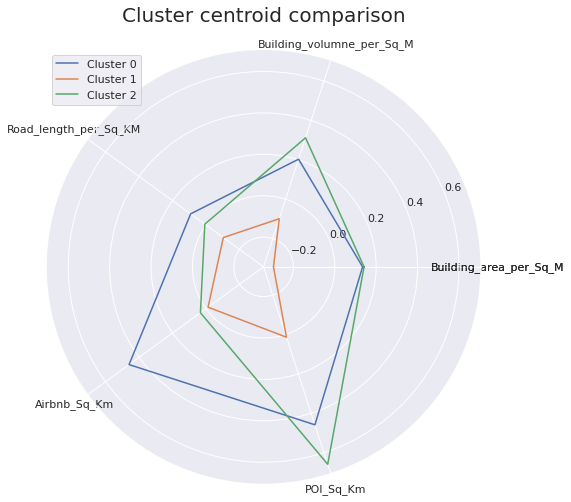

In [368]:

radar_plot_cluster_centroids(rs_mean[built_columns])

## 2.3.2 LSOA & Weekday_Smooth

In [207]:
noise_test_true['Category_by'] = noise_test_true['Weekday'] 

In [208]:
# 以24小时和lsoa进行分类汇总

# Summarize the complaints with lsoa, only 161 records, meaning that one lsoa has no records.

noise_test_true_summary_lsoa_time = noise_test_true.groupby(['LSOA_2011_Name','Category_by']).count()[['Noise_Complaint_Index']].reset_index()
noise_test_true_summary_lsoa_time  = noise_test_true_summary_lsoa_time.set_index(noise_test_true_summary_lsoa_time['Category_by'])
noise_test_true_summary_lsoa_time

LSOA_2011_Name  Category_by  Noise_Complaint_Index
Category_by                                                      
0            Westminster 001A            0                     62
1            Westminster 001A            1                     41
2            Westminster 001A            2                     54
3            Westminster 001A            3                     60
4            Westminster 001A            4                     54
...                       ...          ...                    ...
2            Westminster 024F            2                     60
3            Westminster 024F            3                     43
4            Westminster 024F            4                     41
5            Westminster 024F            5                     72
6            Westminster 024F            6                     65

[896 rows x 3 columns]

In [209]:
series = []
LSOA_name = noise_test_true_summary_lsoa_time.LSOA_2011_Name.unique()
for i in LSOA_name:
    df = noise_test_true_summary_lsoa_time.loc[noise_test_true_summary_lsoa_time.LSOA_2011_Name == i]

    series.append(df)

In [210]:
series_lengths = {len(serie) for serie in series}
print(series_lengths)


{7}


In [211]:
# Here find the longest series, the residential noise, with zero

max_len = max(series_lengths)
longest_series = None
for serie in series:
    if len(serie) == max_len:
        longest_serie = serie

In [212]:
problems_index = []

for i in range(len(series)):
    if len(series[i])!= max_len:
        problems_index.append(i)
        series[i] = series[i].reindex(longest_serie.index)


* rooling_mean
* interpolate
* fillna - bfill

In [213]:
for i in range(len(series)):
    # Use interpolation to fill values between dates
    series[i]['Noise_Complaint_Index'].interpolate(method ='linear', limit_direction ='forward', inplace=True)
    # Some stores probably were closed on 01-01-YYYYY, fill it by the value on the next day
    series[i]['Noise_Complaint_Index'].fillna(method ='bfill', inplace=True)
    series[i]['smoth_6'] = series[i]['Noise_Complaint_Index']
    series[i]['LSOA_2011_Name'] = series[i]['LSOA_2011_Name'].fillna(LSOA_name[i])
    series[i] = series[i].drop(['Category_by'], axis = 1)
    series[i] = series[i].dropna()

In [214]:
series_test = series
for i in range(len(series_test)):
    series_test[i] = series_test[i].drop(['LSOA_2011_Name','Noise_Complaint_Index'], axis = 1)
    series_test[i]['smoth_6'] = series_test[i]['smoth_6']

In [215]:
# min-max transform
for i in range(len(series_test)):
    #scaler = MinMaxScaler()
    #scaler = StandardScaler()
    series_test[i] = StandardScaler().fit_transform(series_test[i])
    series_test[i] = series_test[i].reshape(len(series_test[i]))

In [216]:
# Run KMeans and plot the results 
def get_kmeans_results(data, max_clusters=10, metric='euclidean', seed=23):
    """
    Runs KMeans n times (according to max_cluster range)

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    
    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=-1, max_iter=10, random_state=seed)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, kmeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');
    print(silhouette)

  0%|          | 0/10 [00:00<?, ?it/s]

[0.15622494226055492, 0.13679472886613836, 0.06431802571607023, 0.05826147248649992, 0.10606465204477644, 0.10796992548209428, 0.07039316146161823, 0.08532729898536463, 0.08158815642630635]
CPU times: user 18.7 s, sys: 21.3 s, total: 40 s
Wall time: 21 s


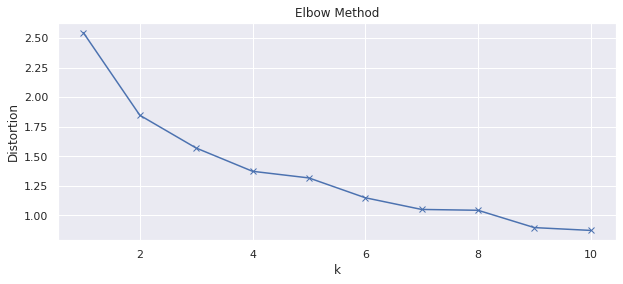

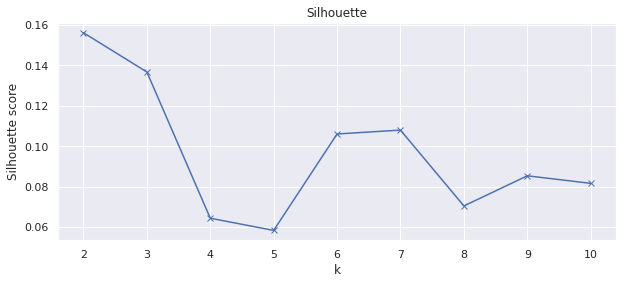

In [217]:
%%time

# Run the algorithm using DTW algorithm 
get_kmeans_results(data=series_test, max_clusters=10, metric='dtw', seed=SEED)

In [218]:
# Visualization for obtained clusters   
def plot_clusters(data, cluster_model, dim_red_algo):
    """
    Plots clusters obtained by clustering model 

    data: pd.DataFrame or np.array
        Time Series Data
    cluster_model: Class
        Clustering algorithm 
    dim_red_algo: Class
        Dimensionality reduction algorithm (e.g. TSNE/PCA/MDS...) 
    Returns:
    -------
    None
    """
    cluster_labels = cluster_model.fit_predict(data)
    centroids = cluster_model.cluster_centers_
    u_labels = np.unique(cluster_labels)
    
    # Centroids Visualization
    plt.figure(figsize=(16, 10))
    plt.scatter(centroids[:, 0] , centroids[:, 1] , s=150, color='r', marker="x")
    
    # Downsize the data into 2D
    if data.shape[1] > 2:
        data_2d = dim_red_algo.fit_transform(data)
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)
    else:
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)

    plt.title('Clustered Data')
    plt.xlabel("Feature space for the 1st feature")
    plt.ylabel("Feature space for the 2nd feature")
    plt.grid(True)
    plt.legend(title='Cluster Labels');

CPU times: user 8.94 s, sys: 1.15 s, total: 10.1 s
Wall time: 1.96 s


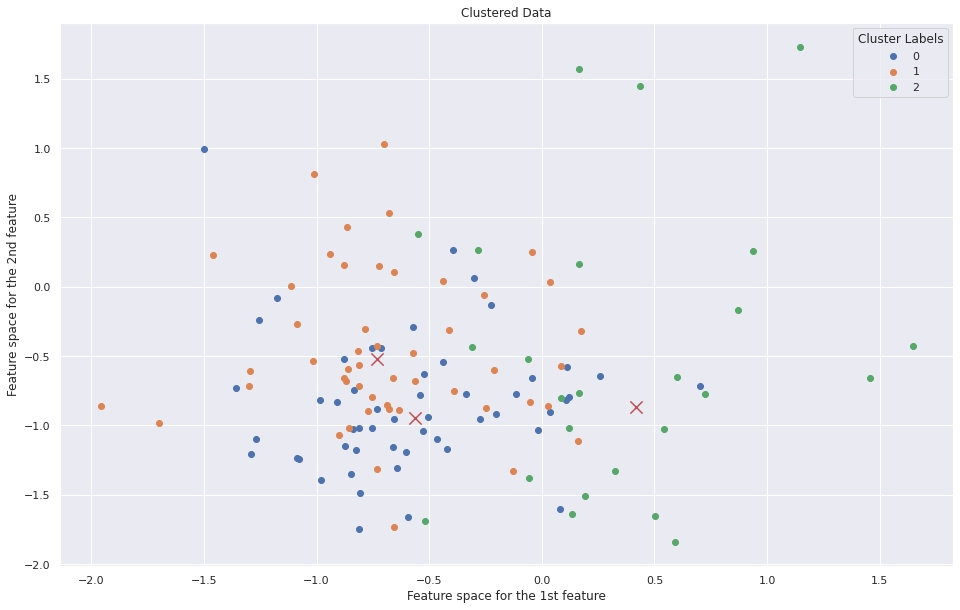

In [219]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=np.array(series_test),
              cluster_model=model,
              dim_red_algo=TSNE(n_components=3, init='pca', random_state=SEED))

  0%|          | 0/10 [00:00<?, ?it/s]

[0.3025226688726016, 0.32606806733712435, 0.3480398373488403, 0.33524058956430697, 0.3240676649183716, 0.3235493654480091, 0.32697101894485314, 0.3379981713124855, 0.3302601807647364]


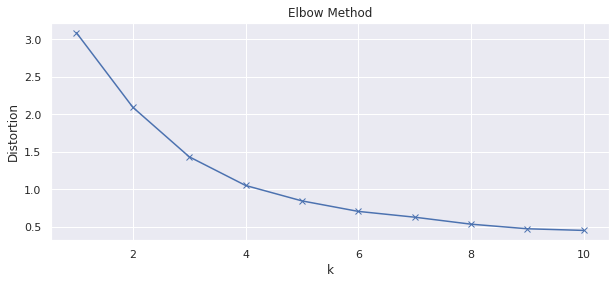

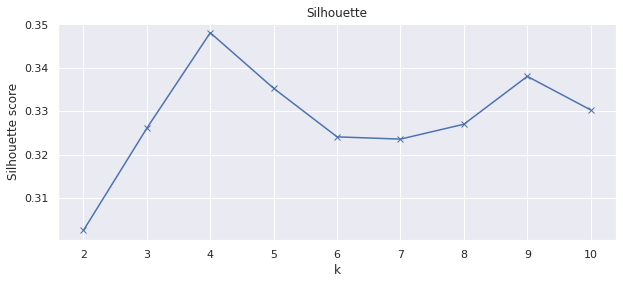

In [220]:
mds = MDS(n_components=2, n_init=4, max_iter=100, random_state=SEED)
data_mds = mds.fit_transform(series_test) 

get_kmeans_results(data=data_mds, max_clusters=10, metric='dtw', seed=SEED)

CPU times: user 2.69 s, sys: 1.62 s, total: 4.32 s
Wall time: 2.82 s


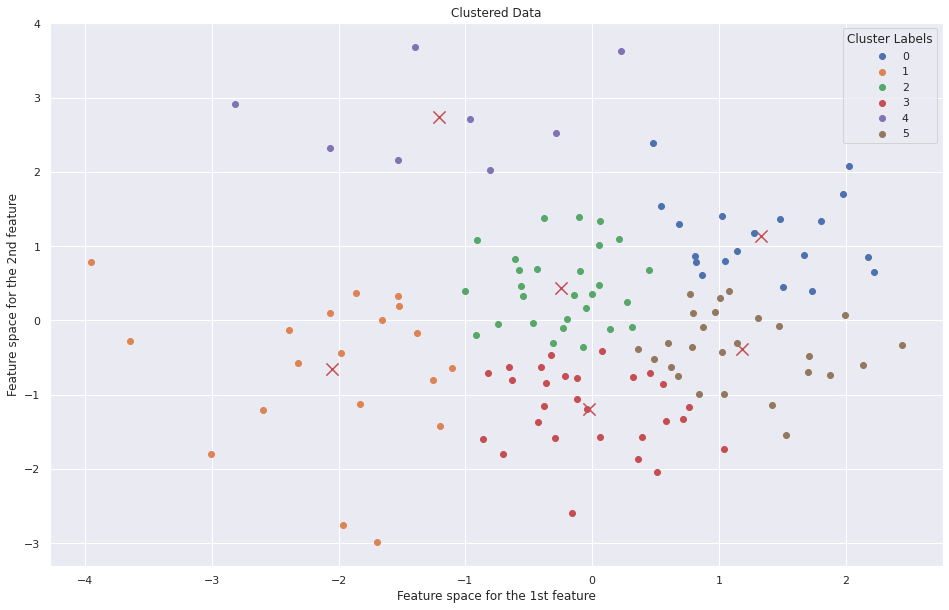

In [221]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=6, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=np.array(data_mds),
              cluster_model=model,
              dim_red_algo=TSNE(n_components=3, init='pca', random_state=SEED))

In [222]:
#cluster_count = math.ceil(math.sqrt(len(date_service_series))) 
cluster_count = 4
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw",random_state=SEED )

labels = km.fit_predict(data_mds)
#labels = km.fit_predict(series_test)

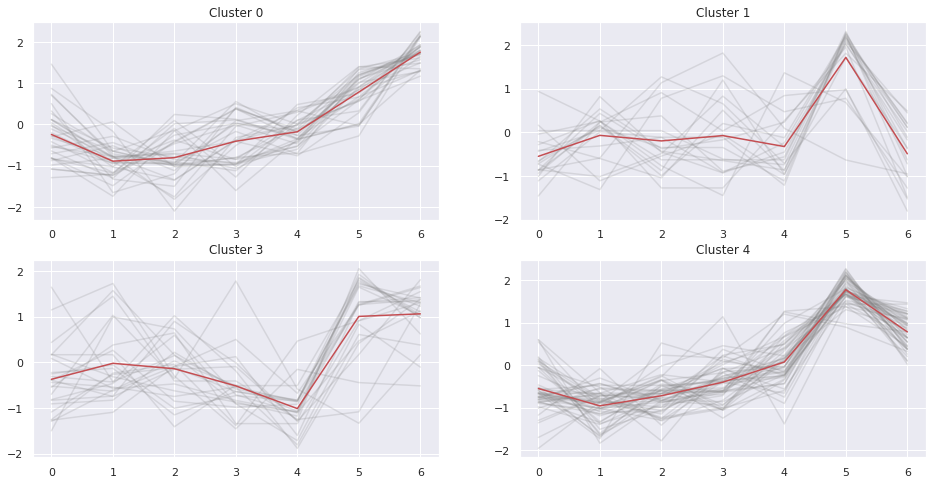

In [223]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(2,2,figsize=(16,8))
#fig.suptitle('Clusters')
row_i=0
column_j=0


y = range(-3,4)
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i,column_j].plot(series[i],c="gray",alpha=0.2)
                cluster.append(series[i])
                
    if len(cluster) > 0:
        axs[row_i,column_j].plot(np.average(np.vstack(cluster),axis=0),c="r",alpha = 1,lw =1.5)
    
    
    axs[row_i, column_j].set_title("Cluster " + str(row_i*3+column_j)) 
    column_j+=1
    if column_j%2 == 0:
        row_i+=1
        column_j=0
        
plt.show()
#start_week = 12
#graph.axhline(start_week,color='r', ls="--", lw=2,)
    
plt.show()

In [224]:
noise_test_true['Category_by'] = noise_test_true['Time'] 

In [225]:
# 以24小时和lsoa进行分类汇总

# Summarize the complaints with lsoa, only 161 records, meaning that one lsoa has no records.

noise_test_true_summary_lsoa_time = noise_test_true.groupby(['LSOA_2011_Name','Category_by']).count()[['Noise_Complaint_Index']].reset_index()
noise_test_true_summary_lsoa_time  = noise_test_true_summary_lsoa_time.set_index(noise_test_true_summary_lsoa_time['Category_by'])
noise_test_true_summary_lsoa_time

LSOA_2011_Name  Category_by  Noise_Complaint_Index
Category_by                                                      
0            Westminster 001A            0                     32
1            Westminster 001A            1                     20
2            Westminster 001A            2                      8
3            Westminster 001A            3                      7
4            Westminster 001A            4                      6
...                       ...          ...                    ...
19           Westminster 024F           19                     19
20           Westminster 024F           20                     17
21           Westminster 024F           21                     22
22           Westminster 024F           22                     34
23           Westminster 024F           23                     28

[3053 rows x 3 columns]

In [226]:
series = []
LSOA_name = noise_test_true_summary_lsoa_time.LSOA_2011_Name.unique()
for i in LSOA_name:
    df = noise_test_true_summary_lsoa_time.loc[noise_test_true_summary_lsoa_time.LSOA_2011_Name == i]

    series.append(df)

In [227]:
series_lengths = {len(serie) for serie in series}
print(series_lengths)


{24, 17, 22, 23}


In [228]:
# Here find the longest series, the residential noise, with zero

max_len = max(series_lengths)
longest_series = None
for serie in series:
    if len(serie) == max_len:
        longest_serie = serie

In [229]:
problems_index = []

for i in range(len(series)):
    if len(series[i])!= max_len:
        problems_index.append(i)
        series[i] = series[i].reindex(longest_serie.index)


* rooling_mean
* interpolate
* fillna - bfill

In [230]:
for i in range(len(series)):
    # Use interpolation to fill values between dates
    series[i]['Noise_Complaint_Index'].interpolate(method ='linear', limit_direction ='forward', inplace=True)
    # Some stores probably were closed on 01-01-YYYYY, fill it by the value on the next day
    series[i]['Noise_Complaint_Index'].fillna(method ='bfill', inplace=True)
    series[i]['smoth_6'] = series[i]['Noise_Complaint_Index']
    series[i]['LSOA_2011_Name'] = series[i]['LSOA_2011_Name'].fillna(LSOA_name[i])
    series[i] = series[i].drop(['Category_by'], axis = 1)
    series[i] = series[i].dropna()

In [231]:
series_test = series
for i in range(len(series_test)):
    series_test[i] = series_test[i].drop(['LSOA_2011_Name','Noise_Complaint_Index'], axis = 1)
    series_test[i]['smoth_6'] = series_test[i]['smoth_6']

In [232]:
# min-max transform
for i in range(len(series_test)):
    #scaler = MinMaxScaler()
    #scaler = StandardScaler()
    series_test[i] = StandardScaler().fit_transform(series_test[i])
    series_test[i] = series_test[i].reshape(len(series_test[i]))

In [233]:
# Run KMeans and plot the results 
def get_kmeans_results(data, max_clusters=10, metric='euclidean', seed=23):
    """
    Runs KMeans n times (according to max_cluster range)

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    
    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=-1, max_iter=10, random_state=seed)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, kmeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');
    print(silhouette)

  0%|          | 0/10 [00:00<?, ?it/s]

[0.2872426388742449, 0.05013469120111304, 0.06083072552658093, 0.022375250455083755, -0.0017293423852196167, 0.0019513323074147777, 0.002990583061961573, -0.0007375111937986769, -0.0035435831604162154]
CPU times: user 25.6 s, sys: 26 s, total: 51.5 s
Wall time: 27 s


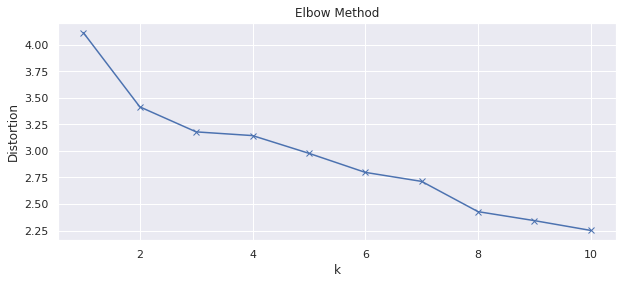

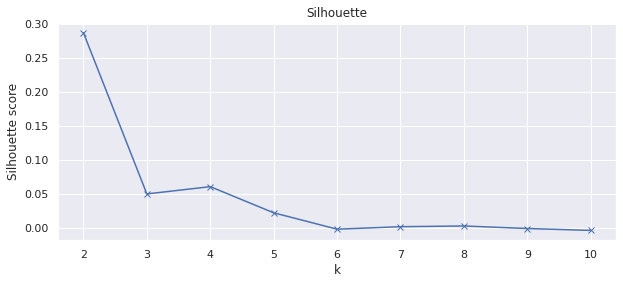

In [234]:
%%time

# Run the algorithm using DTW algorithm 
get_kmeans_results(data=series_test, max_clusters=10, metric='dtw', seed=SEED)

In [235]:
# Visualization for obtained clusters   
def plot_clusters(data, cluster_model, dim_red_algo):
    """
    Plots clusters obtained by clustering model 

    data: pd.DataFrame or np.array
        Time Series Data
    cluster_model: Class
        Clustering algorithm 
    dim_red_algo: Class
        Dimensionality reduction algorithm (e.g. TSNE/PCA/MDS...) 
    Returns:
    -------
    None
    """
    cluster_labels = cluster_model.fit_predict(data)
    centroids = cluster_model.cluster_centers_
    u_labels = np.unique(cluster_labels)
    
    # Centroids Visualization
    plt.figure(figsize=(16, 10))
    plt.scatter(centroids[:, 0] , centroids[:, 1] , s=150, color='r', marker="x")
    
    # Downsize the data into 2D
    if data.shape[1] > 2:
        data_2d = dim_red_algo.fit_transform(data)
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)
    else:
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)

    plt.title('Clustered Data')
    plt.xlabel("Feature space for the 1st feature")
    plt.ylabel("Feature space for the 2nd feature")
    plt.grid(True)
    plt.legend(title='Cluster Labels');

CPU times: user 12.2 s, sys: 797 ms, total: 13 s
Wall time: 2.61 s


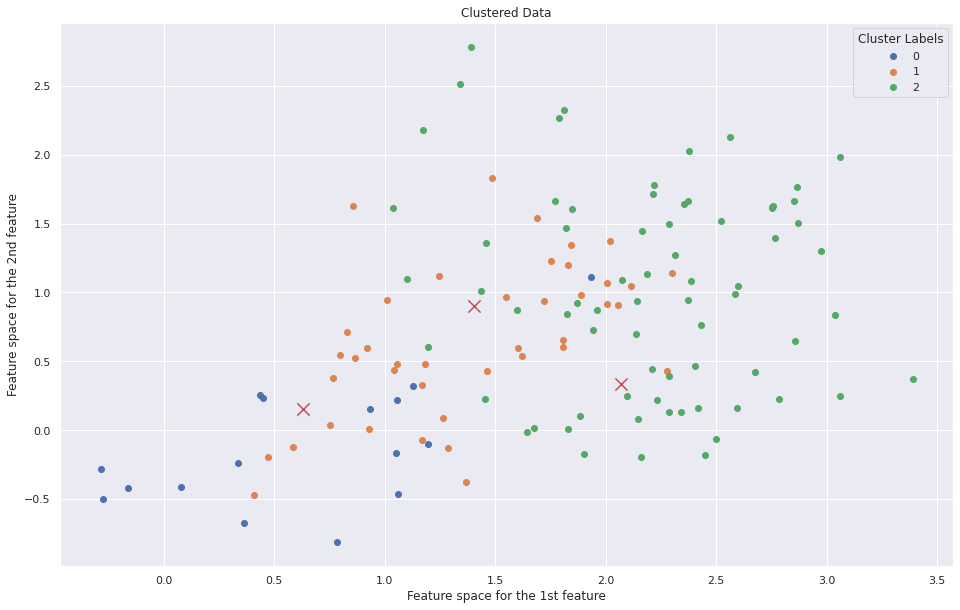

In [236]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=np.array(series_test),
              cluster_model=model,
              dim_red_algo=TSNE(n_components=3, init='pca', random_state=SEED))

  0%|          | 0/10 [00:00<?, ?it/s]

[0.34766742655387245, 0.3653796801950082, 0.3335968113522076, 0.32155297963514123, 0.31418314427670035, 0.31559952547950865, 0.320969997062353, 0.3267467021123027, 0.32859695630610175]


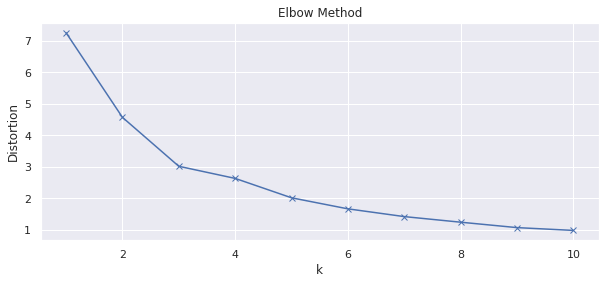

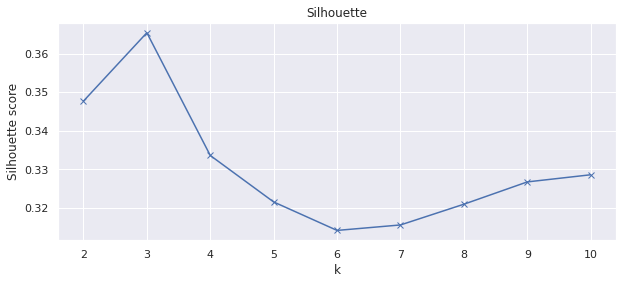

In [237]:
mds = MDS(n_components=2, n_init=4, max_iter=100, random_state=SEED)
data_mds = mds.fit_transform(series_test) 

get_kmeans_results(data=data_mds, max_clusters=10, metric='dtw', seed=SEED)

CPU times: user 1.36 s, sys: 752 ms, total: 2.11 s
Wall time: 1.39 s


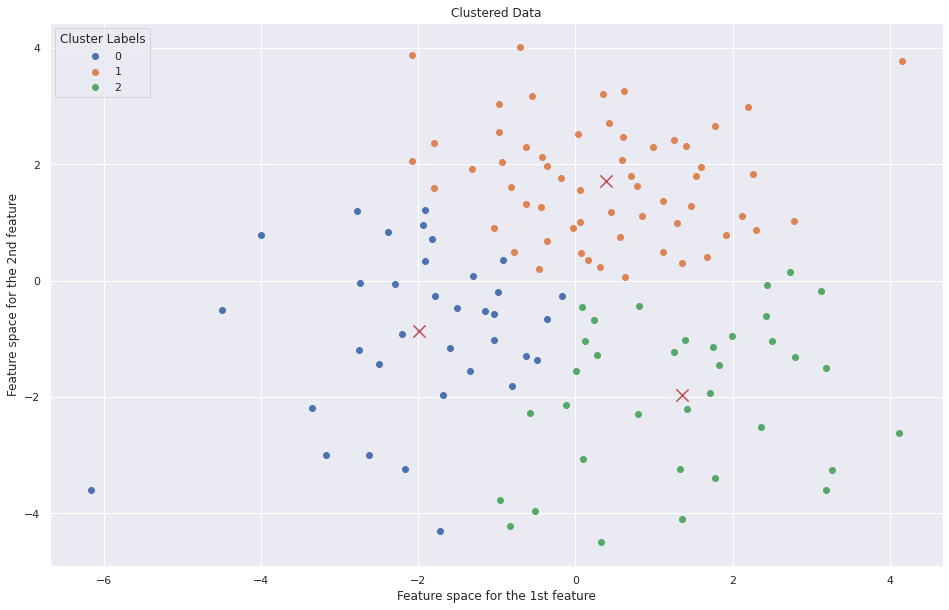

In [238]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=np.array(data_mds),
              cluster_model=model,
              dim_red_algo=TSNE(n_components=3, init='pca', random_state=SEED))

In [239]:
#cluster_count = math.ceil(math.sqrt(len(date_service_series))) 
cluster_count = 3
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw",random_state=SEED )

labels = km.fit_predict(data_mds)

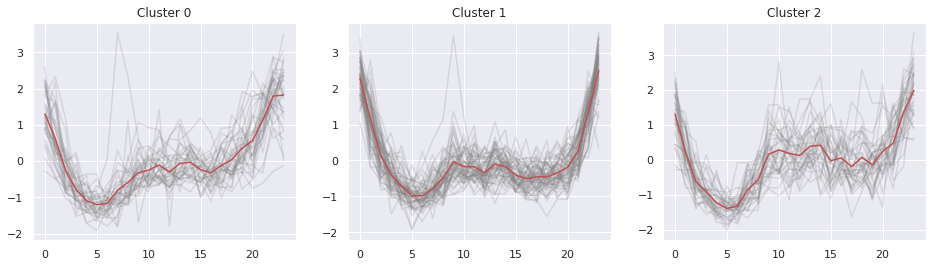

In [240]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(1,3,figsize=(16,4))
#fig.suptitle('Clusters')
row_i=0
column_j=0


y = range(-3,4)
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i].plot(series[i],c="gray",alpha=0.2)
                cluster.append(series[i])
                
    if len(cluster) > 0:
        axs[row_i].plot(np.average(np.vstack(cluster),axis=0),c="r",alpha = 1,lw =1.5)

    axs[row_i].set_title("Cluster " + str(row_i)) 
    row_i+=1

#start_week = 12
#graph.axhline(start_week,color='r', ls="--", lw=2,)
    
plt.show()


In [241]:
noise_test_true['Category_by'] = noise_test_true['Month'] 

In [242]:
# 以24小时和lsoa进行分类汇总

# Summarize the complaints with lsoa, only 161 records, meaning that one lsoa has no records.

noise_test_true_summary_lsoa_time = noise_test_true.groupby(['LSOA_2011_Name','Category_by']).count()[['Noise_Complaint_Index']].reset_index()
noise_test_true_summary_lsoa_time  = noise_test_true_summary_lsoa_time.set_index(noise_test_true_summary_lsoa_time['Category_by'])
noise_test_true_summary_lsoa_time

LSOA_2011_Name  Category_by  Noise_Complaint_Index
Category_by                                                      
1            Westminster 001A            1                     33
2            Westminster 001A            2                     37
3            Westminster 001A            3                     30
4            Westminster 001A            4                     32
5            Westminster 001A            5                     34
...                       ...          ...                    ...
8            Westminster 024F            8                     44
9            Westminster 024F            9                     21
10           Westminster 024F           10                     20
11           Westminster 024F           11                     31
12           Westminster 024F           12                     19

[1536 rows x 3 columns]

In [243]:
series = []
LSOA_name = noise_test_true_summary_lsoa_time.LSOA_2011_Name.unique()
for i in LSOA_name:
    df = noise_test_true_summary_lsoa_time.loc[noise_test_true_summary_lsoa_time.LSOA_2011_Name == i]

    series.append(df)

In [244]:
series_lengths = {len(serie) for serie in series}
print(series_lengths)


{12}


In [245]:
# Here find the longest series, the residential noise, with zero

max_len = max(series_lengths)
longest_series = None
for serie in series:
    if len(serie) == max_len:
        longest_serie = serie

In [246]:
problems_index = []

for i in range(len(series)):
    if len(series[i])!= max_len:
        problems_index.append(i)
        series[i] = series[i].reindex(longest_serie.index)


* rooling_mean
* interpolate
* fillna - bfill

In [247]:
for i in range(len(series)):
    # Use interpolation to fill values between dates
    series[i]['Noise_Complaint_Index'].interpolate(method ='linear', limit_direction ='forward', inplace=True)
    # Some stores probably were closed on 01-01-YYYYY, fill it by the value on the next day
    series[i]['Noise_Complaint_Index'].fillna(method ='bfill', inplace=True)
    series[i]['smoth_6'] = series[i]['Noise_Complaint_Index']
    #series[i]['smoth_6'] = series[i]['Noise_Complaint_Index'].rolling(6).mean()
    series[i]['LSOA_2011_Name'] = series[i]['LSOA_2011_Name'].fillna(LSOA_name[i])
    series[i] = series[i].drop(['Category_by'], axis = 1)
    series[i] = series[i].dropna()

In [248]:
series_test = series
for i in range(len(series_test)):
    series_test[i] = series_test[i].drop(['LSOA_2011_Name','Noise_Complaint_Index'], axis = 1)
    series_test[i]['smoth_6'] = series_test[i]['smoth_6']

In [249]:
# min-max transform
for i in range(len(series_test)):
    #scaler = MinMaxScaler()
    #scaler = StandardScaler()
    series_test[i] = StandardScaler().fit_transform(series_test[i])
    series_test[i] = series_test[i].reshape(len(series_test[i]))

In [250]:
# Run KMeans and plot the results 
def get_kmeans_results(data, max_clusters=10, metric='euclidean', seed=23):
    """
    Runs KMeans n times (according to max_cluster range)

    data: pd.DataFrame or np.array
        Time Series Data
    max_clusters: int
        Number of different clusters for KMeans algorithm
    metric: str
        Distance metric between the observations
    seed: int
        random seed
    Returns: 
    -------
    None      
    """
    # Main metrics
    distortions = []
    silhouette = []
    clusters_range = range(1, max_clusters+1)
    
    for K in tqdm(clusters_range):
        kmeans_model = TimeSeriesKMeans(n_clusters=K, metric=metric, n_jobs=-1, max_iter=10, random_state=seed)
        kmeans_model.fit(data)
        distortions.append(kmeans_model.inertia_)
        if K > 1:
            silhouette.append(silhouette_score(data, kmeans_model.labels_))
        
    # Visualization
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    
    plt.figure(figsize=(10,4))
    plt.plot(clusters_range[1:], silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette');
    print(silhouette)

  0%|          | 0/10 [00:00<?, ?it/s]

[0.025044710000007783, 0.02481517037197979, 0.004781744951729994, -0.005117785147299587, -0.01082254113457888, -0.01868947266396001, -0.03473322443806549, -0.03270908999318644, -0.036748533608535444]
CPU times: user 26.8 s, sys: 29.4 s, total: 56.2 s
Wall time: 29.4 s


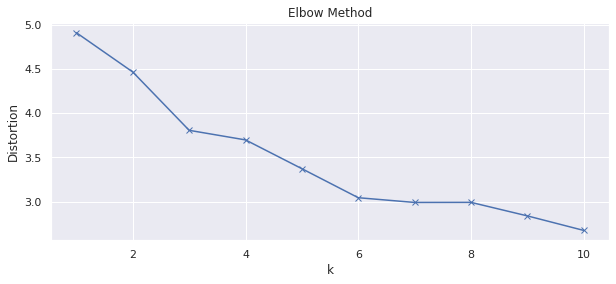

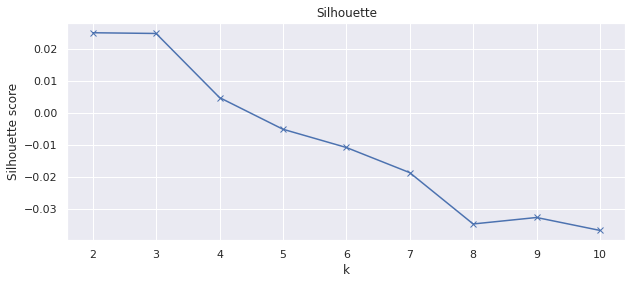

In [251]:
%%time

# Run the algorithm using DTW algorithm 
get_kmeans_results(data=series_test, max_clusters=10, metric='dtw', seed=SEED)

In [252]:
# Visualization for obtained clusters   
def plot_clusters(data, cluster_model, dim_red_algo):
    """
    Plots clusters obtained by clustering model 

    data: pd.DataFrame or np.array
        Time Series Data
    cluster_model: Class
        Clustering algorithm 
    dim_red_algo: Class
        Dimensionality reduction algorithm (e.g. TSNE/PCA/MDS...) 
    Returns:
    -------
    None
    """
    cluster_labels = cluster_model.fit_predict(data)
    centroids = cluster_model.cluster_centers_
    u_labels = np.unique(cluster_labels)
    
    # Centroids Visualization
    plt.figure(figsize=(16, 10))
    plt.scatter(centroids[:, 0] , centroids[:, 1] , s=150, color='r', marker="x")
    
    # Downsize the data into 2D
    if data.shape[1] > 2:
        data_2d = dim_red_algo.fit_transform(data)
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)
    else:
        for u_label in u_labels:
            cluster_points = data[(cluster_labels == u_label)]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=u_label)

    plt.title('Clustered Data')
    plt.xlabel("Feature space for the 1st feature")
    plt.ylabel("Feature space for the 2nd feature")
    plt.grid(True)
    plt.legend(title='Cluster Labels');

CPU times: user 9.16 s, sys: 1.5 s, total: 10.7 s
Wall time: 2.36 s


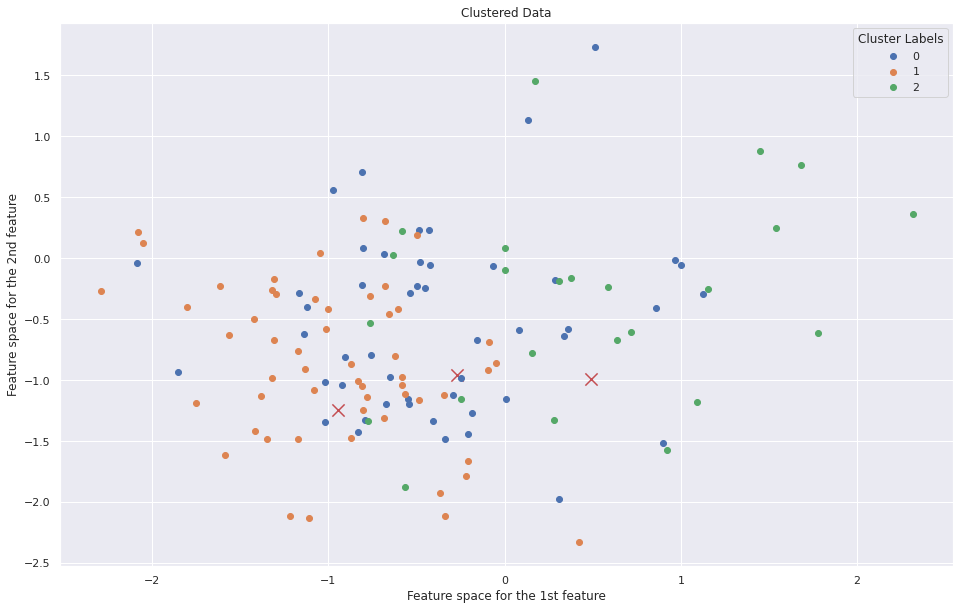

In [253]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=np.array(series_test),
              cluster_model=model,
              dim_red_algo=TSNE(n_components=3, init='pca', random_state=SEED))

  0%|          | 0/10 [00:00<?, ?it/s]

[0.3338205367192937, 0.342627433549346, 0.34000115414333365, 0.3198576081044656, 0.34765129919961796, 0.328852744301244, 0.33473864554578214, 0.3248068292434243, 0.3364550671576225]


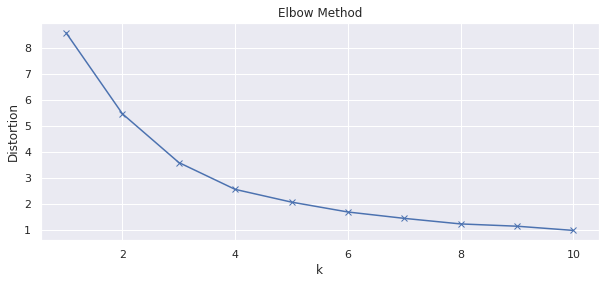

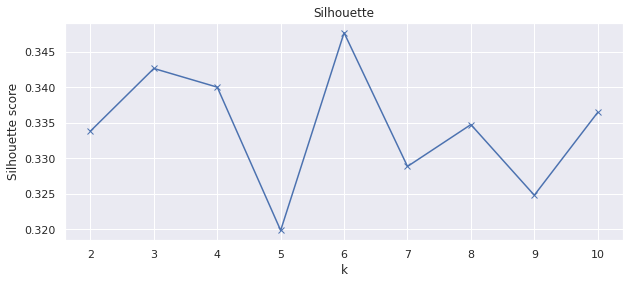

In [254]:
mds = MDS(n_components=2, n_init=4, max_iter=100, random_state=SEED)
data_mds = mds.fit_transform(series_test) 

get_kmeans_results(data=data_mds, max_clusters=10, metric='dtw', seed=SEED)

CPU times: user 1.39 s, sys: 905 ms, total: 2.3 s
Wall time: 1.54 s


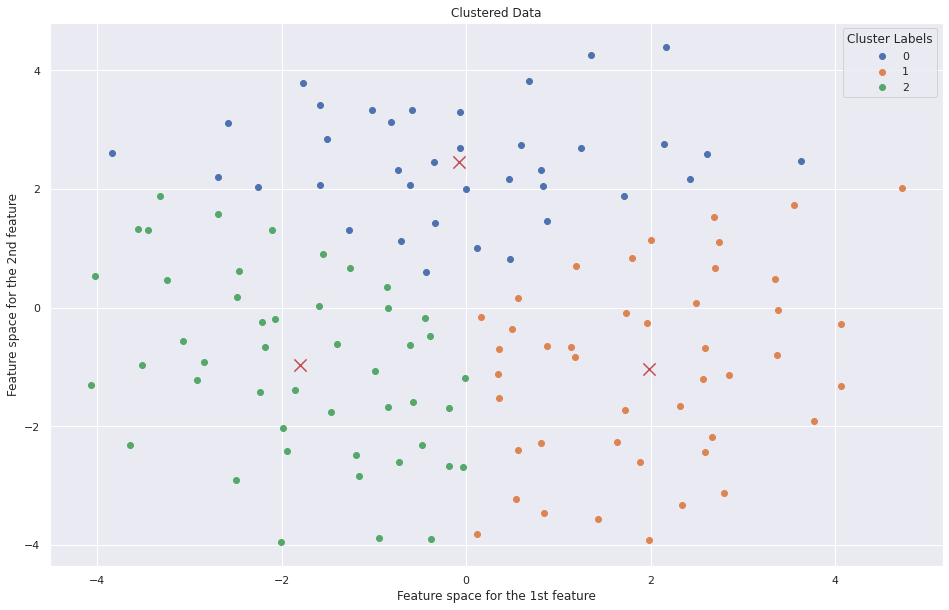

In [255]:
%%time

# let's look at the cluster shape
model = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_jobs=-1, max_iter=10, random_state=SEED)

plot_clusters(data=np.array(data_mds),
              cluster_model=model,
              dim_red_algo=TSNE(n_components=3, init='pca', random_state=SEED))

In [256]:
#cluster_count = math.ceil(math.sqrt(len(date_service_series))) 
cluster_count = 3
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw",random_state=SEED )

labels = km.fit_predict(data_mds)

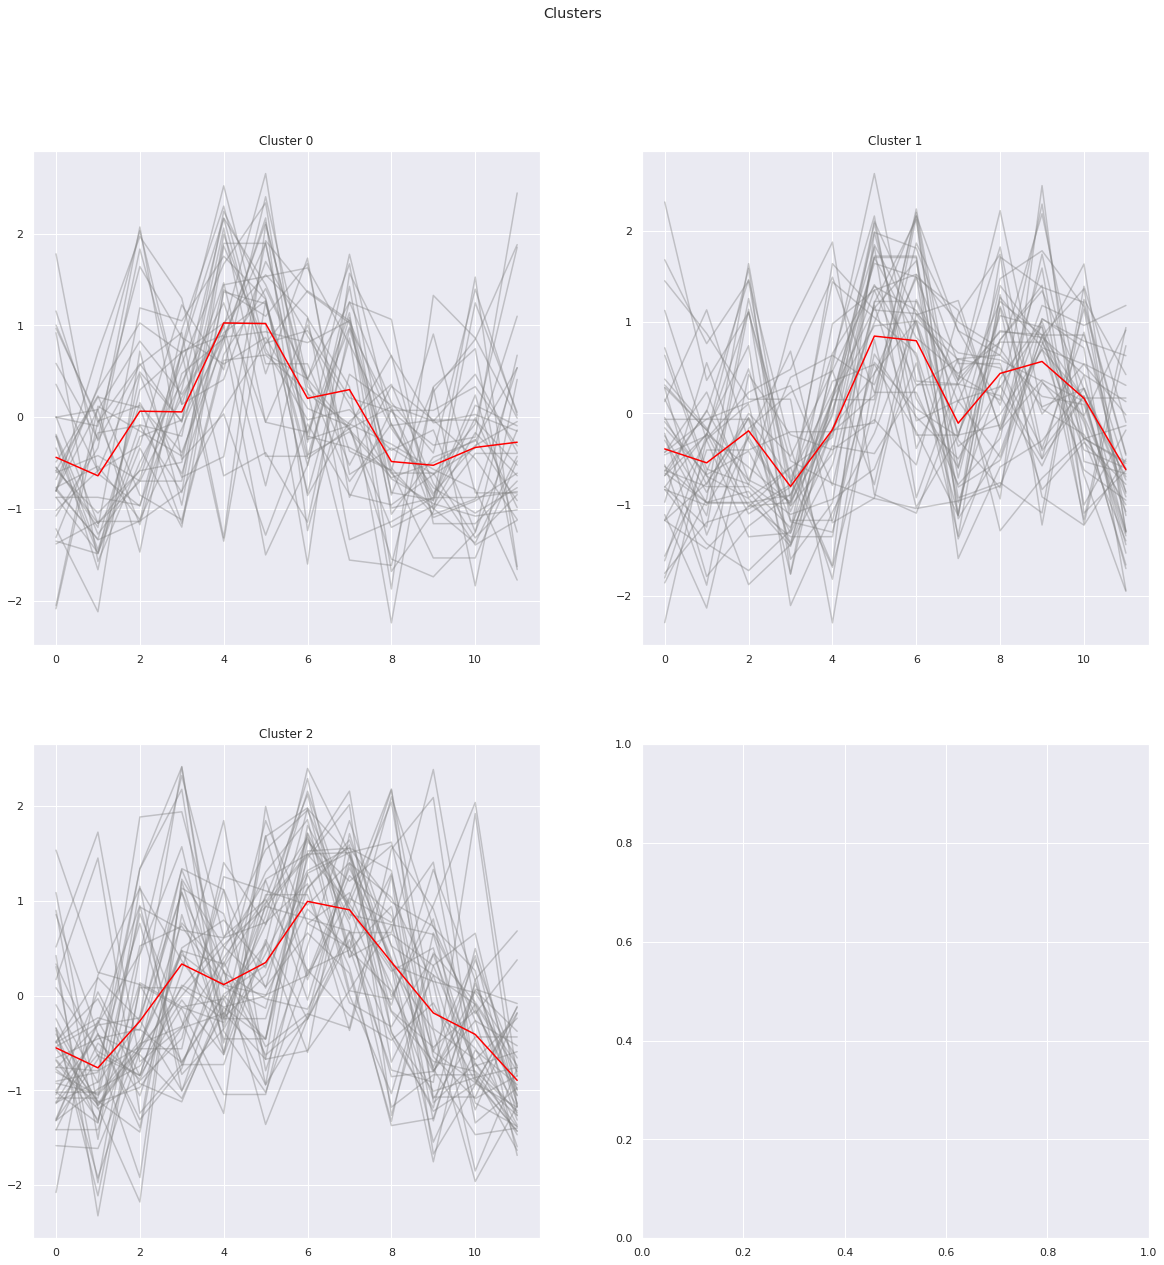

In [257]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(2,2,figsize=(20,20))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(series_test[i],c="gray",alpha=0.4)
                cluster.append(series_test[i])
                
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
        
    axs[row_i, column_j].set_title("Cluster " + str(row_i*2+column_j)) 
    column_j+=1
    if column_j%2 == 0:
        row_i+=1
        column_j=0
        
plt.show()

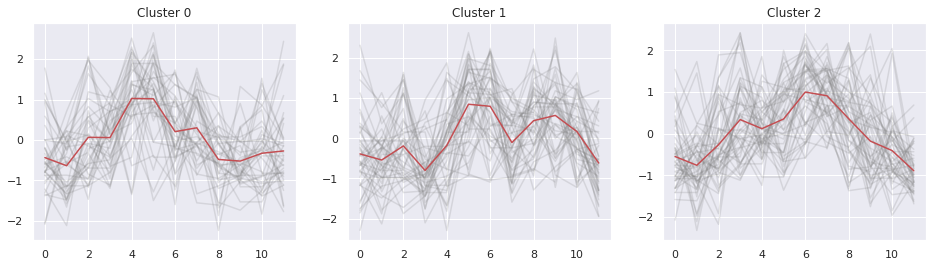

In [258]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(1,3,figsize=(16,4))
#fig.suptitle('Clusters')
row_i=0
column_j=0


y = range(-3,4)
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i].plot(series[i],c="gray",alpha=0.2)
                cluster.append(series[i])
                
    if len(cluster) > 0:
        axs[row_i].plot(np.average(np.vstack(cluster),axis=0),c="r",alpha = 1,lw =1.5)

    axs[row_i].set_title("Cluster " + str(row_i)) 
    row_i+=1

#start_week = 12
#graph.axhline(start_week,color='r', ls="--", lw=2,)
    
plt.show()
